<h1 style="text-align: center; margin-bottom: 4px;">
    <strong>A DATA-DRIVEN ANALYSIS FOR IMPROVING NYC GREEN TAXI SERVICES</strong>
</h1>
<h3 style="text-align: center; margin-bottom: 3px;">
    <strong>Zulfi Nadhia Cahyani</strong>
</h3>
<p style="text-align: center; font-size: 16px; margin-top: 0;">
    JCDSOL-018<br>Purwadhika Data Science Program
</p>

---
<a id="numerical"></a>

## **Chapter I &nbsp;&nbsp;|&nbsp;&nbsp; INTRODUCTION**

---


<a id="basic"></a>
### **I.1 Background**

Transportation plays a crucial role in the daily lives of New York City (NYC) residents and visitors. With a population exceeding **8 million people** and a vast urban landscape, an efficient and accessible transportation system is essential. The **New York City Taxi and Limousine Commission (TLC)** was established in **1971** to regulate and oversee the city's for-hire transportation services, including **medallion (yellow) taxis, street hail livery (green) taxis, for-hire vehicles (FHVs), commuter vans, and paratransit vehicles**.

Among the regulated services, NYC taxis are divided into two main types:  
- **Yellow Taxis**  
    Primarily operate in **Manhattan** and are the only taxis allowed to pick up street hails citywide.  
    
- **Green Taxis (Boro Taxis or Livery Passenger Enhancement Program - LPEP)**  
    Introduced in **2013** to improve transportation access in the **outer boroughs (Brooklyn, Queens, the Bronx, Staten Island) and upper Manhattan**. Green Taxis are restricted from picking up street hails below **110th Street (East Side) and 96th Street (West Side)** unless pre-arranged.

To ensure **transparency and operational efficiency**, the NYC TLC collects trip data from **taxi meters, dispatch systems, and app-based ride services**. This analysis specifically focuses on **Green Taxi trip records**, offering valuable insights into **trip demand patterns**, **fare-related factors**, and **passenger behavior**. By examining this data, we aim to **identify peak travel periods and high-demand locations**, assess how **trip characteristics influence fares**, and understand **how passengers typically travel and pay**. These insights can support efforts to improve vehicle availability, optimize pricing strategies, and enhance the overall efficiency of NYC’s for-hire transportation system.


<small>***Sources:***  
    [About TLC](https://www.nyc.gov/site/tlc/about/about-tlc.page)  
    [TLC Trip Record Data](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page)  
    [TLC Trip Record User Guide](https://www.nyc.gov/assets/tlc/downloads/pdf/trip_record_user_guide.pdf)</small>

<a id="basic"></a>
### **I.2 Business Problems**

**Green Taxis** were introduced to improve transportation access in NYC’s outer boroughs and upper Manhattan. However, there are still challenges in optimizing their operations. This project aims to address the following **key questions**:

1. **When is the highest demand for Green Taxis?**  
   Understanding when people use Green Taxis the most can help improve vehicle availability, reduce wait times, and enhance overall service efficiency.

2. **Where is trip demand concentrated geographically?**  
   Identifying high-demand pickup areas helps ensure that drivers are positioned in the right places to meet passenger needs, reduce idle time, and maximize ride opportunities.

3. **What factors influence taxi fares?**  
   Exploring how trip features like distance and duration relate to fare amounts can offer insights into pricing fairness and help optimize earning potential for drivers.

4. **How do passengers typically travel and pay?**  
   Knowing how many passengers usually share a ride and which payment methods are preferred can guide service improvements and operational planning.


<a id="basic"></a>
### **I.3 Objectives**

To address the key business problems, this analysis focuses on the following objectives:

1. **Determine peak demand periods** by analyzing trip volumes across different hours and days.
2. **Identify high-demand locations** by examining pickup distribution across boroughs and zones.
3. **Analyze fare-influencing factors** by exploring the relationship between trip characteristics (distance and duration) and fare amounts.
4. **Understand passenger behavior** by analyzing patterns in passenger count and preferred payment methods.

By achieving these objectives, this project aims to generate actionable insights to enhance the operational efficiency of Green Taxi services in NYC.


<a id="basic"></a>
### **I.4 Scope and Limitations**

This analysis is based on **January 2023 trip data** provided by the NYC Taxi and Limousine Commission (TLC). The study does not account for:  
- **Seasonal variations** or **long-term trends** beyond the one-month dataset timeframe.  
- **External factors** such as weather conditions, traffic congestion, or special events.  
- **Direct comparisons** with app-based ride services like Uber or Lyft.  

<br>


---
<a id="numerical"></a>

## **Chapter II &nbsp;&nbsp;|&nbsp;&nbsp; DATA PREPARATION**

---

<a id="basic"></a>
### **II.1 Data Understanding**

The dataset contains New York City TLC trip records **from January 2023**, specifically focusing on **Green Taxis (Boro Taxis or the Livery Passenger Enhancement Program - LPEP)**. It includes **20 columns** that provide detailed trip-related information, as outlined below.

| **Feature**               | **Description** |
|---------------------------|----------------|
| **VendorID**             | A code indicating the LPEP provider that provided the record.<br>1 = Creative Mobile Technologies, LLC.<br>2 = VeriFone Inc. |
| **lpep_pickup_datetime**  | The date and time when the meter was engaged (the pickup time). |
| **lpep_dropoff_datetime** | The date and time when the meter was disengaged (the drop-off time). |
| **store_and_fwd_flag**  | Indicates whether the trip record was held in the vehicle memory before sending to the vendor.<br>Y = store and forward trip<br>N = not a store and forward trip |
| **RateCodeID**          | The final rate code in effect at the end of the trip.<br>1 = Standard rate<br>2 = JFK<br>3 = Newark<br>4 = Nassau or Westchester<br>5 = Negotiated fare<br>6 = Group ride |
| **PULocationID**        | Pickup location ID, TLC Taxi Zone in which the taximeter was engaged. |
| **DOLocationID**        | Drop-off location ID, TLC Taxi Zone in which the taximeter was disengaged. |
| **passenger_count**       | The number of passengers in the vehicle (driver-entered value). |
| **trip_distance**        | The elapsed trip distance in miles reported by the taximeter. |
| **fare_amount**         | The time-and-distance fare calculated by the meter (base fare): $3.00 for initial charge. |
| **extra**	                | Extra charges, such as night surcharge or rush-hour surcharge ($1.00 overnight surcharge 8pm to 6am; $2.50 rush hour surcharge from 4pm to 8pm on weekdays, excluding holidays).                                    |
| **mta_tax**            | $0.50 Metropolitan Transportation Authority (MTA) tax that is automatically triggered based on the metered rate in use. |
| **tip_amount**         | This field is automatically populated for credit card tips. Cash tips are not included. |
| **tolls_amount**       | The total amount of all tolls paid in the trip. |
| **ehail_fee**	            | Fee for e-hailing services.                              |
| **improvement_surcharge** | $1.00 surcharge assessed on hailed trips at the flag drop. |
| **total_amount**       | The total amount charged to passengers (excluding cash tips). |
| **payment_type**        | A numeric code signifying how the passenger paid for the trip.<br>1 = Credit card<br>2 = Cash<br>3 = No charge<br>4 = Dispute<br>5 = Unknown<br>6 = Voided trip |
| **trip_type**          | A code indicating whether the trip was a street hail or a dispatch.<br>1 = Street-hail<br>2 = Dispatch |
| **congestion_surcharge**	| Extra fee for trips in congested areas during peak hours. $2.50 (Yellow Taxi), $2.75 (Green Taxi), or 75 cents (any shared ride) for all trips that begin, end or pass through Manhattan south of 96th Street.                                     |

<small>***Sources:***  
    [TLC Trip Record User Guide](https://www.nyc.gov/assets/tlc/downloads/pdf/trip_record_user_guide.pdf)</small>  
    [Taxi Fare](https://www.nyc.gov/site/tlc/passengers/taxi-fare.page)</small>

To support spatial analysis, **an additional dataset**, the **Taxi Zone Lookup**, is included. This dataset maps taxi zone IDs to their corresponding locations, helping to interpret pickup and drop-off areas. In the initial trip records dataset, location data, **'PULocationID' (pickup location) and 'DOLocationID' (drop-off location)**, are represented as numerical IDs without corresponding names. The **Taxi Zone Lookup dataset provides location details and descriptions**, making the analysis more interpretable. It consists of **four columns**, with detailed descriptions provided below.

| **Feature**     | **Description** |
|---------------|----------------|
| **LocationID**  | A distinct numerical code representing each taxi zone. |
| **Borough**     | The borough in which the taxi zone is situated, such as Manhattan, Queens, Brooklyn, Bronx or Staten Island. |
| **Zone**        | The particular neighborhood or area within the borough. |
| **service_zone** | The classification of the service zone (e.g., 'Boro Zone' for Green Taxis, 'Yellow Zone' for Yellow Taxis, 'EWR' for Newark Airport). |


#### **a. Import Library**

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest
from scipy.stats import mannwhitneyu

import warnings
warnings.filterwarnings("ignore")

#### **b. Load Dataset**

In [154]:
# Load the main dataset: NYC TLC Green Taxi (LPEP) Trip Records
df_trip = pd.read_csv('NYC TLC Trip Record.csv')
df_trip

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN


In [155]:
# Load the additional dataset: Taxi Zone Lookup
df_zone = pd.read_csv('taxi_zone_lookup.csv')
df_zone

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NaN,NaN


#### **c. Merge Dataset**

In [156]:
# Rename LocationID in df_zone to match df_trip
df_zone_pickup = df_zone.copy()  # Make a copy of df_zone
df_zone_pickup.rename(columns={'LocationID': 'PULocationID'}, inplace=True)  # Rename LocationID to PULocationID

df_zone_dropoff = df_zone.copy()  # Make another copy of df_zone
df_zone_dropoff.rename(columns={'LocationID': 'DOLocationID'}, inplace=True)  # Rename LocationID to DOLocationID

# Merge df_zone and df_trip
df = df_trip.merge(df_zone_pickup, on='PULocationID', how='left')
df = df.merge(df_zone_dropoff, on='DOLocationID', how='left', suffixes=('_pickup', '_dropoff'))

In [157]:
# Preview the merged dataframe
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,total_amount,payment_type,trip_type,congestion_surcharge,Borough_pickup,Zone_pickup,service_zone_pickup,Borough_dropoff,Zone_dropoff,service_zone_dropoff
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,...,24.18,1.0,1.0,2.75,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,...,15.84,1.0,1.0,0.00,Manhattan,Bloomingdale,Yellow Zone,Manhattan,Central Park,Yellow Zone
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,...,11.64,1.0,1.0,0.00,Queens,Steinway,Boro Zone,Queens,Old Astoria,Boro Zone
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,...,10.20,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,Upper West Side North,Yellow Zone
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,...,8.00,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,East Harlem North,Boro Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,...,16.70,NaN,NaN,NaN,Brooklyn,Clinton Hill,Boro Zone,Brooklyn,Crown Heights South,Boro Zone
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,...,5.41,NaN,NaN,NaN,Queens,Baisley Park,Boro Zone,Queens,Saint Albans,Boro Zone
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,...,21.04,NaN,NaN,NaN,Brooklyn,DUMBO/Vinegar Hill,Boro Zone,Brooklyn,Bushwick South,Boro Zone
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,...,19.18,NaN,NaN,NaN,Brooklyn,Stuyvesant Heights,Boro Zone,Brooklyn,Prospect Heights,Boro Zone


#### **d. Dataset Structure and Information**

In [158]:
# Show dataset structure and information
print("Total number of rows:", df.shape[0]) # Print the total number of rows
print("Total number of columns:", df.shape[1]) # Print the total number of columns
print("Dataset information:")
print(df.info()) # Display the dataset complete information

Total number of rows: 68211
Total number of columns: 26
Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 

#### **e. Summary of Descriptive Statistics**

In [159]:
# Descriptive Statistics of Numerical Columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorID,68211.0,1.863028,0.343820,1.00,2.00,2.00,2.00,2.00
RatecodeID,63887.0,1.117160,1.372913,1.00,1.00,1.00,1.00,99.00
PULocationID,68211.0,98.549735,61.244314,1.00,74.00,75.00,129.00,265.00
DOLocationID,68211.0,138.429901,76.761311,1.00,74.00,138.00,219.00,265.00
passenger_count,63887.0,1.315870,0.979054,0.00,1.00,1.00,1.00,9.00
trip_distance,68211.0,8.114852,585.105955,0.00,1.11,1.85,3.21,120098.84
fare_amount,68211.0,16.603545,13.470121,-70.00,9.30,13.50,19.80,490.00
extra,68211.0,0.825431,1.269904,-2.50,0.00,0.00,1.00,12.50
mta_tax,68211.0,0.588340,0.385819,-0.50,0.50,0.50,0.50,2.75
tip_amount,68211.0,2.139012,3.052710,-10.50,0.00,1.60,3.33,222.22


In [160]:
# Descriptive Statistics of Categorical Columns
df.describe(include = object).T

,count,unique,top,freq
lpep_pickup_datetime,68211,66575,2023-01-07 23:58:06,4
lpep_dropoff_datetime,68211,66519,2023-01-06 00:00:00,6
store_and_fwd_flag,63887,2,N,63579
Borough_pickup,68145,7,Manhattan,39436
Zone_pickup,68076,224,East Harlem North,13257
service_zone_pickup,68010,4,Boro Zone,64013
Borough_dropoff,67969,7,Manhattan,39617
Zone_dropoff,67785,247,East Harlem South,3524
service_zone_dropoff,67543,4,Boro Zone,43605


### <u>**Summary of Data Understanding**</u>

Based on the data understanding, the summary of key insights is as follows:

1. **Time range**  
The dataset covers **January 2023**.

2. **Total Data**
    - The number of rows is **68,211 records**.
    - Due to merging, **6 additional columns were added**: `Borough_pickup`, `Zone_pickup`, `service_zone_pickup`, `Borough_dropoff`, `Zone_dropoff`, and `service_zone_dropoff`, resulting in a total of **26 columns**.

3. **Missing Values**
    - The following columns contain missing values (NaN): `store_and_fwd_flag`, `RatecodeID`, `passenger_count`, `payment_type`, `trip_type`, `congestion_surcharge`, `Borough_pickup`, `Zone_pickup`, `service_zone_pickup`, `Borough_dropoff`, `Zone_dropoff`, and `service_zone_dropoff`, which need to be further checked.
    - The `ehail_fee` column contains only null values (NaN) and should likely be dropped.

4. **Data Type Issues**
    - `lpep_pickup_datetime` and `lpep_dropoff_datetime` are in object format and should be converted to **datetime** format.
    - `passenger_count` is in float format but should likely be converted to an **integer**.
    - `VendorID`, `RatecodeID`, `PULocationID`, `DOLocationID`, `store_and_fwd_flag`, `payment_type` and `trip_type` are categorical features and should be converted to a **category or boolean** type instead of being stored as integers, floats, or objects.

5. **Inconsistent Data**
    - Some columns, such as `fare_amount`, `extra`, `mta_tax`, `tip_amount`, `improvement_surcharge`, `total_amount`, and `congestion_surcharge` contain negative values, which should be checked for potential data entry errors.
    - Some values, such as `passenger_count` and `trip_distance`, should not be zero and need to be examined for data entry issues.
    - `RatecodeID` should be between 1 and 6, but the maximum value is 99, indicating a possible data entry error.
    - The `passenger_count` column has a maximum value of 9, while the green taxi has a maximum capacity of 6 passengers, indicating a possible input mistake that should be reviewed.
    
6. **Potential Outliers**
    - There might be potential outliers, such as unusually long trips in `trip_distance`, or extreme values for `fare_amount`, `tip_amount`, and `total_amount`, which require further investigation.   

<br>

---




<a id="basic"></a>
### **II.2 Data Cleaning**

**Data cleaning** is the process of identifying and correcting errors, inconsistencies, and inaccuracies in a dataset to improve its quality and reliability. This step is crucial in data analysis, as poor data quality can lead to misleading insights and incorrect conclusions. Anomalies detected during the data understanding phase must be addressed as part of this process. In this project, data cleaning includes **handling missing values, converting incorrect data types, removing duplicate records, resolving inconsistencies,** and **identifying and managing outliers** to ensure a clean and reliable dataset.

#### **a. Checking & Handling Missing Values**

**Missing values** occur when data points are absent or not recorded in a dataset and have NaN values. They can result from errors in data collection, missing responses, or intentional omissions. Missing values need to be handled carefully to avoid biased or misleading analysis.

####    **a.1 Checking Missing Values**

In [161]:
# Calculate the number of missing values for each column
missing_values = df.isna().sum()

# Create a summary table with the number of missing values and percentage of missing values
missing_data_summary = pd.DataFrame({
    'Missing Values': missing_values.values,  # Number of missing values for each column
    'Missing Values Percentage': (missing_values / len(df)) * 100  # Calculate the percentage of missing values
})

# Format the 'Missing Values Percentage' column to show two decimal places
missing_data_summary['Missing Values Percentage'] = missing_data_summary['Missing Values Percentage'].apply(lambda x: f"{x:.2f}%")

# Format the 'Missing Values' column to show numbers with commas
missing_data_summary['Missing Values'] = missing_data_summary['Missing Values'].apply(lambda x: f"{x:,}")

# Calculate the number of columns with missing values (count the columns where missing values > 0)
columns_with_missing_values = missing_data_summary[missing_data_summary['Missing Values'] != '0'].shape[0]

# Print the missing values summary and the number of columns with missing values
print(missing_data_summary)

# Print the total number of columns with missing values
print(f"\nNumber of columns with missing values: {columns_with_missing_values}")

                      Missing Values Missing Values Percentage
VendorID                           0                     0.00%
lpep_pickup_datetime               0                     0.00%
lpep_dropoff_datetime              0                     0.00%
store_and_fwd_flag             4,324                     6.34%
RatecodeID                     4,324                     6.34%
PULocationID                       0                     0.00%
DOLocationID                       0                     0.00%
passenger_count                4,324                     6.34%
trip_distance                      0                     0.00%
fare_amount                        0                     0.00%
extra                              0                     0.00%
mta_tax                            0                     0.00%
tip_amount                         0                     0.00%
tolls_amount                       0                     0.00%
ehail_fee                     68,211                   

####    <u>**Insights after Checking Missing Values**</u>

Based on the output of the missing values check, there are **13 columns with missing values** in the dataset that require further handling. These columns include:  
- `store_and_fwd_flag` = 4,324 (6.34% missing)  
- `RatecodeID` = 4,324 (6.34% missing)  
- `passenger_count` = 4,324 (6.34% missing)  
- `ehail_fee` = 68,211 (100.00% missing)
- `payment_type` = 4,324 (6.34% missing)  
- `trip_type` = 4,334 (6.35% missing)  
- `congestion_surcharge` = 4,324 (6.34% missing)  
- `Borough_pickup` = 66 (0.10% missing)  
- `Zone_pickup` = 135 (0.20% missing)  
- `service_zone_pickup` = 201 (0.29% missing)  
- `Borough_dropoff` = 242 (0.35% missing)  
- `Zone_dropoff` = 426 (0.62% missing)  
- `service_zone_dropoff` = 668 (0.98% missing)  

Here are the **guidelines for handling missing values**.  

| **Percentage of Missing Values** | **Category of Missing Values** | **Recommended Action**                                                                                     | **Source**                                                                                                                                                             |
|---------------------------------|---------------------------------|------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Under 1%**                         | Very Low                        | Impute with mean/median/mode or drop rows; missingness is usually negligible | **"Statistical Analysis with Missing Data"** by Roderick J. A. Little & Donald B. Rubin (2019) |
| **1% - 5%**                     | Low                             | Impute with mean/median/mode or drop rows                                                                   | **"Practical Guide to Handling Missing Data in Statistics"** and **"Handling Missing Data in Machine Learning: A Review"** (2020) from *Nature Communications* |
| **5% - 15%**                    | Moderate                        | Impute with mean/median/mode or use algorithms that handle missing values                                   | **"Practical Guide to Handling Missing Data in Statistics"**, **"Handling Missing Data in Machine Learning: A Review"** (2020) from *Nature Communications* |
| **15% - 40%**                   | High                            | Impute, use predictive models, or drop columns                                                              | **"Missing Data: A Statistical Analysis and Practical Approach"** by Ruth M. Carroll and Joseph J. K. Hsieh and **"Practical Guide to Handling Missing Data in Statistics"** |
| **Above 40%**                   | Very High                       | Drop columns or use advanced imputation techniques                                                          | **"Handling Missing Data in Machine Learning: A Review"** (2020) from *Nature Communications* |
| **100%**                         | Completely Missing              | Drop column                                                                                                 | **"Practical Guide to Handling Missing Data in Statistics"** and **"Handling Missing Data in Machine Learning: A Review"** (2020) from *Nature Communications* |


Based on the table above, the **insights on handling missing values** with considering the **results of the missing values check** are as follows:

1. **Column with Completely Missing Values (100%)**  
    - **Column:** `ehail_fee` (100.00% missing, 68,211 missing values)  
    - **Recommended action:** Drop the column
    - **Reason:** A column with **100% missing values** provides **no useful information** and only takes up space without contributing to the analysis.  

2. **Columns with Moderate Missing Values (5% - 15%)**  
    - **Column:**  
        ~ `trip_type` (6.35% missing, 4,334 missing values)  
        ~ `store_and_fwd_flag`, `RatecodeID`, `passenger_count`, `payment_type`, `congestion_surcharge` (each 6.34% missing, 4,324 missing values). Since the missing values are similar, it is possible that one group of data is missing.  
    - **Recommended action:** Fill missing values
    - **Reason:** Since these columns contain **moderate missing values** but hold **important information**, it’s best to **fill the missing values** rather than drop rows.  
       
      a. **Categorical Columns** (`trip_type`, `store_and_fwd_flag`, `RatecodeID`, `payment_type`)  
        - **Recommended action:** Use mode imputation (most frequent value)  
        - **Reason:** Categorical data typically follows a common pattern, so using the most frequent value **maintains category consistency** without introducing bias.  

      b. **Numerical Columns** (`passenger_count`, `congestion_surcharge`)  
        - **Recommended action:** Use median imputation  
        - **Reason:** The median is **less sensitive to outliers** and better preserves the distribution compared to the mean.  


3. **Columns with Very Low Missing Values (<1%)**  
    - **Columns:** `Borough_pickup`, `Zone_pickup`, `service_zone_pickup`, `Borough_dropoff`, `Zone_dropoff`, `service_zone_dropoff`
    - **Missing rate:** 0.10% - 0.98% (66 to 668 missing values)
    - **Recommended action:** Drop the rows with missing values
    - **Reason:** These columns are redundant as they are derived from fully populated `PULocationID` and `DOLocationID`. **Dropping rows with missing values** ensures the dataset remains **clean and accurate** without introducing potentially misleading imputed data. Given the **very low percentage of missing values (<1%)**, this action has minimal impact on the analysis while improving efficiency and maintaining data integrity.   

<br>

---



####    **a.2 Handling Missing Values**

Missing values will be handled based on the **insights from the missing values check** above. There are **13 columns**, which are grouped into **three types**: columns with **completely missing values**, columns with **moderate missing values**, and columns with **very low missing values.**

In [162]:
# Drop Column with Completely Missing Values (100%)
df = df.drop(columns=['ehail_fee'])

In [163]:
# Fill Missing Values for Columns with Moderate Missing Values (5% - 15%)

# a. Categorical Columns
# List of categorical columns
categorical_columns = ['trip_type', 'store_and_fwd_flag', 'RatecodeID', 'payment_type']

# Fill missing values using mode
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# b. Numerical Columns
# List of numerical columns
numerical_columns = ['passenger_count', 'congestion_surcharge']

# Fill missing values using median
for col in numerical_columns:
    df[col] = df[col].fillna(df[col].median())

In [164]:
# Drop Missing Values for Columns with Very Low Missing Values (<1%)

# List of columns with very low missing values
low_missing_columns = ['Borough_pickup', 'Zone_pickup', 'service_zone_pickup', 
                       'Borough_dropoff', 'Zone_dropoff', 'service_zone_dropoff']

# Drop rows with missing values
df = df.dropna(subset=low_missing_columns)

In [165]:
# Final check the handled missing values in the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67499 entries, 0 to 68210
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               67499 non-null  int64  
 1   lpep_pickup_datetime   67499 non-null  object 
 2   lpep_dropoff_datetime  67499 non-null  object 
 3   store_and_fwd_flag     67499 non-null  object 
 4   RatecodeID             67499 non-null  float64
 5   PULocationID           67499 non-null  int64  
 6   DOLocationID           67499 non-null  int64  
 7   passenger_count        67499 non-null  float64
 8   trip_distance          67499 non-null  float64
 9   fare_amount            67499 non-null  float64
 10  extra                  67499 non-null  float64
 11  mta_tax                67499 non-null  float64
 12  tip_amount             67499 non-null  float64
 13  tolls_amount           67499 non-null  float64
 14  improvement_surcharge  67499 non-null  float64
 15  total_a

####    <u>**Summary of Handling Missing Values**</u>

1. **Dropped Column with Completely Missing Values (100%)**  
    The column `ehail_fee` **was dropped** as it contained **100% missing values**, providing no useful information for analysis while consuming memory.  

2. **Filled Columns with Moderate Missing Values (5% - 15%)**  
    The missing values in the columns `trip_type`, `store_and_fwd_flag`, `RatecodeID`, `passenger_count`, `payment_type`, and `congestion_surcharge`, which had **moderate missing values** (6.34% - 6.35%), were handled using imputation:  

    - **Categorical columns** (`trip_type`, `store_and_fwd_flag`, `RatecodeID`, `payment_type`) **were filled** using the **mode** (most frequent value) to ensure category consistency without introducing bias.  
    - **Numerical columns** (`passenger_count` and `congestion_surcharge`) **were filled** using the **median**, which is less sensitive to outliers and preserves the data distribution.  

3. **Dropped Missing Values for Columns with Very Low Missing Values (<1%)**  
    - Columns of `Borough_pickup`, `Zone_pickup`, `service_zone_pickup`, `Borough_dropoff`, `Zone_dropoff`, and `service_zone_dropoff`, which had **very low missing values** (0.10% - 0.98%), **were dropped** because these columns are derived from `PULocationID` and `DOLocationID`, which already provide complete location data. Dropping these rows ensures a cleaner dataset without introducing inaccurate or imputed data.  

4. **Dataset Overview after Handling Missing Values**  
    - The total number of columns **was reduced to 25** after handling missing values.
    - The dataset was reduced **from 68,211 to 67,499 records** after dropping rows with missing values in specific columns.
    - **No missing values remain** in the dataset after this process.

<br>

---


#### **b. Converting Incorrect Data Types**

**Converting data type** is the process of changing a column's data type to ensure it correctly represents the values it holds. **Inconsistent or incorrect data types** can lead to errors in analysis, incorrect computations, or inefficient storage.  

In this dataset, several columns require conversion to ensure proper data handling. The `lpep_pickup_datetime` and `lpep_dropoff_datetime` columns, currently in **object format**, should be converted to **datetime** to enable time-based operations. The `passenger_count` column, which is in **float format**, should be converted to an **integer** as it represents whole numbers and counts of passengers **(without decimals)**. Additionally, **categorical features** such as `VendorID`, `RatecodeID`, `PULocationID`, `DOLocationID`, `store_and_fwd_flag`, `payment_type`, and `trip_type` should be converted to a **category type** to optimize memory usage and improve processing efficiency. For **binary categorical data** like `store_and_fwd_flag`, mapping values to boolean ('Y' and 'N' to True and False) can further enhance logical operations. These conversions will ensure data consistency, reduce memory consumption, and improve overall data processing performance.

In [166]:
# Convert 'lpep_pickup_datetime' and 'lpep_dropoff_datetime' to datetime format
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])

In [167]:
# Convert 'passenger_count' to integer format
df['passenger_count'] = df['passenger_count'].astype(int)

In [168]:
# Convert categorical features to category/boolean format

# Remove decimal places by converting to integer first
float_to_int_columns = ['RatecodeID', 'payment_type', 'trip_type']
for col in float_to_int_columns:
    df[col] = df[col].astype(int)

# Convert 'VendorID', 'RatecodeID', 'PULocationID', 'DOLocationID', 'store_and_fwd_flag', 'payment_type', 'trip_type' to category data type
categorical_columns = ['VendorID', 'RatecodeID', 'PULocationID', 'DOLocationID', 'store_and_fwd_flag', 'payment_type', 'trip_type']
for col in categorical_columns:
    df[col] = df[col].astype('category')

# Convert 'store_and_fwd_flag' to boolean
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].map({'Y': True, 'N': False})

In [169]:
# Final Check Updated Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67499 entries, 0 to 68210
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               67499 non-null  category      
 1   lpep_pickup_datetime   67499 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  67499 non-null  datetime64[ns]
 3   store_and_fwd_flag     67499 non-null  category      
 4   RatecodeID             67499 non-null  category      
 5   PULocationID           67499 non-null  category      
 6   DOLocationID           67499 non-null  category      
 7   passenger_count        67499 non-null  int64         
 8   trip_distance          67499 non-null  float64       
 9   fare_amount            67499 non-null  float64       
 10  extra                  67499 non-null  float64       
 11  mta_tax                67499 non-null  float64       
 12  tip_amount             67499 non-null  float64       
 13  tolls_

####    <u>**Summary of Data Type Conversions**</u>

After handling data type inconsistencies, the dataset is now structured for better efficiency and accuracy in analysis. The key transformations include:  

**1. Datetime Conversion**  
-  The `lpep_pickup_datetime` and `lpep_dropoff_datetime` columns were converted from object format to **datetime** format.  
- This change allows for proper date and time operations, such as time differences and trend analysis.  

**2. Integer Conversion**  
- The `passenger_count` column was originally in float format, which was unnecessary since it represents whole numbers, and should not have decimals.  
- It has now been converted to **integer** format, ensuring accuracy in representing passenger counts.  

**3. Categorical and Boolean Conversion**  
- The columns `VendorID`, `RatecodeID`, `PULocationID`, `DOLocationID`, `store_and_fwd_flag`, `payment_type`, and `trip_type` were converted to the **category** data type to optimize storage and improve processing efficiency. The columns `RatecodeID`, `payment_type`, and `trip_type` were originally in float format, so they were first converted to integers before being changed to category.
- The `store_and_fwd_flag` column, which contained `'Y'` and `'N'` values, was mapped to **boolean** (`True/False`) for easier logical operations.  

**4. Dataset Overview after Converting Incorrect Data Types**  
- The dataset is now **more structured and optimized** for efficient processing and analysis.
- **Datetime conversions** enable proper time-based calculations and trend analysis.
- **Integer conversions** ensure numerical accuracy for whole-number data.
- **Categorical and boolean** conversions improve storage efficiency and logical operations.

<br>

---



#### **c. Checking & Handling Duplicate Data**

**Handling Duplicate Data** refers to the process of identifying and addressing duplicate entries in a dataset. Duplicate data occurs when the **same information appears more than once**, leading to redundancy and potentially skewing analysis results. Handling duplicate data is crucial to ensure data accuracy, consistency, and efficiency in storage and processing.

####    **c.1 Checking Duplicate Data**

In [170]:
# Check the number of duplicate rows across all columns
duplicates_all_columns = df.duplicated().sum()

# Print the number of duplicate rows across all columns
print(f"Number of duplicate rows across all columns: {duplicates_all_columns}")

Number of duplicate rows across all columns: 0


There is **no duplicate data when checking across all columns**. However, this **does not necessarily mean that the dataset is entirely free of duplicates**. To ensure data integrity, we need to **check for duplicate records** within **the critical columns**. **Critical columns** refer to the specific columns that play a pivotal role in defining each trip's unique characteristics and are essential for ensuring accurate analysis. These critical columns together represent the core data needed to identify, categorize, and analyze each ride accurately.  

There are **10 critical columns** used for this verification:  
`VendorID`, `RatecodeID`, `payment_type`, `trip_type`, `lpep_pickup_datetime`, `lpep_dropoff_datetime`, `PULocationID`, `DOLocationID`, `passenger_count`, and `trip_distance`. 

In [171]:
# Check for duplicates in specific columns (critical columns)
critical_columns = ['VendorID', 'RatecodeID', 'payment_type', 'trip_type', 'lpep_pickup_datetime', 'lpep_dropoff_datetime', 
                    'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance']
duplicates_critical_columns = df.duplicated(subset=critical_columns)

# Print the number of duplicate rows for the critical columns
print(f"Number of duplicate rows in critical columns: {duplicates_critical_columns.sum()}\n")

# Show the duplicated rows:
duplicated_critical_rows = df[duplicates_critical_columns]
print(duplicated_critical_rows)

Number of duplicate rows in critical columns: 168

      VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
663          2  2023-01-01 14:58:13   2023-01-01 14:58:39              False   
899          2  2023-01-01 17:24:52   2023-01-01 17:25:12              False   
1318         2  2023-01-02 02:05:08   2023-01-02 02:12:57              False   
1687         2  2023-01-02 12:56:53   2023-01-02 13:00:10              False   
1865         2  2023-01-02 13:51:33   2023-01-02 13:52:42              False   
...        ...                  ...                   ...                ...   
63241        2  2023-01-31 18:11:43   2023-01-31 18:12:13              False   
63359        2  2023-01-31 18:39:16   2023-01-31 18:39:29              False   
63545        2  2023-01-31 19:06:18   2023-01-31 19:06:46              False   
63656        2  2023-01-31 20:29:00   2023-01-31 20:29:14              False   
63808        2  2023-01-31 22:44:16   2023-01-31 22:45:18            

####    <u>**Insights after Checking Duplicate Data**</u>

1. **Overall Duplicate Check**
    - There are **no duplicate rows** when **checking across all columns**, indicating that the dataset does not contain completely identical records.

2. **Duplicate Check in Critical Columns**
    - When checking for duplicates in the **10 critical columns** (`VendorID`, `RatecodeID`, `payment_type`, `trip_type`, `lpep_pickup_datetime`, `lpep_dropoff_datetime`, `PULocationID`, `DOLocationID`, `passenger_count`, `trip_distance`), **168 duplicate rows were identified**.
    - This suggests that while records may have unique values in some columns, **key trip-related attributes are repeated**.

3. **Potential Reasons for Duplicates in Critical Columns**
    - **Repeated trip records:** Some trips may have been recorded multiple times due to system errors or data entry issues.
    - **Shared timestamps:** Identical pickup and drop-off times, locations, and trip attributes indicate possible duplicate entries or recurring rides.
    - **Different non-critical values:** Some columns outside the critical set (such as `fare_amount`, `total_amount`, etc.) may contain slight variations, preventing the entire row from being marked as a duplicate.

4. **Next Steps for Handling Duplicates**
    - The **168 duplicate rows** in the **critical columns should be dropped** to ensure accurate trip count analysis and prevent overestimation of trip frequency.
    - Removing these duplicates helps **maintain data integrity** by eliminating redundant records that could distort insights and analysis results.

<br>

---



####    **c.2 Handling Duplicate Data**

In [172]:
# Drop duplicates for critical columns and keep the first occurrence
df = df.drop_duplicates(subset=critical_columns, keep='first')

In [173]:
# Final check for duplicate rows in the critical columns
duplicates_remaining = df.duplicated(subset=critical_columns).sum()
print(f"Number of duplicate rows in critical columns after dropping: {duplicates_remaining}")

Number of duplicate rows in critical columns after dropping: 0


In [174]:
# Check data information after removing duplicate data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67331 entries, 0 to 68210
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               67331 non-null  category      
 1   lpep_pickup_datetime   67331 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  67331 non-null  datetime64[ns]
 3   store_and_fwd_flag     67331 non-null  category      
 4   RatecodeID             67331 non-null  category      
 5   PULocationID           67331 non-null  category      
 6   DOLocationID           67331 non-null  category      
 7   passenger_count        67331 non-null  int64         
 8   trip_distance          67331 non-null  float64       
 9   fare_amount            67331 non-null  float64       
 10  extra                  67331 non-null  float64       
 11  mta_tax                67331 non-null  float64       
 12  tip_amount             67331 non-null  float64       
 13  tolls_

####    <u>**Summary of Handling Duplicate Data**</u>

1. **Identification of Duplicate Data**:  
   - After checking for duplicates across all columns and focusing on critical columns (`VendorID`, `RatecodeID`, `payment_type`, `trip_type`, `lpep_pickup_datetime`, `lpep_dropoff_datetime`, `PULocationID`, `DOLocationID`, `passenger_count`, and `trip_distance`), **168 duplicate rows** were identified.

2. **Reason for Duplicate Removal**:  
   - The presence of duplicate data could lead to inaccurate analysis, particularly in trip frequency calculations, by overcounting identical trips.
   - To ensure the dataset reflects accurate and unique trips, **removal of these duplicates was necessary**.

3. **Action Taken**:  
   - **Duplicate rows were removed** based on the **critical columns** using the **drop_duplicates()** function, keeping only the **first occurrence** of each unique combination of values.

4. **Dataset Overview after Handling Duplicate Data**:
   - Following the duplicate check and removal process, a total of **168 duplicate rows were eliminated**.
   - The dataset size decreased **from 67,499 to 67,331 rows**, ensuring only unique trip records are retained.
   - The dataset now accurately reflects **unique trips**, ensuring more reliable analysis by eliminating overcounting. This removal enhances consistency and allows for more accurate trip frequency and trend analysis.

<br>

---


#### **d. Checking & Handling Inconsistent Data**

**Inconsistent data** refers to data that is not aligned or does not conform to expected ranges, format, or rules, which can **cause errors or discrepancies in analysis**. These inconsistencies often arise due to human error, system glitches, or data entry mistakes. Such inconsistencies can lead to incorrect results, unreliable insights, or invalid conclusions if not addressed properly. Several inconsistencies have been detected in this dataset:

1. **Negative Values:**  
    Some columns contain negative values, which are invalid: `fare_amount`, `extra`, `mta_tax`, `tip_amount`, `improvement_surcharge`, `total_amount`, and `congestion_surcharge`.

2. **Impossible Zero Values:**  
    Certain columns contain zero values where they should always be greater than zero:
    - `passenger_count` (should be at least 1).
    - `trip_distance` (should be greater than 0).

3. **Invalid Categorical Values:**  
    `RatecodeID` should only contain values between 1 and 6, but some values fall outside this range.

4. **Passenger Count Exceeding Maximum Limit:**  
    The maximum allowed passengers for a green taxi is 6, but some records in `passenger_count` exceed this number.

5. **Time Range Consistency Check:**  
    All records must belong to January 2023. Any records outside this timeframe need to be identified and handled.

6. **Temporal Consistency Check:**  
    `lpep_dropoff_datetime` should always be after `lpep_pickup_datetime`. Any records where the drop-off time is earlier than or equal to the pickup time indicate incorrect ordering and need to be corrected or removed.

7. **Validating Checks in Numerical Columns:**  
    Data in numerical columns should be examined for invalid or illogical values based on real data, as they may affect the analysis.

8. **Spelling Consistency Check in Categorical Columns:**  
    Unique values in categorical columns should be reviewed for misspellings or inconsistent naming that may affect analysis.

####    **d.1 Handling Negative Values in Specific Columns**

In [175]:
# CHECKING NEGATIVE VALUES IN SPECIFIC COLUMNS

# List of columns with negative values
negative_columns = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge']

# Check for negative values in each column and calculate the total count
negative_values_count = df[negative_columns].lt(0).sum()
total_negative_values = negative_values_count.sum()

# Print the count of negative values for each column and the total
print("Count of negative values per column:")
print(negative_values_count)
print(f"\nTotal number of negative values across all columns: {total_negative_values}")

Count of negative values per column:
fare_amount              170
extra                     79
mta_tax                  161
tip_amount                 9
improvement_surcharge    168
total_amount             173
congestion_surcharge       3
dtype: int64

Total number of negative values across all columns: 763


In [176]:
# HANDLING NEGATIVE VALUES IN SPECIFIC COLUMNS

# Drop rows where fare_amount or total_amount is negative
df = df[~(df['fare_amount'] < 0)]  # Remove negative fare amounts
df = df[~(df['total_amount'] < 0)]  # Remove negative total amounts

# Replace negative values in other columns with appropriate values
df.loc[df['extra'] < 0, 'extra'] = 0  # Extra charges should be non-negative, but some rides don’t have extra charges
df.loc[df['mta_tax'] < 0, 'mta_tax'] = 0.50  # NYC MTA tax is legally fixed at $0.50
df.loc[df['tip_amount'] < 0, 'tip_amount'] = 0  # Tips cannot be negative as they are voluntary payments
df.loc[df['improvement_surcharge'] < 0, 'improvement_surcharge'] = 1.00  # Standardized fixed charge of $1.00
df.loc[df['congestion_surcharge'] < 0, 'congestion_surcharge'] = 0  # A congestion fee should not be negative; but some rides don’t have congestion charges

In [177]:
# RECHECK NEGATIVE VALUES IN SPECIFIC COLUMNS

# Recheck if any negative values remain
remaining_negatives = (df[negative_columns] < 0).sum()

# Print the number of negative values per column
print("Number of remaining negative values per column:\n", remaining_negatives)

Number of remaining negative values per column:
 fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
dtype: int64


####    **d.2 Handling Zero Values in `passenger_count` and `trip_distance`**

In [178]:
# CHECKING ZEROS VALUES IN 'passenger_count' AND 'trip_distance'

# Count zero values in 'passenger_count' and 'trip_distance'
zero_passenger_count = (df['passenger_count'] == 0).sum()
zero_trip_distance = (df['trip_distance'] == 0).sum()

# Print the counts of zero values
print(f"Number of zero values in 'passenger_count': {zero_passenger_count}")
print(f"Number of zero values in 'trip_distance': {zero_trip_distance}")

Number of zero values in 'passenger_count': 322
Number of zero values in 'trip_distance': 2860


In [179]:
# HANDLING ZEROS VALUES IN 'passenger_count' AND 'trip_distance'

# Replace zero 'passenger_count' with the mode (most frequent value)
df['passenger_count'] = df['passenger_count'].replace(0, df['passenger_count'].mode()[0])

# Replace zero 'trip_distance' with the median (avoiding influence from extreme values)
df['trip_distance'] = df['trip_distance'].replace(0, df['trip_distance'].median())

In [180]:
# FINAL CHECK

# Final check if any zeros remain
remaining_zeros = (df[['passenger_count', 'trip_distance']] == 0).sum()

# Print the count of remaining zero values
print("Number of remaining zero values per column:\n", remaining_zeros)

Number of remaining zero values per column:
 passenger_count    0
trip_distance      0
dtype: int64


####    **d.3 Handling Invalid `RatecodeID` Values**

In [181]:
# CHECKING INVALID 'RatecodeID' VALUES

# Define valid RatecodeID range (1 to 6)
valid_ratecode_range = [1, 2, 3, 4, 5, 6]

# Count how many records have invalid 'RatecodeID' values
invalid_ratecode_count = (~df['RatecodeID'].isin(valid_ratecode_range)).sum()

# Get unique invalid RatecodeID values
invalid_ratecode_values = df.loc[~df['RatecodeID'].isin(valid_ratecode_range), 'RatecodeID'].unique()

# Print the results
print(f"Number of records with invalid 'RatecodeID' values: {invalid_ratecode_count}")
print(f"Invalid 'RatecodeID' values: {invalid_ratecode_values}")

Number of records with invalid 'RatecodeID' values: 9
Invalid 'RatecodeID' values: [99]
Categories (6, int64): [1, 2, 3, 4, 5, 99]


In [182]:
# HANDLING INVALID 'RatecodeID' VALUES

# Get the mode of 'RatecodeID' column (most frequent valid value)
mode_ratecode = df['RatecodeID'].mode()[0]

# Replace invalid RatecodeID values with the mode
df.loc[~df['RatecodeID'].isin(valid_ratecode_range), 'RatecodeID'] = mode_ratecode

In [183]:
# FINAL CHECK

# Final check if any invalid values remain
invalid_ratecode_count = df[~df['RatecodeID'].isin(valid_ratecode_range)].shape[0]

# Print the count of remaining invalid values
print(f"Number of invalid 'RatecodeID' values remaining: {invalid_ratecode_count}")

Number of invalid 'RatecodeID' values remaining: 0


####    **d.4 Handling Records with Excessive Passenger Counts**

In [184]:
# CHECKING VALUES WITH EXCESSIVE PASSENGER COUNTS

# Count how many records have passenger_count greater than 6
out_of_range_count = (df['passenger_count'] > 6).sum()

# Get unique values of passenger_count that are greater than 6
out_of_range_values = df.loc[df['passenger_count'] > 6, 'passenger_count'].unique()

# Print the results
print(f"Number of records where 'passenger_count' > 6: {out_of_range_count}")
print(f"Unique values of 'passenger_count' that are greater than 6: {out_of_range_values}")

Number of records where 'passenger_count' > 6: 6
Unique values of 'passenger_count' that are greater than 6: [8 7 9]


In [185]:
# HANDLING VALUES WITH EXCESSIVE PASSENGER COUNTS

# Remove rows where passenger_count > 6
df = df[df['passenger_count'] <= 6]

In [186]:
# FINAL CHECK

# Final check if any values greater than 6 in 'passenger_count' remain
exceed_limit_count_final = (df['passenger_count'] > 6).sum()

# Print the verification result
if exceed_limit_count_final == 0:
    print("All 'passenger_count' values are now within the valid range (1 - 6).")
else:
    print(f"Number of records with 'passenger_count' exceeding 6: {exceed_limit_count_final}")

All 'passenger_count' values are now within the valid range (1 - 6).


####    **d.5  Ensure the Time Range is in January 2023**

In [187]:
# CHECKING TIME RANGE CONSISTENCY

# Define the valid month-year (January 2023)
valid_year_month = '2023-01'

# Filter for invalid pickup and dropoff dates (outside of January 2023)
invalid_month_year_pickup = df[df['lpep_pickup_datetime'].dt.to_period('M') != valid_year_month]
invalid_month_year_dropoff = df[df['lpep_dropoff_datetime'].dt.to_period('M') != valid_year_month]

# Get unique invalid year-month values
invalid_pickup_year_months = invalid_month_year_pickup['lpep_pickup_datetime'].dt.to_period('M').unique()
invalid_dropoff_year_months = invalid_month_year_dropoff['lpep_dropoff_datetime'].dt.to_period('M').unique()

# Print the number of records with invalid pickup and dropoff datetime values
print(f"Number of records with an invalid pickup year/month: {invalid_month_year_pickup.shape[0]}")
print(f"Number of records with an invalid dropoff year/month: {invalid_month_year_dropoff.shape[0]}")

# Print the invalid year-month combinations
print(f"Invalid year-month combinations in pickup datetime: {invalid_pickup_year_months}")
print(f"Invalid year-month combinations in dropoff datetime: {invalid_dropoff_year_months}")

Number of records with an invalid pickup year/month: 4
Number of records with an invalid dropoff year/month: 19
Invalid year-month combinations in pickup datetime: <PeriodArray>
['2022-12', '2009-01', '2023-02']
Length: 3, dtype: period[M]
Invalid year-month combinations in dropoff datetime: <PeriodArray>
['2022-12', '2009-01', '2023-02']
Length: 3, dtype: period[M]


In [188]:
# HANDLING TIME RANGE CONSISTENCY

# Remove records where the pickup or dropoff datetime are not in January 2023
df = df[
    (df['lpep_pickup_datetime'].dt.year == 2023) & 
    (df['lpep_pickup_datetime'].dt.month == 1) & 
    (df['lpep_dropoff_datetime'].dt.year == 2023) & 
    (df['lpep_dropoff_datetime'].dt.month == 1)
]

In [189]:
# FINAL CHECK

# Ensure there are no records outside January 2023
final_invalid_pickup = df[
    (df['lpep_pickup_datetime'].dt.year != 2023) | 
    (df['lpep_pickup_datetime'].dt.month != 1)
]

final_invalid_dropoff = df[
    (df['lpep_dropoff_datetime'].dt.year != 2023) | 
    (df['lpep_dropoff_datetime'].dt.month != 1)
]

# Print final check results
if final_invalid_pickup.shape[0] == 0 and final_invalid_dropoff.shape[0] == 0:
    print("Final check passed. All records are in January 2023.")
else:
    print(f"Final check failed. There are {final_invalid_pickup.shape[0]} invalid pickup records and {final_invalid_dropoff.shape[0]} invalid dropoff records.")

Final check passed. All records are in January 2023.


####    **d.6 Ensure Dropoff Time is After Pickup Time**

In [190]:
# CHECKING TEMPORAL CONSISTENCY

# Check for records where dropoff datetime is earlier or equal to pickup datetime
invalid_dropoff = df[df['lpep_dropoff_datetime'] <= df['lpep_pickup_datetime']]

# Count the number of invalid records for earlier and equal cases
num_invalid_earlier = (invalid_dropoff['lpep_dropoff_datetime'] < invalid_dropoff['lpep_pickup_datetime']).sum()
num_invalid_equal = (invalid_dropoff['lpep_dropoff_datetime'] == invalid_dropoff['lpep_pickup_datetime']).sum()

# Print the results
if num_invalid_earlier > 0:
    print(f"Number of records with dropoff earlier than pickup: {num_invalid_earlier}")
else:
    print("No records with dropoff earlier than pickup.")

if num_invalid_equal > 0:
    print(f"Number of records with dropoff equal to pickup: {num_invalid_equal}")
else:
    print("No records with dropoff equal to pickup.")

if num_invalid_earlier == 0 and num_invalid_equal == 0:
    print("No temporal inconsistencies found. No action needed.")


No records with dropoff earlier than pickup.
Number of records with dropoff equal to pickup: 7


In [191]:
# HANDLING TEMPORAL CONSISTENCY

# Filter records where dropoff datetime is earlier or equal to pickup datetime
invalid_dropoff = df[df['lpep_dropoff_datetime'] <= df['lpep_pickup_datetime']]

# Remove rows with invalid temporal consistency
df = df.drop(invalid_dropoff.index)

In [192]:
# FINAL CHECK

# Check if any invalid records remain after handling
invalid_after_cleanup = df[df['lpep_dropoff_datetime'] <= df['lpep_pickup_datetime']]

# Print the results
if invalid_after_cleanup.shape[0] > 0:
    print(f"Number of records with dropoff earlier or equal to pickup after cleanup: {invalid_after_cleanup.shape[0]}")
else:
    print("No temporal inconsistencies found after cleanup. Data is consistent.")

No temporal inconsistencies found after cleanup. Data is consistent.


####    **d.7 Check for Invalid Values in Numerical Columns**

**Validating Check Criteria** in Numerical Columns can be seen as follows:

| **Column**                 | **Expected Values**                   | **Invalid Data Criteria**        | **Recommended Action**                                   | **Reason** |
|----------------------------|--------------------------------------|----------------------------------|--------------------------------------------------------|------------|
| **`passenger_count`**       | 1 to 6 passengers                    | `<= 0` or `> 6`                 | Remove rows with invalid values or replace with mode  | A taxi ride should have at least one passenger and maximum 6 passengers. |
| **`trip_distance`**         | > 0 miles (reasonable max)           | `<= 0` or extreme values        | Remove or replace (with median) if distance ≤ 0 or unreasonably high | A trip must cover some distance and cannot be negative. |
| **`fare_amount`**           | ≥ $3.00 (NYC base fare)              | `< 3.00` (excluding promos)     | Remove rows where `fare_amount < 3.00` | NYC base fare starts at $3.00. |
| **`extra`**                 | $0, $1.00, $2.50, or sum ($3.50 max) | `< 0` or `> 3.50`               | Remove rows where `extra < 0` or `extra > 3.50` | Covers overnight ($1.00) and rush hour ($2.50) surcharges. |
| **`mta_tax`**               | Always $0.50                         | `!= 0.50` (except exemptions)   | Replace incorrect values with `$0.50` | Fixed surcharge per NYC taxi rule. |
| **`tip_amount`**            | $0 to $100 (reasonable max)          | `> 100`                         | Remove extreme outliers | Tips usually stay within 20-30% of fare. |
| **`tolls_amount`**          | ≥ $0.00                              | `< 0` or extreme values         | Remove rows where `tolls_amount < 0` | Tolls cannot be negative. |
| **`improvement_surcharge`** | Always $1.00                         | `!= 1.00`                       | Replace incorrect values with `1.00` | NYC law requires this charge. |
| **`total_amount`**          | ≥ `fare_amount`                      | `< fare_amount`                 | Remove incorrect rows | Total must include fare, extras, taxes, and tolls. |
| **`congestion_surcharge`**  | $0.00 or $2.75                       | Values not in `[0.00, 2.75]`    | Replace invalid values with `2.75` where applicable | Congestion pricing applies in Manhattan zones. |

<small>***Sources:***  
    [Taxi Fare](https://www.nyc.gov/site/tlc/passengers/taxi-fare.page)</small>

In [193]:
# IDENTIFY NUMERICAL COLUMNS

# Select numerical columns (int and float)
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Print column names
print(numerical_df.columns)

Index(['passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge'],
      dtype='object')


In [194]:
# CHECKING INVALID VALUES IN NUMERICAL COLUMNS

# Define validation criteria
validation_criteria = {
    "passenger_count": {"min": 1, "max": 6},  # Should be between 1 and 6
    "trip_distance": {"min": 0.01},  # Should be greater than 0
    "fare_amount": {"min": 3.00},  # NYC base fare
    "extra": {"min": 0, "max": 3.5},  # Reasonable range
    "mta_tax": {"fixed": 0.50},  # Should always be 0.50
    "tip_amount": {"min": 0, "max": 100},  # Usually within this range
    "tolls_amount": {"min": 0},  # Should not be negative
    "improvement_surcharge": {"fixed": 1.00},  # Should always be 1.00
    "congestion_surcharge": {"valid_values": [0.00, 2.75]},  # Should be 0.00 or 2.75
}

# Initialize dictionary to store invalid row counts
invalid_rows = {}

for col, rules in validation_criteria.items():
    invalid_rows[col] = 0  # Initialize count

    if "min" in rules:
        invalid_rows[col] += df[df[col] < rules["min"]].shape[0]
    if "max" in rules:
        invalid_rows[col] += df[df[col] > rules["max"]].shape[0]
    if "fixed" in rules:
        invalid_rows[col] += df[df[col] != rules["fixed"]].shape[0]
    if "valid_values" in rules:
        invalid_rows[col] += df[~df[col].isin(rules["valid_values"])].shape[0]

# Special case for `total_amount` (should be ≥ fare_amount)
invalid_rows["total_amount"] = df[df["total_amount"] < df["fare_amount"]].shape[0]

# Print the number of invalid values per column
print("\nInvalid Value Counts Before Cleaning:")
for col, count in invalid_rows.items():
    print(f"- {col}: {count} invalid values")


Invalid Value Counts Before Cleaning:
- passenger_count: 0 invalid values
- trip_distance: 0 invalid values
- fare_amount: 130 invalid values
- extra: 1907 invalid values
- mta_tax: 14399 invalid values
- tip_amount: 1 invalid values
- tolls_amount: 0 invalid values
- improvement_surcharge: 4050 invalid values
- congestion_surcharge: 16 invalid values
- total_amount: 0 invalid values


In [195]:
# HANDLING INVALID VALUES IN NUMERICAL COLUMNS

# Remove rows where fare_amount < 3.00
df = df[df["fare_amount"] >= 3.00]

# Remove rows with extra charges outside the range of 0 to 3.50
df = df[(df["extra"] >= 0) & (df["extra"] <= 3.50)]

# Replace incorrect mta_tax values with 0.50
df["mta_tax"] = 0.50

# Remove rows where tip_amount > 100
df = df[df["tip_amount"] <= 100]

# Replace incorrect improvement_surcharge values with 1.00
df["improvement_surcharge"] = 1.00

# Replace invalid congestion_surcharge values with 2.75 where applicable
df.loc[~df["congestion_surcharge"].isin([0.00, 2.75]), "congestion_surcharge"] = 2.75


In [196]:
# FINAL CHECK

# Re-check invalid values after cleaning
invalid_rows_after = {}

for col, rules in validation_criteria.items():
    invalid_rows_after[col] = 0  # Initialize count

    if "min" in rules:
        invalid_rows_after[col] += df[df[col] < rules["min"]].shape[0]
    if "max" in rules:
        invalid_rows_after[col] += df[df[col] > rules["max"]].shape[0]
    if "fixed" in rules:
        invalid_rows_after[col] += df[df[col] != rules["fixed"]].shape[0]
    if "valid_values" in rules:
        invalid_rows_after[col] += df[~df[col].isin(rules["valid_values"])].shape[0]

# Print the number of invalid values per column after cleaning
print("\nInvalid Value Counts After Cleaning:")
for col, count in invalid_rows_after.items():
    print(f"- {col}: {count} invalid values")


Invalid Value Counts After Cleaning:
- passenger_count: 0 invalid values
- trip_distance: 0 invalid values
- fare_amount: 0 invalid values
- extra: 0 invalid values
- mta_tax: 0 invalid values
- tip_amount: 0 invalid values
- tolls_amount: 0 invalid values
- improvement_surcharge: 0 invalid values
- congestion_surcharge: 0 invalid values


####    **d.8 Check for Spelling Inconsistencies in Categorical Columns**

In [197]:
# CHECKING SPELLING CONSISTENCY 

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Display unique values for each categorical column
for col in categorical_columns:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print("-" * 60)
    print("\n")

# Check if any categorical values still have leading or trailing spaces
space_issues = df[categorical_columns].apply(lambda x: x.str.startswith(' ') | x.str.endswith(' ')).any()

if space_issues.any():
    print("Some values still have leading or trailing spaces:", space_issues)
else:
    print("No leading or trailing spaces detected.")

Unique values in 'Borough_pickup':
['Manhattan' 'Queens' 'Brooklyn' 'Bronx' 'Staten Island']
------------------------------------------------------------


Unique values in 'Zone_pickup':
['Morningside Heights' 'Bloomingdale' 'Steinway' 'Central Harlem'
 'East Harlem South' 'DUMBO/Vinegar Hill' 'Williamsburg (North Side)'
 'Red Hook' 'Elmhurst/Maspeth' 'Fort Greene' 'Astoria'
 'Central Harlem North' 'Forest Hills' 'Woodside' 'Kew Gardens' 'Jamaica'
 'Woodhaven' 'Jackson Heights' 'Hamilton Heights' 'Flushing'
 'Downtown Brooklyn/MetroTech' 'East Harlem North' 'Bedford'
 'Sheepshead Bay' 'Greenpoint' 'East Concourse/Concourse Village'
 'Washington Heights North' 'Elmhurst' 'Old Astoria'
 'Mott Haven/Port Morris' 'East Williamsburg' 'Boerum Hill'
 'Long Island City/Hunters Point' 'Brooklyn Heights' 'Sunnyside'
 'Cobble Hill' 'Mount Hope' 'Manhattanville' 'Bushwick North' 'Maspeth'
 'Central Park' 'Williamsburg (South Side)' 'North Corona' 'Park Slope'
 'East Elmhurst' 'Westerleigh' 'Glen 

In [198]:
# HANDLING SPELLING CONSISTENCY 

# Convert all categorical values to lowercase and strip extra spaces
df[categorical_columns] = df[categorical_columns].apply(lambda x: x.str.lower().str.strip())

# Correcting misspelled zone names
df['Zone_pickup'] = df['Zone_pickup'].replace({'williamsburg (north side)': 'north williamsburg', 'williamsburg (south Side)': 'south williamsburg'})
df['Borough_dropoff'] = df['Borough_dropoff'].replace({'ewr': 'outside nyc'})
df['Zone_dropoff'] = df['Zone_dropoff'].replace({'williamsburg (north side)': 'north williamsburg', 'williamsburg (south Side)': 'south williamsburg'})
df['service_zone_dropoff'] = df['service_zone_dropoff'].replace({'ewr': 'airports'})

In [199]:
# FINAL CHECK

# Final check: Ensure all categorical columns have consistent spelling
for col in categorical_columns:
    print(f"Unique values in '{col}' after handling:")
    print(df[col].unique())
    print("-" * 60)
    print("\n")

Unique values in 'Borough_pickup' after handling:
['manhattan' 'queens' 'brooklyn' 'bronx' 'staten island']
------------------------------------------------------------


Unique values in 'Zone_pickup' after handling:
['morningside heights' 'bloomingdale' 'steinway' 'central harlem'
 'east harlem south' 'dumbo/vinegar hill' 'north williamsburg' 'red hook'
 'elmhurst/maspeth' 'fort greene' 'astoria' 'central harlem north'
 'forest hills' 'woodside' 'kew gardens' 'jamaica' 'woodhaven'
 'jackson heights' 'hamilton heights' 'flushing'
 'downtown brooklyn/metrotech' 'east harlem north' 'bedford'
 'sheepshead bay' 'greenpoint' 'east concourse/concourse village'
 'washington heights north' 'elmhurst' 'old astoria'
 'mott haven/port morris' 'east williamsburg' 'boerum hill'
 'long island city/hunters point' 'brooklyn heights' 'sunnyside'
 'cobble hill' 'mount hope' 'manhattanville' 'bushwick north' 'maspeth'
 'central park' 'williamsburg (south side)' 'north corona' 'park slope'
 'east elmhurs

In [200]:
# Check data information after handling all inconsistent data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65088 entries, 0 to 68209
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               65088 non-null  category      
 1   lpep_pickup_datetime   65088 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  65088 non-null  datetime64[ns]
 3   store_and_fwd_flag     65088 non-null  category      
 4   RatecodeID             65088 non-null  category      
 5   PULocationID           65088 non-null  category      
 6   DOLocationID           65088 non-null  category      
 7   passenger_count        65088 non-null  int64         
 8   trip_distance          65088 non-null  float64       
 9   fare_amount            65088 non-null  float64       
 10  extra                  65088 non-null  float64       
 11  mta_tax                65088 non-null  float64       
 12  tip_amount             65088 non-null  float64       
 13  tolls_

In [201]:
# Check descriptive statistics of numerical columns after handling all inconsistent data
df.describe().T

,count,mean,min,25%,50%,75%,max,std
lpep_pickup_datetime,65088,2023-01-16 21:59:37.228690432,2023-01-01 00:01:31,2023-01-09 11:47:43.249999872,2023-01-17 08:40:41,2023-01-24 15:37:36.249999872,2023-01-31 23:45:10,NaN
lpep_dropoff_datetime,65088,2023-01-16 22:17:31.551714304,2023-01-01 00:13:26,2023-01-09 12:03:54.249999872,2023-01-17 08:57:08,2023-01-24 15:56:16.500000,2023-01-31 23:55:05,NaN
passenger_count,65088.0,1.300654,1.0,1.0,1.0,1.0,6.0,0.949389
trip_distance,65088.0,8.386098,0.01,1.24,1.86,3.1,120098.84,598.976033
fare_amount,65088.0,16.35081,3.0,9.3,12.8,19.5825,490.0,12.664964
extra,65088.0,0.704393,0.0,0.0,0.0,1.0,3.25,1.009943
mta_tax,65088.0,0.5,0.5,0.5,0.5,0.5,0.5,0.0
tip_amount,65088.0,2.082406,0.0,0.0,1.59,3.27,80.88,2.797559
tolls_amount,65088.0,0.133912,0.0,0.0,0.0,0.0,36.05,0.97013
improvement_surcharge,65088.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [202]:
# Check descriptive statistics of categorical columns after handling all inconsistent data
df.describe(include = object).T

,count,unique,top,freq
Borough_pickup,65088,5,manhattan,38138
Zone_pickup,65088,220,east harlem north,12843
service_zone_pickup,65088,3,boro zone,61262
Borough_dropoff,65088,6,manhattan,38743
Zone_dropoff,65088,246,east harlem south,3475
service_zone_dropoff,65088,3,boro zone,43051


####    <u>**Summary of Handling Inconsistent Data**</u>

1. **Negative Values:**
   - **Issue**: Some columns contained negative values, which are invalid for fields such as `fare_amount`, `extra`, `mta_tax`, `tip_amount`, `improvement_surcharge`, `total_amount`, and `congestion_surcharge`.
   - **Action**: Negative values in `fare_amount` and `total_amount` were handled by removing the affected rows. For other columns, such as `extra`, `tip_amount`, and `congestion_surcharge`, negative values were replaced with 0. Additionally, `mta_tax` was set to 0.50 and `improvement_surcharge` to 1.00, aligning with legally fixed NYC taxi fare regulations.
   - **Reason for Action**:  
   **Dropping** negative `fare_amount` and `total_amount` ensures that transactions remain logically valid. For other columns, **replacing** negative values with zero prevents data loss while ensuring consistency. While **setting fixed charges** to their correct values maintains data accuracy according to NYC taxi fare regulations.  
<br>
2. **Impossible Zero Values:**
   - **Issue**: `passenger_count` and `trip_distance` contained zero values, which are logically invalid since a trip must have at least one passenger and a nonzero distance.
   - **Action**: Replaced zero `passenger_count` with the mode (most frequent value) and zero `trip_distance` with the median.
   - **Reason for Action**:  
   The **mode** is used for `passenger_count` because in real-world, taxi operations most trips have a typical number of passengers, making the most frequent value the best estimate. Unlike a mean or median, which could introduce unrealistic fractional values, the mode ensures the replacement remains a valid integer, accurately reflecting real taxi usage patterns. Meanwhile, the **median** is used for `trip_distance` to prevent distortion from extreme values, ensuring a realistic and balanced correction.  
<br>
3. **Invalid Categorical Values:**
   - **Issue**: `RatecodeID` contained values outside the valid range of 1 to 6.
   - **Action**: Replaced invalid values with the mode (most frequent valid value) to maintain categorical integrity.
   - **Reason for Action**:  
    `RatecodeID` represents fix categories, and values outside the valid range are likely due to errors. Dropping affected rows could result in unnecessary data loss, while assigning an arbitrary value could distort distribution. **Using the mode** ensures replacements align with the most common real-world patterns, preserving data accuracy without introducing bias.  
<br>
4. **Passenger Count Exceeding Maximum Limit:**
   - **Issue**: Some records in `passenger_count` exceeded the maximum allowed for green taxis (6 passengers).
   - **Action**: Removed excessive passenger records to maintain data consistency.
   - **Reason for Action**:  
   Green taxis can legally carry a maximum of 6 passengers, so any higher values are invalid and likely due to data entry errors. Removing these ensures data integrity, reflects real-world constraints, and prevents misleading results in analysis.  
<br>
5. **Time Range Consistency Check:**
   - **Issue**: Some records had pickup or dropoff datetimes outside of January 2023 in the `lpep_pickup_datetime` and `lpep_dropoff_datetime` columns.
   - **Action**: Removed records where the pickup or dropoff datetime was not in January 2023.
   - **Reason for Action**:  
    The dataset must strictly reflect trips from **January 2023** to ensure accuracy and integrity. Keeping data from other months would distort trends and compromise analysis, while adjusting the month or year would create false data. **Dropping** them is the only way to maintain reliability and alignment with the dataset’s intended scope.  
<br>
6. **Temporal Consistency Check:**
   - **Issue**: The check was performed to ensure that the `lpep_pickup_datetime` was earlier than the `lpep_dropoff_datetime` in all records. Seven records were found where the `lpep_dropoff_datetime` was equal to the `lpep_pickup_datetime`.
   - **Action**: Dropped the records where `lpep_dropoff_datetime` was equal to `lpep_pickup_datetime` to ensure temporal consistency.
   - **Reason for Action**:  
   Records with dropoff equal to pickup time disrupt the expected temporal sequence. **Removing these rows** ensures data integrity by eliminating inconsistencies that could distort analysis and lead to inaccurate conclusions.  
<br>
7. **Validating Checks in Numerical Columns:**
   - **Issue**: The dataset contained invalid values in several numerical columns, including incorrect fare amounts, extra charges exceeding limits, and inconsistent surcharge values.
   - **Action**: Removed rows where `fare_amount` was less than $3.00. Remove `extra` values outside range of $0 to $3.50. Replaced incorrect `mta_tax` values with $0.50. Removed rows where `tip_amount` was greater than $100. Replaced incorrect `improvement_surcharge` values with $1.00. Replaced invalid `congestion_surcharge` values with $2.75 where applicable.
   - **Reason for Action**:  To ensure data accuracy and **compliance with NYC taxi fare rules**, **removing or correcting** invalid values helps maintain dataset reliability for analysis.   
<br>
8. **Spelling Consistency Check in Categorical Columns:**
   - **Issue**: Some categorical columns contained misspelled or inconsistent values, but no leading or trailing spaces were detected.
   - **Action**: Standardized categorical values by converting them to lowercase. Corrected specific misspelled zone names to ensure consistency.
   - **Reason for Action**:  
   Inconsistent naming or misspellings can lead to data errors, making the dataset unreliable for analysis. Standardizing these values ensures accurate grouping and consistent insights.  
<br>
9. **Dataset Overview after Handling Inconsistent Data:**
   - All identified issues of **data inconsistency have been effectively addressed**, including **replacing negative values** in financial fields (`fare_amount`, `extra`, `mta_tax`, `tip_amount`, `improvement_surcharge`, `total_amount`, `congestion_surcharge`), **correcting impossible zero values** in `passenger_count` and `trip_distance`, and replacing invalid `RatecodeID` values. Additionally, excessive `passenger_count` values have been removed, and **time range consistency** issues in the `lpep_pickup_datetime` and `lpep_dropoff_datetime` columns have been dropped. A **temporal consistency check** was performed, and seven records were removed where `lpep_dropoff_datetime` was equal to `lpep_pickup_datetime`. **Numerical columns** were cleaned by removing invalid fare and tip values, filtering extra charges within the valid range, and standardizing fixed charges to ensure consistency in fare computations. **Categorical columns were standardized** by ensuring consistent formatting.
    - The dataset size decreased from **67,331 to 65,088 rows**, ensuring that only consistent trip records are retained.  

<br>

---



#### **e. Checking & Handling Outliers** 

**Outliers** are data points that differ significantly from the rest of the data in a dataset. They are **extreme values** that lie outside the expected range or pattern of the majority of the data. Outliers can occur due to various reasons, such as **errors in data collection, measurement inaccuracies,** or **genuine variability** in the population being studied.

#### **e.1 Checking Outliers** 

In [203]:
# Check for Numerical Columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
print(numerical_columns)

Index(['passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge'],
      dtype='object')


In [204]:
# Check Numerical Columns with Outliers Using IQR

# Create a function to check outliers
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # 25th percentile (lower quartile)
    Q3 = df[column].quantile(0.75)  # 75th percentile (upper quartile)
    IQR = Q3 - Q1  # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR  # Lower bound for outliers
    upper_bound = Q3 + 1.5 * IQR  # Upper bound for outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]  # Filter outliers
    
    return outliers, lower_bound, upper_bound

# Initialize an empty list to store columns that have outliers
columns_with_outliers = []

# Detect outliers in each numerical column
for col in numerical_columns:
    outliers, lower, upper = detect_outliers_iqr(df, col)
    
    print(f"Column: {col}")
    print(f"Lower Bound: {lower}, Upper Bound: {upper}")
    print(f"Number of Outliers: {outliers.shape[0]}")
    print("-" * 50)
    
    # If the column has outliers, add it to the list
    if outliers.shape[0] > 0:
        columns_with_outliers.append(col)

# Print all columns that contain outliers
if columns_with_outliers:  # Ensure the list is not empty
    print("\nThe columns with outliers are:", ", ".join(columns_with_outliers))
else:
    print("\nNo columns contain outliers.")

Column: passenger_count
Lower Bound: 1.0, Upper Bound: 1.0
Number of Outliers: 8743
--------------------------------------------------
Column: trip_distance
Lower Bound: -1.55, Upper Bound: 5.890000000000001
Number of Outliers: 5857
--------------------------------------------------
Column: fare_amount
Lower Bound: -6.123749999999998, Upper Bound: 35.006249999999994
Number of Outliers: 4062
--------------------------------------------------
Column: extra
Lower Bound: -1.5, Upper Bound: 2.5
Number of Outliers: 1622
--------------------------------------------------
Column: mta_tax
Lower Bound: 0.5, Upper Bound: 0.5
Number of Outliers: 0
--------------------------------------------------
Column: tip_amount
Lower Bound: -4.905, Upper Bound: 8.175
Number of Outliers: 1806
--------------------------------------------------
Column: tolls_amount
Lower Bound: 0.0, Upper Bound: 0.0
Number of Outliers: 1335
--------------------------------------------------
Column: improvement_surcharge
Lower Bo

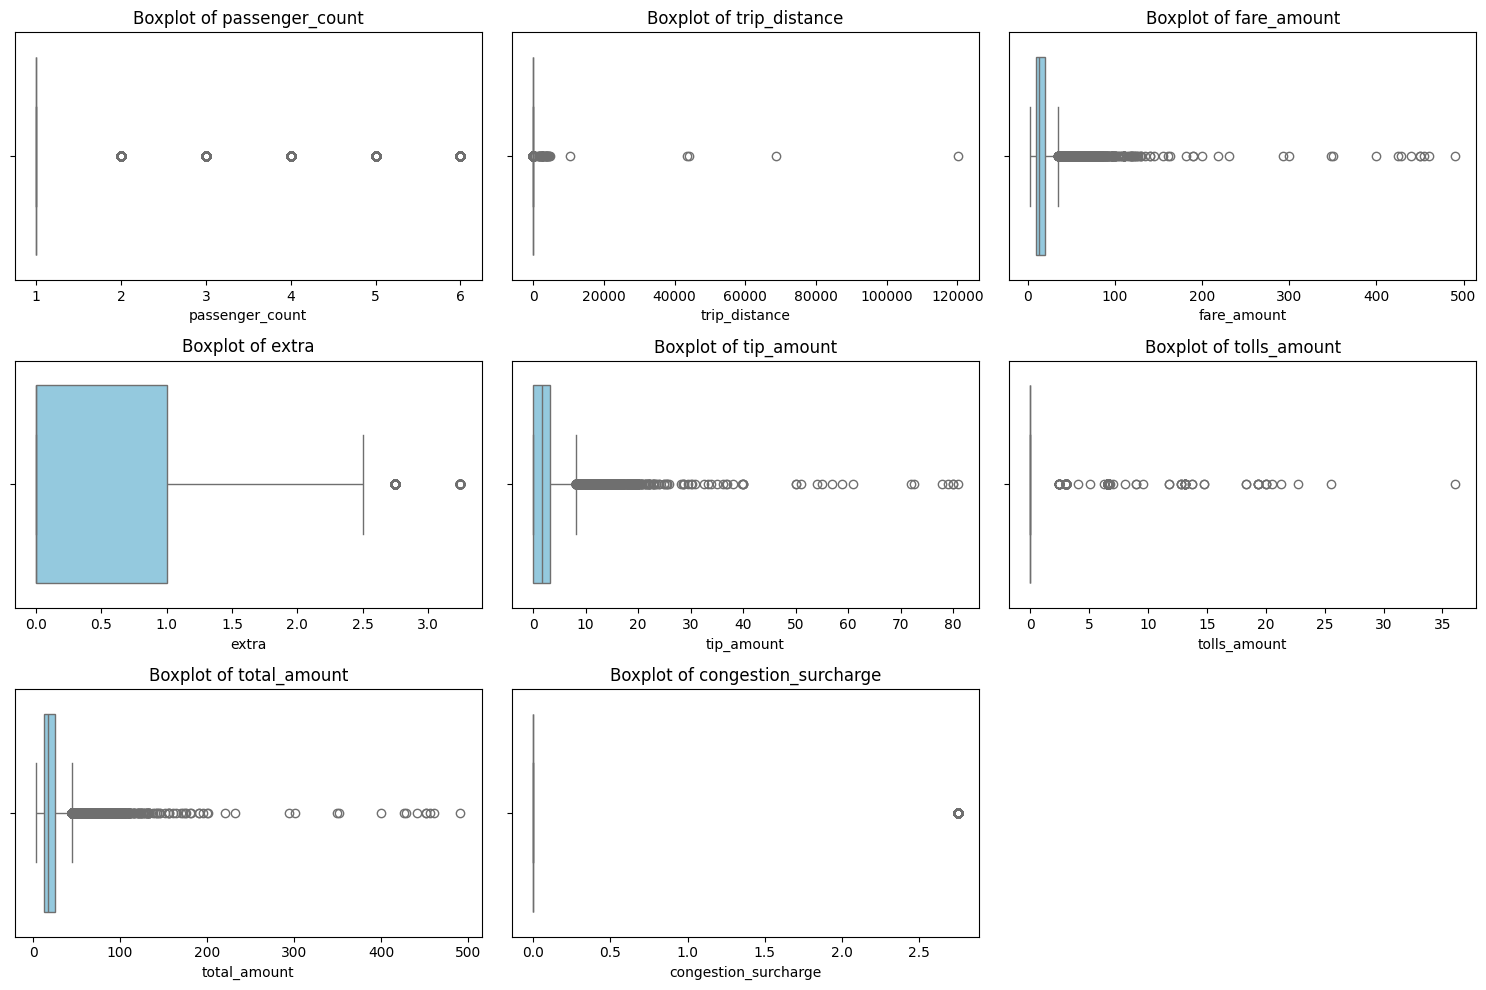

In [205]:
# Visualize Outliers Using Boxplots

# List of numerical columns with outliers to plot
columns_to_plot = ['passenger_count', 'trip_distance', 'fare_amount', 'extra', 'tip_amount', 'tolls_amount', 'total_amount', 'congestion_surcharge']

# Set up the figure size
plt.figure(figsize=(15, 10))

# Loop through the columns and plot boxplots
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)  
    sns.boxplot(x=df[column], showfliers=True, color="skyblue")
    plt.title(f'Boxplot of {column}')

# Adjust layout for better spacing
plt.tight_layout()

# Show the boxplots
plt.show()

####    <u>**Insights after Checking Outliers**</u>

After **checking for outliers across 10 columns**, it was found that **2 columns have no outliers**: `MTA Tax` and `improvement_surcharge`. Meanwhile, **8 columns contain outliers**: `passenger_count`, `trip_distance`, `fare_amount`, `extra`, `tip_amount`, `tolls_amount`, `total_amount`, and `congestion_surcharge`. The details are as follows:  
<br>
##### **# Columns Without Outliers**  

1. **MTA Tax**  
   - **Number of outliers**: **0**  
   - **Recommended action**: **No action required**  
   - **Reason**: The MTA tax is a legally fixed amount of **$0.50** per trip, and all values in this column conform to that standard. Since there are no anomalies, no modifications are necessary.  
<br>
2. **Improvement Surcharge**  
   - **Number of outliers**: **0**  
   - **Recommended action**: **No action required**  
   - **Reason**: The improvement surcharge is a standardized, mandatory charge of **$1.00** per trip. Since all values align with this regulation, there is no need for adjustments.  
<br>

##### **# Columns with Outliers**  

1. **Passenger Count**  
   - **Number of outliers**: **8,743**  
   - **Recommended action**: **No action required**  
   - **Reason**: The passenger count values fall entirely within the valid range (1 to 6), which aligns with standard taxi occupancy limits. Since there are no invalid values (e.g., zero or excessively high numbers), the data accurately represents real-world scenarios, and no modifications are necessary.  
<br>
2. **Trip Distance**  
   - **Number of outliers**: **5,857**  
   - **Recommended action**: **Drop the outliers**  
   - **Reason**: Extremely high trip distances (e.g., hundreds or thousands of miles) are unrealistic for a single taxi ride and may result from GPS errors, data entry mistakes, or system miscalculations. Keeping these outliers could distort fare calculations and trip duration analyses, so removing them ensures a more accurate representation of typical taxi trips.  
<br>
3. **Fare Amount**  
   - **Number of outliers**: **4,062**  
   - **Recommended action**: **Drop the outliers**  
   - **Reason**: Excessively high fares (e.g., hundreds of dollars) are likely due to billing errors or rare outlier cases, such as long-distance trips with unreasonably high rates. Removing these ensures a more representative fare distribution.  
<br>
4. **Extra Charges**  
   - **Number of outliers**: **1,622**  
   - **Recommended action**: **No action required**  
   - **Reason**: : The values in the `extra` column are within the expected range (0 to 3.5), indicating that there are no invalid or unrealistic charges. Since all entries reflect valid additional fees, no outlier removal is necessary.  
<br>
5. **Tip Amount**  
   - **Number of outliers**: **1,806**  
   - **Recommended action**: **Drop the outliers**  
   - **Reason**: Extremely high tip amounts could result from incorrect manual input or outlier cases that skew tipping behavior analysis. Removing these values helps maintain a realistic and reliable understanding of passenger tipping habits.  
<br>
6. **Tolls Amount**  
   - **Number of outliers**: **1,335**  
   - **Recommended action**: **Drop the outliers**  
   - **Reason**: Tolls should correspond to known toll rates for specific routes, and any extreme values may indicate incorrect reporting or misclassification. By filtering out these outliers, we ensure that toll-based costs reflect real-world transportation conditions.  
<br>
7. **Total Amount**  
   - **Number of outliers**: **3,760**  
   - **Recommended action**: **Drop the outliers**  
   - **Reason**: The total fare amount should be derived from logical fare components. Unreasonably high fares may indicate errors or fraudulent transactions. Dropping these ensures that the total amount accurately represents fair and valid transactions.  
<br>
8. **Congestion Surcharge**  
   - **Number of outliers**: **16,155**  
   - **Recommended action**: **No action required**   
   - **Reason**: The congestion surcharge is always either $0.00 or $2.75, aligning with expected fee structures. Since no unexpected values are present, the data is already consistent and does not require modifications.  

<br>

---



#### **e.2 Handling Outliers** 

In [206]:
# Removing Outliers that Distort Analysis

# Define columns with outliers to be dropped
outliers_to_drop = ['trip_distance', 'fare_amount', 'tip_amount', 'tolls_amount', 'total_amount']

# Outlier removal function using IQR
def remove_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]  # Filtering outliers directly

    return df

# Apply the function
df = remove_outliers_iqr(df, outliers_to_drop)  # Directly modify df

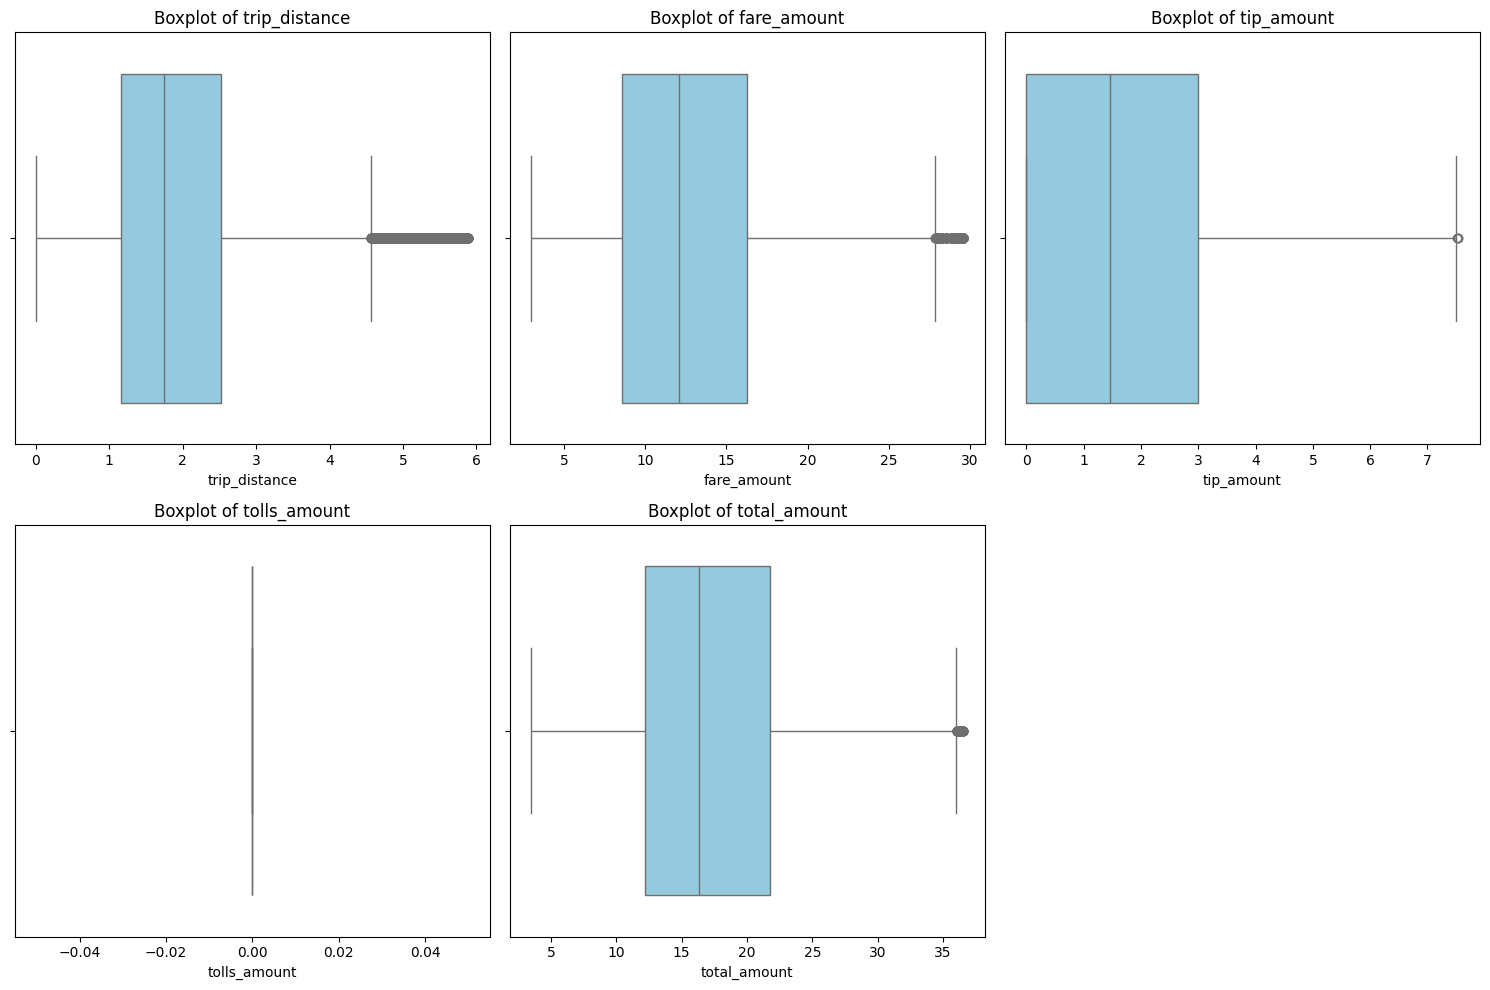

In [207]:
# Final Outlier Check with Boxplots

# Set figure size for better visualization
plt.figure(figsize=(15, 10))

# Create a boxplot for each column after outlier removal
for i, column in enumerate(outliers_to_drop, 1):
    plt.subplot(2, 3, i)  # Arrange in 2 rows, 3 columns
    sns.boxplot(x=df[column], color='skyblue', orient='h')  # Horizontal boxplot
    plt.title(f'Boxplot of {column}')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [208]:
# Check descriptive statistics of numerical columns after handling outliers
df.describe().T

,count,mean,min,25%,50%,75%,max,std
lpep_pickup_datetime,56493,2023-01-16 22:24:40.475279872,2023-01-01 00:01:31,2023-01-09 12:03:53,2023-01-17 08:53:27,2023-01-24 15:42:58,2023-01-31 23:45:10,NaN
lpep_dropoff_datetime,56493,2023-01-16 22:39:54.270227968,2023-01-01 00:13:26,2023-01-09 12:23:46,2023-01-17 09:07:58,2023-01-24 15:58:43,2023-01-31 23:55:05,NaN
passenger_count,56493.0,1.299754,1.0,1.0,1.0,1.0,6.0,0.953292
trip_distance,56493.0,1.968006,0.01,1.16,1.75,2.52,5.89,1.123142
fare_amount,56493.0,12.954301,3.0,8.6,12.1,16.3,29.6,5.503627
extra,56493.0,0.720563,0.0,0.0,0.0,1.0,3.25,1.017257
mta_tax,56493.0,0.5,0.5,0.5,0.5,0.5,0.5,0.0
tip_amount,56493.0,1.690475,0.0,0.0,1.46,3.0,7.54,1.795974
tolls_amount,56493.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
improvement_surcharge,56493.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [209]:
# Check data information after handling outliers
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56493 entries, 0 to 68209
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               56493 non-null  category      
 1   lpep_pickup_datetime   56493 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  56493 non-null  datetime64[ns]
 3   store_and_fwd_flag     56493 non-null  category      
 4   RatecodeID             56493 non-null  category      
 5   PULocationID           56493 non-null  category      
 6   DOLocationID           56493 non-null  category      
 7   passenger_count        56493 non-null  int64         
 8   trip_distance          56493 non-null  float64       
 9   fare_amount            56493 non-null  float64       
 10  extra                  56493 non-null  float64       
 11  mta_tax                56493 non-null  float64       
 12  tip_amount             56493 non-null  float64       
 13  tolls_

####    <u>**Summary of Handling Outliers**</u>

1. **Identified Outlier Columns**  
    IQR and boxplot analysis revealed outliers in **8 columns**:
    `passenger_count`, `trip_distance`, `fare_amount`, `extra`, `tip_amount`, `tolls_amount`, `total_amount`, `congestion_surcharge`

    - **Dropped (Severe Distortion):**  
    `trip_distance`, `fare_amount`, `tip_amount`, `tolls_amount`, `total_amount`. These columns contained extreme values that could mislead analysis and were removed.  

    - **Kept (Justified Outliers):**  
    `passenger_count`, `extra`, and `congestion_surcharge` were not removed. The `passenger_count` outliers were within an expected range, likely representing shared rides. The `extra` and `congestion_surcharge` values followed predefined fee structures, so their outliers were not considered errors.  

2. **Outlier Handling**  
    - **Total Outliers Removed:** **8,595** rows.  
    - **Before Removal:** Boxplots showed highly skewed distributions with extreme outliers distorting statistical summaries.  
    - **After Removal:** The removal of extreme values restored a more balanced distribution, reducing skewness and improving data reliability.  

3. **Dataset Overview After Handling Outliers**  
    - The dataset originally had 65,088 rows, which was reduced to 56,493 rows after removing 8,595 outliers.
    - The cleaned dataset now accurately represents realistic taxi transactions by eliminating extreme anomalies, ensuring more reliable and interpretable analysis.

<br>

---


### <u>**Summary of Data Cleaning**</u>

Based on the data cleaning process that has been completed, five types of data cleaning were performed: **checking and handling missing values**, **converting incorrect data types**, **checking and handling duplicate data**, **checking and handling inconsistent data**, and **checking and handling outliers**. The summary of key insights is as follows:  
<br>

1. **Handling of Missing Values**
    - **Dropped Column with 100% Missing Values:**  
      `ehail_fee` was **dropped** as it contained **100% missing values**, providing no useful information.  

    - **Imputation for Moderate Missing Values (5% - 15%):**  
      - **Categorical columns** (`trip_type`, `store_and_fwd_flag`, `RatecodeID`, `payment_type`) were **filled with mode**.  
      - **Numerical columns** (`passenger_count`, `congestion_surcharge`) were **filled with median**.  
    - **Dropped Rows for Columns with <1% Missing Values:**  
      - `Borough_pickup`, `Zone_pickup`, `service_zone_pickup`, `Borough_dropoff`, `Zone_dropoff`, `service_zone_dropoff`.  
      -  Rows were removed since they are derived from `PULocationID` and `DOLocationID`, and missing values in these fields indicate an issue with location matching.  
    - **Dataset Overview:**  
      - Columns reduced from **26 to 25**.  
      - Records reduced from **68,211 to 67,499**.  
      - **No missing values remain**.  
<br>
2. **Converting Incorrect Data Types**  
    - **Datetime Conversion:**  
        Converted `lpep_pickup_datetime` & `lpep_dropoff_datetime` to **datetime format** for time-based analysis.  

    - **Integer Conversion:**  
        Converted `passenger_count` from float to **integer**.  

    - **Categorical & Boolean Conversion:**  
      - `VendorID`, `RatecodeID`, `PULocationID`, `DOLocationID`, `store_and_fwd_flag`, `payment_type`, `trip_type` were **converted to categorical**.  
      - `store_and_fwd_flag` (`'Y'` & `'N'`) were **mapped to boolean (True/False)**.  
    - **Dataset Overview:**  
      - Structured and optimized for efficient processing.  
      - Enables **better storage efficiency and accurate computations**.  
<br>
3. **Handling Duplicate Data**  
    - **Duplicate Identification & Removal:**  
      - Found **168 duplicate rows** across critical columns (`VendorID`, `RatecodeID`, `payment_type`, `trip_type`, `lpep_pickup_datetime`, `lpep_dropoff_datetime`, `PULocationID`, `DOLocationID`, `passenger_count`, and `trip_distance`).  
      - **Dropped duplicates**, keeping the first occurrence.  
    - **Dataset Overview:**  
      - Rows reduced from **67,499 to 67,331**.  
      - Ensured **only unique trip records remain** for reliable analysis.  
    <br>
4. **Handling Inconsistent Data**  

    - **Negative Values:**  
      - **Removed rows** with negative `fare_amount` & `total_amount`.  
      - Replaced negative values in `extra`, `tip_amount`, `congestion_surcharge` with **0**.  
      - Fixed `mta_tax` to **0.50** and `improvement_surcharge` to **1.00** (NYC taxi rules).  

    - **Impossible Zero Values:**  
      - Replaced **zero `passenger_count`** with mode.  
      - Replaced **zero `trip_distance`** with median.  

    - **Invalid Categorical Values:**  
        Replaced `RatecodeID` values outside **1-6** with the mode.  

    - **Passenger Count Exceeding 6:**  
        **Removed the excessive records**, as green taxis allow **a maximum of 6 passengers.**  

    - **Time Range Consistency:**  
        **Dropped rows** where `pickup/dropoff datetime` was outside **January 2023**.  

    - **Temporal Consistency Check:**  
        **Removed rows** where `lpep_pickup_datetime` = `lpep_dropoff_datetime` (invalid entries).  

    - **Validating Numerical Columns:**  
      - **Removed records** where `fare_amount` was less than $3.00, `tip_amount` exceeded $100, and `extra` was outside the range of 0 to 3.5.
      - **Corrected values** for `mta_tax`, `improvement_surcharge`, and `congestion_surcharge`.  

    - **Categorical Standardization:**  
        Fixed **misspellings** in categorical columns and **converted to lowercase**.  
        
    - **Dataset Overview:**  
      - Cleaned **invalid financial values, categorical errors, and time inconsistencies**.  
      - Rows reduced from **67,331 to 65,094**.  
<br>
5. **Handling Outliers**  
    - **Identified Outlier Columns:**  
      - Outliers detected in **8 columns** (`passenger_count`, `trip_distance`, `fare_amount`, `extra`, `tip_amount`, `tolls_amount`, `total_amount`, `congestion_surcharge`).  
    - **Outlier Handling:**  
      - **Dropped severe outliers** in `trip_distance`, `fare_amount`, `tip_amount`, `tolls_amount`, `total_amount`.  
      - **Kept reasonable outliers** in `passenger_count`, `extra`, and `congestion_surcharge`.  
    - **Total Outliers Removed:**  
      - **8,595 rows** removed.  
      - Improved **statistical distribution** and **data reliability**.  
<br>
6. **Final Dataset Overview after Data Cleaning** 
    - **Final Row Count:** **56,493**. 
    - **Final Column Count:** **25**.  
    - **Dataset is now ready for analysis as it is free of missing values, duplicates, inconsistencies, and extreme outliers**.  

<br>

---
<a id="numerical"></a>

## **Chapter III &nbsp;&nbsp;|&nbsp;&nbsp; DATA ANALYSIS**

---

**Data analysis** involves examining and transforming data to uncover meaningful patterns, draw insights, and support decision-making. **In this project**, data analysis is performed on NYC Green Taxi trip records to address key operational challenges following the data cleaning process. Specifically, it explores **when and where green taxi demand is highest, how fare metrics relate to trip characteristics, and how passengers behave in terms of group size and payment preferences**. This chapter applies Exploratory Data Analysis (EDA), data visualizations, descriptive statistics, and inferential analysis to uncover insights that may support improvements in Green Taxi operations in NYC.

<a id="basic"></a>
### **III.1 Trip Demand Over Time Analysis**

Understanding trip demand over time is key to enhancing Green Taxi service availability and operational planning. This analysis focuses on three aspects: **overall trip volume by hour of the day**, **demand variation across days of the week**, and **hourly demand patterns across each day of the week**. By extracting and analyzing time-based features from the dataset, this section uncovers **peak usage periods** and **recurring trends**, helping identify when passengers are most likely to use the service. Visualizations such as line charts and heatmaps support these insights, enabling better **scheduling**, **resource allocation**, and **driver deployment strategies** across different time intervals.  



#### **a. Trip Demand by Hour of Day**

This analysis examines how passenger demand varies across different hours of the day. A **line chart** is used to visualize the number of trips per hour, highlighting key patterns in daily travel behavior. By identifying **peak and off-peak hours**, this analysis helps uncover when taxis are most frequently used. This information is useful for understanding passenger habits, optimizing driver schedules, and aligning fleet availability with actual demand throughout the day.


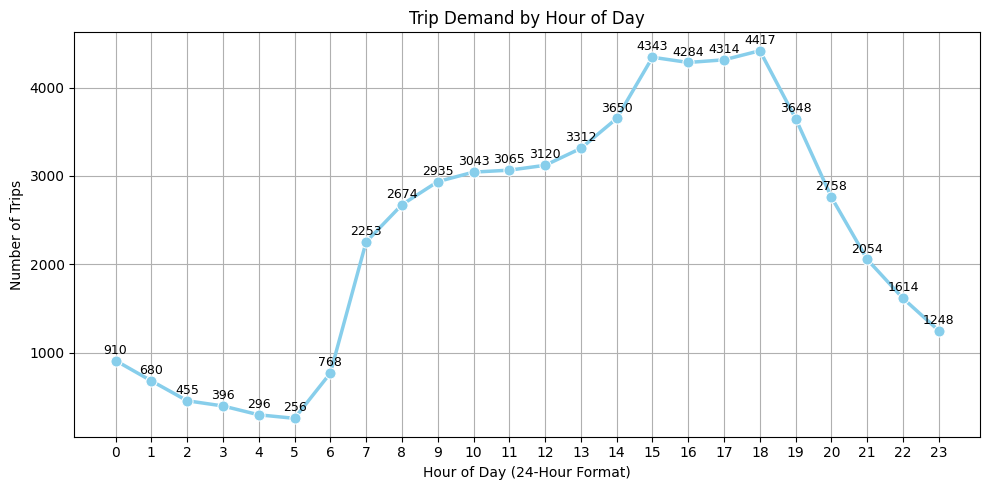

In [210]:
# LINE GRAPH OF TRIP DEMAND BY HOUR OF DAY

# Extract hour from pickup time
df['hour'] = df['lpep_pickup_datetime'].dt.hour

# Count trips by hour
hourly_demand = df['hour'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(
    x=hourly_demand.index,
    y=hourly_demand.values,
    marker='o',
    markersize=8,
    linewidth=2.5,
    color='skyblue'
)

# Annotate values on the plot
for x, y in zip(hourly_demand.index, hourly_demand.values):
    plt.text(x, y + max(hourly_demand.values)*0.01, f'{y}', ha='center', va='bottom', fontsize=9)

plt.title('Trip Demand by Hour of Day')
plt.xlabel('Hour of Day (24-Hour Format)')
plt.ylabel('Number of Trips')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

####    <u>**Insights into Trip Demand by Hour of Day**</u>

Based on the line chart above, green taxi trip volume in NYC follows a **highly structured daily pattern** that reflects **urban routines, commuting cycles, and discretionary movement**. The analysis reveals several critical demand windows that can inform operational strategy:  
<br>
1. **Evening Rush Hour Peak (3 PM – 6 PM): Most Intense Demand Period**
   - The highest number of trips occurs in the **late afternoon to early evening**, consistently exceeding **4,000 trips/hour** and peaking at **4,417 at 6 PM**.
   - This peak period reflects a major **end-of-day urban transition**, where multiple population groups simultaneously generate high travel demand. Office workers and government employees **commute home**, students are **picked up from schools** and extracurriculars, retail and service staff **change shifts**, and both residents and tourists begin their **evening plans** such as dining, shopping, or attending events. These overlapping activities lead to dense, diverse, and often spontaneous trip flows across the city, making this time frame highly profitable and operationally critical. Additionally, this period aligns with **increased traffic congestion**, leading some to switch from personal vehicles to taxis or app-based options to avoid parking stress or delays.
    - From an operational standpoint, this is the **busiest and most profitable time** of the day, where fleet managers should ensure **plenty of taxis are available**, and **schedule driver breaks carefully** to avoid missing peak-hour earnings.  
<br>
2. **Morning Commute Buildup (6 AM – 10 AM): Rapid Growth Phase**  
   - Trip volume rises quickly from **768 at 6 AM** to over **3,000 by 10 AM**, driven by the start of the city’s daily routines.  
   - This sustained rise is driven by **structured, time-sensitive travel**, such as commuting to offices, school drop-offs, medical visits, and early business operations, where **punctuality is prioritized over flexibility**. Unlike evening trips, which are often flexible and leisure-oriented, morning demand is **more consistent and compressed within a narrow window**, creating a clear and predictable **peak period**.  
   - For operators, anticipating this structured demand curve is key to **ensuring early vehicle availability**, managing **trip flow efficiently**, and reducing early-morning service gaps.  
<br>
3. **Midday Plateau (11 AM – 2 PM): Steady Demand**
   - Trips remain stable between **3,065 and 3,650 per hour**, showing **consistent usage** during late morning and early afternoon.
   - This reflects a mix of **leisure, business, and tourism-related travel**, and provides a **reliable operating window** with minimal fluctuations.  
<br>
4. **Evening Decline (7 PM – 11 PM): Demand Declines**
   - After 6 PM, demand drops steadily to **1,248 trips/hour** by **11 PM**.
   - This phase corresponds to the **end of structured activity**, with remaining demand tied to **entertainment, dining**, or **night-shift work**.
   - This period is useful for **reducing fleet size**, reallocating vehicles to nightlife districts, or initiating **driver rotations**.  
<br>
5. **Low Overnight Activity (12 AM – 5 AM): Off-Peak Hours**  
   - During these hours, trip demand drops significantly, falling below **400 trips/hour** and reaching the day's lowest point of **256 at 5 AM**.  
   - This minimal activity reflects the city's natural slowdown, where only **essential or irregular trips** continue, such as **airport drop-offs, overnight shift commutes, hotel-related pickups, or leisure travel from late-night venues**.
   - From an operational perspective, this window offers **limited return on active deployment**, making it ideal for **driver rest periods, vehicle servicing, or reallocation to high-demand zones ahead of the morning peak**.

<br>


####    <u>**Strategic Recommendations**</u>

The **strategic recommendations** below are obtained from the **analysis of trip demand patterns** across different **hours of the day**. These insights can help optimize **fleet operations**, **pricing strategies**, and overall **service efficiency**.
<br>

1. **Prioritize Peak Hours for Fleet Deployment**  
    - Focus operations around the two most critical demand windows:  
        - **Morning Peak (6–10 AM):** Structured and time-sensitive travel driven by commuters and school drop-offs. Ensure **early vehicle availability** to prevent service gaps and capture predictable demand.  
        - **Evening Peak (3–6 PM):** The busiest and most profitable window of the day, driven by commuters, school pickups, shift changes, and evening activities. **Maximum fleet availability**, and **strategically time driver breaks** to avoid peak-hour downtime.  
<br>
2. **Dynamic Pricing and Incentive Strategy**  
    - Apply **surge pricing or driver bonuses** during the **5–6 PM** peak hour to attract more drivers when demand and profitability are highest.
    - Encourage ridership in low-demand hours (**12–5 AM, after 9 PM**) with **passenger discounts or loyalty incentives**, helping to smooth utilization throughout the day.  
<br>
3. **Use Midday Stability for Promotions**  
    The **steady midday window (11 AM – 2 PM)** presents an opportunity for targeted promotions, especially for **tourists, business professionals, and casual riders**. Operators can experiment with **flat-rate offers** or **bundle pricing** during this period.  
<br>
4. **Optimize Overnight Operations**  
    Minimize active deployment between **12 AM and 5 AM**, as demand is limited to **essential and irregular trips** (e.g., airport runs, hotel pickups, nightlife travel). Use this window for **vehicle maintenance, driver rest, or repositioning** ahead of the morning surge.  

<br>

---


#### **b. Trip Demand by Day of Week**

This analysis explores how trip volume changes across different days of the week. A **line chart** is used to show the number of trips for each day of week, allowing for easy identification of weekly demand patterns. Understanding daily fluctuations in demand helps inform **operational planning**, such as adjusting driver shifts or vehicle availability. It also offers insights into **commuter vs. leisure travel behavior**, which can vary between weekdays and weekends.

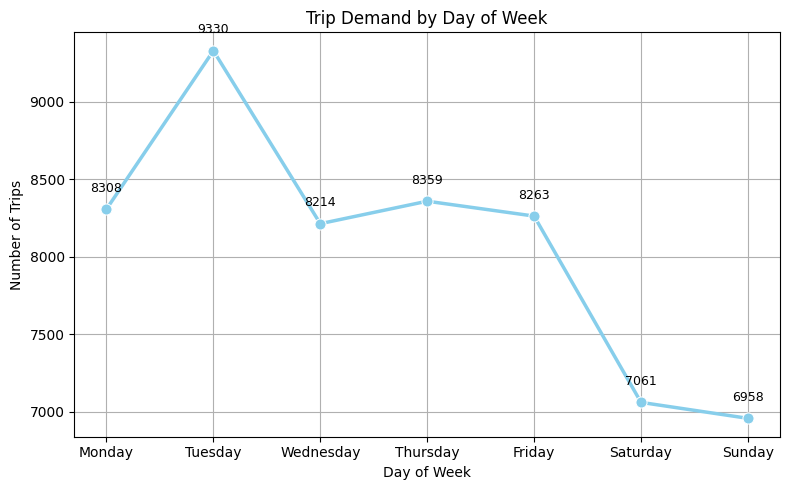

In [211]:
# LINE GRAPH OF TRIP DEMAND BY DAY OF WEEK

# Extract day of week
df['day_of_week'] = df['lpep_pickup_datetime'].dt.day_name()

# Define full day of week order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Count trips by day and reindex to ensure correct order
day_demand = df['day_of_week'].value_counts().reindex(weekday_order)

# Plot
plt.figure(figsize=(8, 5))
sns.lineplot(
    x=day_demand.index,
    y=day_demand.values,
    marker='o',
    markersize=8,
    linewidth=2.5,
    color='skyblue'
)

# Annotate values on the plot
for x, y in zip(day_demand.index, day_demand.values):
    plt.text(x, y + max(day_demand.values)*0.01, f'{y}', ha='center', va='bottom', fontsize=9)

plt.title('Trip Demand by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.tight_layout()
plt.show()

####    <u>**Insights into Trip Demand by Day of Week**</u>

Based on the line chart above, green taxi trip demand in NYC reveals **clear temporal structures aligned with the city's weekly rhythm**, driven by work-related travel patterns and lifestyle routines.  
<br>
1. **Tuesday Peak: Highest Weekday Demand**  
   - **Tuesday records the highest number of trips (9,330)**, standing out significantly from other weekdays and marking it as the **strongest operational day** for green taxis.  
   - This elevated demand may reflect a concentration of **in-person meetings, office attendance, and post-Monday scheduling overflow**, making it a priority day for **maximizing fleet coverage and targeting business districts**.  
<br>
2. **Weekday Dominance (Monday–Friday): Commuting-Driven Stability**  
   - Trip volumes remain **consistently high and stable** during weekdays, ranging from **8,214 (Wednesday) to 9,330 (Tuesday)**.  
   - This reflects **regular commuting routines**, structured work schedules, and school travel, highlighting the value of **predictable weekday demand** for planning shifts, pricing, and coverage zones.  
<br>
3. **Weekend Drop-Off: Reduced Activity and Leisure Travel**  
   - Demand drops sharply over the weekend, falling to **7,061 on Saturday** and **6,958 on Sunday**, with Sunday representing the **lowest overall demand day**, about **25% lower than Tuesday**.  
   - This reflects the absence of commuting flows and greater reliance on **discretionary or leisure trips**, suggesting operators can **scale down services or reallocate vehicles** to entertainment areas.  
<br>
4. **Saturday Outpaces Sunday, But Still Trails Weekdays**  
   - **Saturday maintains slightly higher demand than Sunday** (by 103 trips), likely due to **shopping, social, and event-driven travel**, though it still lags far behind the structured patterns of weekdays.  
   - It may offer **targeted opportunities** in nightlife or high-traffic leisure zones.  
<br>
5. **Low Variance Among Most Weekdays (Excluding Tuesday)**  
   - **Monday, Wednesday, Thursday, and Friday** show relatively tight clustering in trip counts (**8,214 – 8,359**), indicating a **reliable weekday baseline**.  
   - While Tuesday is the clear outlier, this weekday consistency is ideal for **planning predictable operations**, with modest adjustments based on external factors (e.g., weather, events).  

<br>


####    <u>**Strategic Recommendations**</u>

The **strategic recommendations** presented below are based on the **analysis of trip demand patterns** across various **days of the week**, as outlined below:
<br>

1. **Maximize Fleet Deployment on Tuesdays:**  
  With Tuesday showing the highest demand, ensure **greater vehicle availability** and driver coverage, especially near business hubs and transit corridors. Consider offering **driver incentives** or **extended shifts** on this day to meet peak operational potential.  
<br>
2. **Maintain a Steady Weekday Fleet (Monday to Friday):**  
  Weekdays show **consistently high and stable demand**, allowing for a **uniform baseline fleet strategy**. Minor adjustments can be made to slightly boost capacity on Monday and taper slightly after Tuesday's peak.  
<br>
3. **Scale Down Weekend Operations, Especially Sundays:**  
  Trip volume falls significantly on weekends, with **Sunday as the slowest day (~25% lower than Tuesday)**. Reduce active fleet size during this period to **minimize idle time and cost inefficiencies**, while reallocating vehicles to zones with nightlife or leisure activity.  
<br>
4. **Use Sunday for Non-Revenue Activities:**  
  Leverage the low-demand window on Sunday for **vehicle maintenance, driver rest, onboarding, or training**, ensuring the fleet is fully prepared for the Monday–Friday demand cycle.  
<br>
5. **Targeted Promotions for Low-Use Periods:**  
  Consider deploying **fare discounts, app-based deals, or ride-sharing incentives** during low-demand weekdays (e.g., Wednesday or Friday) or on the weekend to stimulate ridership and smooth out underutilized capacity.  

<br>

---


#### **c. Hourly Demand by Day of Week**

This analysis examines **how trip demand varies by hour across each day of the week**. A **heatmap** is used to visualize the intensity of trips for every hour–day combination, making it easy to spot peak travel times and quieter periods. This approach helps uncover **temporal demand patterns**, such as weekday rush hours or weekend late-night activity. These insights are valuable for **fleet deployment, driver scheduling**, and identifying **high-demand windows** for operational optimization.

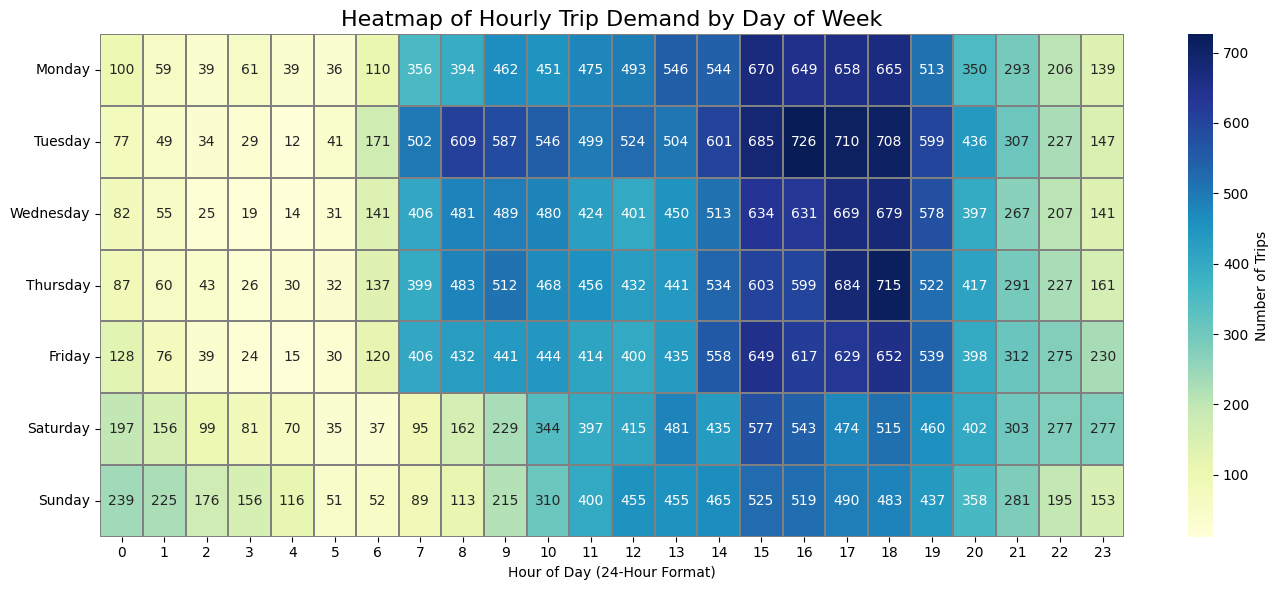

In [212]:
# HEATMAP OF HOURLY DEMAND BY DAY OF WEEK

# Extract hour and day of week
df['hour'] = df['lpep_pickup_datetime'].dt.hour
df['day_of_week'] = df['lpep_pickup_datetime'].dt.day_name()

# Group by day and hour to count trips
hourly_by_day = df.groupby(['day_of_week', 'hour']).size().reset_index(name='trip_count')

# Pivot the data for heatmap (rows = days, columns = hours)
heatmap_data = hourly_by_day.pivot_table(
    index='day_of_week',
    columns='hour',
    values='trip_count',
    aggfunc='sum'
)

# Reorder days of the week
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(weekday_order)

# Plot the heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(
    heatmap_data,
    cmap='YlGnBu',
    linewidths=0.3,
    linecolor='gray',
    annot=True,
    fmt='g',
    cbar_kws={'label': 'Number of Trips'}
)

plt.title('Heatmap of Hourly Trip Demand by Day of Week', fontsize=16)
plt.xlabel('Hour of Day (24-Hour Format)')
plt.ylabel('')
plt.tight_layout()
plt.show()

####    <u>**Insights into Hourly Demand by Day of Week**</u>

The heatmap above reveals that green taxi demand in NYC follows a **regular and rhythmic weekly cycle**, characterized by **structured weekday peaks** and **more relaxed weekend patterns**. Demand intensifies during **weekday commuting hours**, especially on **Tuesday**, while weekends shift toward **afternoon leisure activity** with fewer sharp spikes. This structured behavior provides a clear foundation for optimizing taxi operations across different days and time periods. The details are as follows:  
<br>
1. **Tuesday: Strongest Hourly and Daily Demand**
    - **Tuesday shows the highest taxi demand of the week**, peaking at **4 PM (726 trips)**, with consistently strong volumes at **5 PM (710)** and **8 AM (609)**.
    - This pattern reflects a **compressed wave of structured travel**, driven by **commuting, meetings, errands, and school routines** that cluster midweek.
    - The **dual peaks** suggest that both **professional obligations and personal errands** are front-loaded on Tuesdays, likely due to post-Monday scheduling overflow.
    - For operators, Tuesday is the most **strategically valuable day**, ideal for **full driver deployment** and **bonus-based incentives** during **7–9 AM** and **3–6 PM**, when both reliability and availability are critical to capturing demand.  
<br>
2. **Clear Commuter Peaks on Weekdays (Monday – Friday)**
    - Most weekdays follow a **two-peak pattern** driven by the standard **commute cycle**:
        - **Morning peak:** 7–9 AM (often strongest at 9 AM)
        - **Evening peak:** 3–6 PM (often strongest at 6 PM)
    - These periods correspond to **work and school transitions**, representing **predictable and profitable demand** that should guide **shift scheduling** and **fleet distribution**.  
<br>
3. **Friday Transition: Lower Morning, Strong Evening**
    - **Friday morning demand is weaker**, with a peak shifted later to **10 AM (444 trips)**.
    - The **evening peak remains strong (652 trips at 6 PM)**, likely driven by **social activities, out-of-city travel, or nightlife**.
    - This transition suggests a **shift from structured to discretionary travel**, which benefits from **targeted evening strategies**, such as **zone reallocation** or **promotions**.  
<br>
4. **Weekend Trends: Flattened Peaks, Leisure-Centered Activity**
    - **Saturday and Sunday follow a more gradual, flattened demand curve**, peaking in the **mid-afternoon** rather than in sharp commute windows.  
        - **Saturday peaks at 3 PM (577 trips)** and maintains steady demand through the early evening, driven by **shopping, dining, and social outings**.
        - **Sunday reaches a softer peak at 3 PM (525 trips)**, reflecting a more relaxed, **family- or tourism-oriented** travel pattern with minimal urgency.
    - Unlike weekdays, which are dominated by **structured commuting flows**, weekends reflect **discretionary travel**, often **flexible in timing and location**, leading to **less predictable but steady demand**.
    - Operationally, weekends require **broad coverage rather than high density**, with opportunities to **target leisure hotspots** and optimize **fleet allocation** based on localized weekend attractions rather than fixed commuter routes.


<br>


####    <u>**Strategic Recommendations**</u>

The **strategic recommendations** presented below are based on the **analysis of hourly demand patterns by day of the week** conducted earlier. The key recommendations are as follows:  
<br>

1. **Prioritize Tuesdays for Full Deployment**  
  With Tuesday emerging as the **busiest day of the week**, especially during **commuting hours (7–9 AM and 3–6 PM)**, operators should allocate **more drivers and vehicles** on this day to fully capture peak demand and ensure rider satisfaction.  
<br>
2. **Align Weekday Scheduling with Commuter Peaks**  
  **Monday through Friday** show reliable **dual-peak demand patterns**. Fleet schedules should be structured to **maximize availability during 7–9 AM and 3–6 PM**, the most profitable windows for capturing consistent commuter traffic.  
<br>
3. **Adjust Friday Strategy for Late Morning and Evening Demand**  
  **Friday mornings start slower** compared to other weekdays, but demand builds by late morning and peaks again in the **evening (around 6 PM)**. This pattern suggests **reallocating coverage** to better match shifting traveler needs as the weekend approaches.  
<br>
4. **Ensure Steady Weekend Coverage with Targeted Afternoon Focus**  
  **Saturday and Sunday** exhibit **flatter, afternoon-centered demand curves**, with peaks between **2–4 PM**. Instead of high-intensity deployment, focus on maintaining a **steady fleet presence** from **10 AM to 6 PM**, especially around **shopping centers, dining areas, and leisure hotspots**.  
<br>
5. **Scale Back Late-Night Operations Across All Days**  
  Across the entire week, demand from **12 AM to 5 AM** remains **consistently low**, including on **Friday and Saturday nights**. Operators should consider **reducing fleet size during these hours**, except where nightlife or special events may justify localized service.  
<br>
6. **Use Sundays for Maintenance and Training**  
  With **Sunday being the lowest overall demand day**, this period offers a strategic window for **routine vehicle maintenance, driver training, and system updates** without significantly affecting service availability.  


<br>

---


###    <u>**Summary of Trip Demand Over Time Analysis**</u>

NYC green taxi demand follows a **highly structured and time-sensitive rhythm**, shaped by commuting patterns, weekday routines, and weekend leisure habits. The following summary offer clear insights for optimizing fleet operations based on **trip demand over time analysis**:  
<br>
1. **Prioritize Tuesday for Maximum Impact**
    - **Tuesday consistently shows the highest trip volume** for both hourly and daily, making it the **most valuable day for fleet deployment**.
    - Peaks occur at **8 AM, 4 PM, and 5 PM**, reflecting a dense blend of commuting, meetings, and errands.
    - **Deploy full coverage with bonuses or incentives** during **7–9 AM** and **3–6 PM** to fully capture demand.  
<br>
2. **Target Commuting Peaks (Weekdays 7–9 AM, 3–6 PM)**
    - All weekdays (Monday to Friday) display **dual demand peaks**:
        - **Morning (7–9 AM)** – driven by school and work commutes.
        - **Evening (3–6 PM)** – fueled by end-of-day travel and after-work activities.  
    - These are the **most predictable and profitable windows**. Schedule drivers and distribute fleets accordingly.  
<br>
3. **Strong Evening Demand Across the Week**
    - **6 PM is the single busiest hour** of the day across all days, peaking at **4,417 trips**.
    - Suggests an **end-of-day travel surge** involving commuters, shift workers, and people heading to leisure activities.
    - Ensure **high vehicle availability** and minimize driver breaks during this time.  
<br>
4. **Low Overnight Activity (12–5 AM)**
    - Demand drops below **400 trips/hour**, reaching the day's low around **5 AM**.
    - Use this period for **vehicle maintenance, driver rest, and repositioning for the morning peak**.  
<br>
5. **Weekend Demand is Leisure-Driven and Flattened**
    - **Saturday and Sunday** show **soft, midday-to-evening peaks**, not sharp rush hours.
        - **Saturday peaks at 3 PM (577 trips)**.
        - **Sunday peaks at 3 PM (525 trips)**, while it represents the day with the lowest overall demand.
    - Focus on **broad but lower-density coverage**, especially around **shopping, entertainment, and tourist zones**.  
<br>
6. **Weekday Stability (Excluding Tuesday)**
    - **Monday, Wednesday, Thursday, and Friday** show **consistent daily volumes (8,214 – 8,359 trips)**.
    - Offers a **reliable baseline** for planning staffing and fleet operations.  

<br>


### <u>**Strategic Recommendation Summary of Trip Demand Over Time Analysis**</u>

The following is a **summary of strategic recommendations** based on the **analysis of trip demand over time**.

1. **Focus on Commuter Peaks for Maximum Impact**  
    Align fleet deployment with consistent weekday demand peaks:  
    - **Morning (6–10 AM):** Structured, punctual travel from commuters and school traffic. Ensure early vehicle readiness.  
    - **Evening (3–6 PM):** The busiest and most profitable window, driven by overlapping trip purposes. Maximize availability and schedule breaks outside this window.  
<br>
2. **Prioritize Full Coverage on Tuesdays**  
    Tuesday consistently records the highest demand, especially during commuter hours. Deploy a full fleet, particularly in business zones, and offer driver incentives to ensure optimal service levels.  
<br>
3. **Adjust for Day-Specific Patterns**  
    - **Fridays:** Start slower in the morning but peak in the evening due to social activity. Reallocate coverage accordingly.  
    - **Weekends:** Demand flattens and peaks in the afternoon (2–4 PM). Maintain moderate coverage from 10 AM–6 PM, focusing on leisure zones.  
<br>
4. **Minimize Low-Return Operations**  
    Trip volume drops significantly between **12 AM and 5 AM** across all days and is lowest overall on **Sundays**. Reduce fleet size during these periods to cut idle time and cost.  
<br>
5. **Use Sundays Strategically for Non-Revenue Activities**  
    Leverage Sundays for vehicle maintenance, driver rest, onboarding, and system updates in preparation for the weekday demand cycle.  
<br>
6. **Apply Pricing and Promotional Levers**  
    - Use **surge pricing or driver bonuses** during high-demand hours (especially 5–6 PM) to boost driver supply.  
    - Offer **discounts or loyalty rewards** during **low-demand times**, such as midday, late at night, or Sunday afternoons, to help balance demand and improve vehicle usage.

<br>

---



<a id="basic"></a>
### **III.2 Trip Demand by Location Analysis**

This section explores **where** green taxi trips are most frequently initiated by analyzing trip distribution across different geographic levels. Understanding spatial demand helps reveal **high-traffic pickup boroughs and zones**, **temporal patterns across zones**, and **differences in weekday versus weekend behavior in top-performing areas**. These insights are crucial for **resource allocation**, **fleet positioning**, and adjusting services to **location-specific demand**.

#### **a. Trip Distribution by Pickup Borough and Zone**

This analysis explores the **geographic distribution of green taxi pickups** in New York City using **two bar charts**: one showing trip counts by **borough**, and another for the **top 10 pickup zones**. In this context, a **borough** refers to one of the five main administrative divisions of NYC: **Manhattan, Brooklyn, Queens, The Bronx, and Staten Island**. Each borough contains multiple **taxi zones**, which are smaller geographic areas defined by the NYC Taxi & Limousine Commission (TLC) for trip-level reporting. These visualizations highlight **areas of highest demand**, offering insights critical for optimizing **fleet deployment**, **driver positioning**, and overall **resource allocation**.

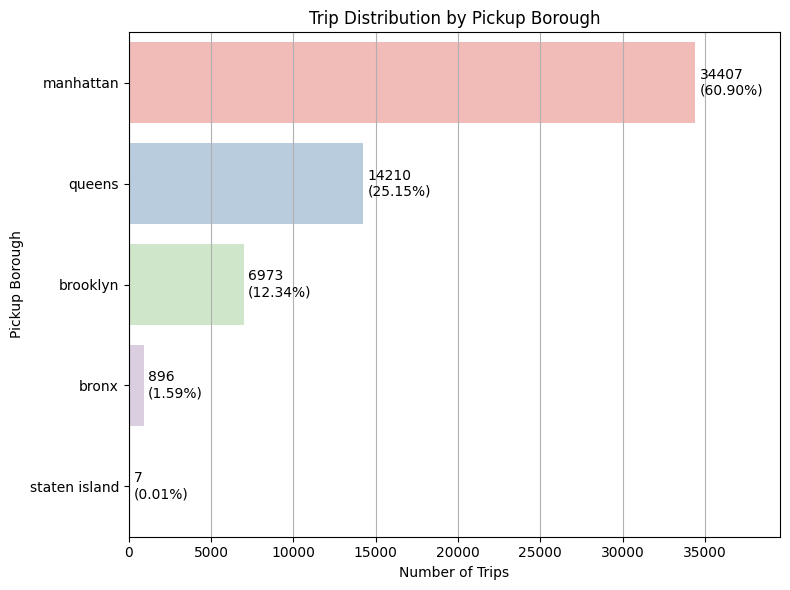

In [213]:
# HORIZONTAL BAR CHART OF TRIP DISTRIBUTION BY PICKUP BOROUGH

# Count trips by borough
borough_counts = df['Borough_pickup'].value_counts()
total_trips = borough_counts.sum()

# Plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=borough_counts.values, y=borough_counts.index, palette='Pastel1')

# Annotate bars with count and percentage on two lines
for i, (count, name) in enumerate(zip(borough_counts.values, borough_counts.index)):
    percentage = (count / total_trips) * 100
    label = f'{count}\n({percentage:.2f}%)'
    ax.text(count + total_trips * 0.005, i, label, va='center', fontsize=10)

plt.xlim(0, borough_counts.max() * 1.15)
plt.title('Trip Distribution by Pickup Borough')
plt.xlabel('Number of Trips')
plt.ylabel('Pickup Borough')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

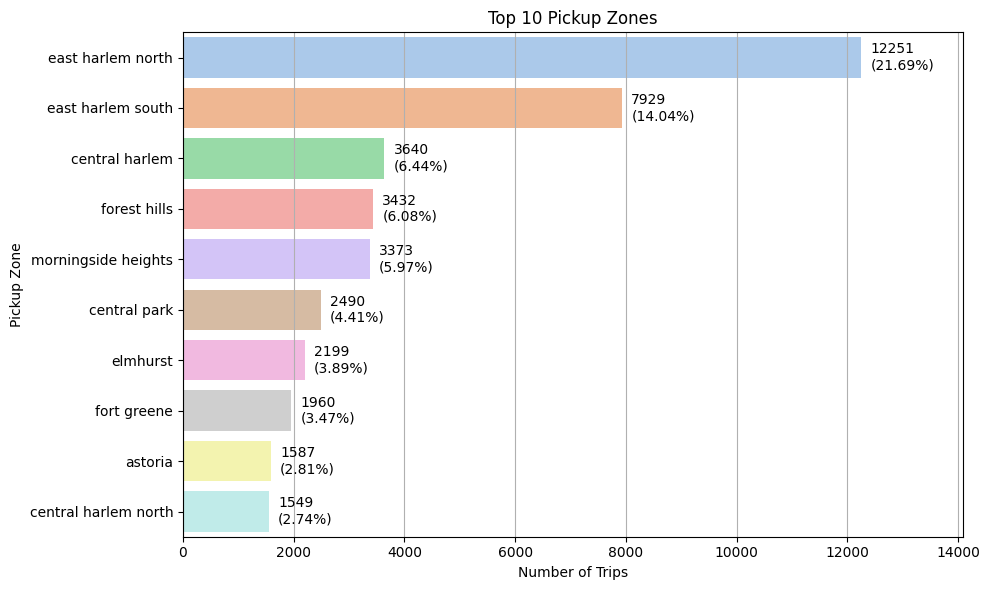

In [214]:
# HORIZONTAL BAR CHART OF TRIP DISTRIBUTION BY TOP PICKUP ZONES

# Count trips by pickup zone
zone_counts = df['Zone_pickup'].value_counts().head(10)
total_trips = df['Zone_pickup'].value_counts().sum()  # total for percentage

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=zone_counts.values, y=zone_counts.index, palette='pastel')

# Annotate bars with count and percentage on two lines
for i, (count, name) in enumerate(zip(zone_counts.values, zone_counts.index)):
    percentage = (count / total_trips) * 100
    label = f'{count}\n({percentage:.2f}%)'
    ax.text(count + total_trips * 0.003, i, label, va='center', fontsize=10)

plt.xlim(0, zone_counts.max() * 1.15)
plt.title('Top 10 Pickup Zones')
plt.xlabel('Number of Trips')
plt.ylabel('Pickup Zone')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


In [215]:
# TOP 10 PICKUP ZONES BY BOROUGH

top_zones = (
    df.groupby(['Zone_pickup', 'Borough_pickup'])
    .size()
    .reset_index(name='trip_count')
    .sort_values(by='trip_count', ascending=False)
    .head(10)
)

top_zones

,Zone_pickup,Borough_pickup,trip_count
57,east harlem north,manhattan,12251
58,east harlem south,manhattan,7929
28,central harlem,manhattan,3640
75,forest hills,queens,3432
122,morningside heights,manhattan,3373
30,central park,manhattan,2490
64,elmhurst,queens,2199
76,fort greene,brooklyn,1960
1,astoria,queens,1587
29,central harlem north,manhattan,1549


####    <u>**Insights into Trip Distribution by Pickup Borough and Zone**</u>

Based on the bar charts above, green taxi demand in NYC reveals **clear spatial patterns that reflect the city's urban activity centers**, with Manhattan emerging as the most consistently high-demand area, followed by select zones in Queens and Brooklyn. The details are as follows:


##### **# Trip Distribution by Pickup Borough**  


1. **Manhattan: Core of Taxi Demand**  
    - Manhattan dominates taxi activity with **34,407 pickups**, accounting for a significant **60.90%** of all trips, **more than all other boroughs combined**. This reflects its role as the city's economic and cultural epicenter, where **high population density**, **tourism hotspots**, **limited parking**, and **congestion pricing zones** all reinforce reliance on taxis for short, high-turnover trips. 
    - The borough’s unique blend of **high trip frequency and short trip distance** makes it the backbone of the taxi network and a key zone for fleet concentration.  
<br>
2. **Queens: Strong Secondary Area, Likely Airport-Related**  
    - With **14,210 pickups (25.15%)**, Queens ranks second, showing strong but more regionally concentrated demand. Its significance likely comes from being close to **major airports (JFK and LaGuardia)**, which bring in a lot of longer, higher-fare trips.  
    - Additionally, **mixed residential-commercial zones** and limited subway access in some areas make taxis a useful transport mode, especially for travelers and residents far from train lines.   
<br>
3. **Brooklyn: Underutilized Despite Population Density**  
    - Brooklyn records **6,973 trips (12.34%)**, a surprisingly modest share given its population and economic growth. While some neighborhoods, such as Williamsburg and Downtown Brooklyn, have **emerging nightlife and business activity**, taxi use may be constrained by **wider geographic spread**, **greater public transit access**, and **lower taxi cruising frequency**. 
    - This indicates **hidden opportunity** for strategic deployment in select zones but limited viability citywide without targeted incentives or partnerships.  
<br>
4. **Bronx: Limited Coverage Reflects Supply and Demand Gaps**  
    - Only **896 trips (1.59%)** originate in the Bronx, highlighting both **low rider demand** and likely **driver avoidance**. The borough suffers from limited commercial zones, fewer tourist draws, and strong reliance on **public transit or personal vehicles**. 
    - Additionally, the **perceived lack of return trips** may discourage taxis from operating here, reinforcing a feedback loop of low service and low usage.  
<br>
5. **Staten Island: Operationally Isolated and Unviable for Taxis**  
    - With just **7 pickups (0.01%)**, Staten Island is virtually disconnected from the city’s taxi network. The borough’s **physical isolation**, **car-oriented infrastructure**, and lack of roaming taxis make traditional taxi service operationally inefficient. 
    - Taxis typically don’t operate Staten Island, and the borough is better served by **private vehicles, express buses, or ride-hailing services** for the few trips that do occur.  

<br>

##### **# Trip Distribution by Top 10 Pickup Zones**

1. **East Harlem (Manhattan): High-Density Core and Dispatch Priority**  
    - East Harlem North (**12,251 trips**) and South (**7,929 trips**) together account for **35.73%** of all trips, making this area the **single most concentrated source of taxi demand** in the dataset. Both zones are situated in northern Manhattan, close to major arterial roads, residential density, hospitals, and transit hubs.  
    - This large number of trips supports the need for **a steady taxi presence**, **frequent dispatching**, and **close coordination within the zone**. It also suggests the benefit of **assigning specific groups of taxis to stay in the area**, especially during busy weekday hours.  
<br>
2. **Manhattan Dominance and Zone-Level Depth**  
    - **6 of the top 10 pickup zones** are in **Manhattan**, reinforcing the borough's role as the **top spot for taxi demand**. Zones like **Central Harlem**, **Morningside Heights**, and **Central Park** reflect **deep-rooted demand not just downtown, but across the Manhattan grid**.  
    - This supports a Manhattan-focused deployment model where fleet saturation isn’t limited to midtown/downtown but **strategically extended northward** to capture robust demand in underserved yet highly active neighborhoods.  
<br>
3. **Queens Comes in Second for Taxi Activity**  
    - **Forest Hills**, **Elmhurst**, and **Astoria** represent Queens’ **growing contribution to the taxi ecosystem**, with Forest Hills alone logging **3,432 pickups**, the highest outside Manhattan. 
    - These zones reflect a mix of **airport spillover, residential commuting, and local shopping/dining trips**, suggesting **zone-based rotation schedules**, especially for **midday and evening shifts**.  
<br>
4. **Cross-Borough Spread Reflects Evolving Demand Geography**  
    - Zones like **Fort Greene (Brooklyn)** and select Queens neighborhoods highlight **growing demand outside Manhattan**, accounting for around **9,000 pickups**. Though these volumes are smaller individually, collectively they point to a **more spatially distributed trip pattern**.  
    - These areas are ideal for **dynamic, event-aware deployment**, for example, reacting to concerts, weekend events, or temporary subway disruptions, rather than maintaining constant coverage.  

<br>

####    <u>**Strategic Recommendations**</u>

The **strategic recommendations** presented below are based on the **analysis of trip demand by pickup borough and top zones** conducted earlier. The key recommendations are outlined as follows:  
<br>

1. **Prioritize Manhattan with Hyperlocal Saturation Strategies**  
    - Manhattan drives **more than 60% of all trips**, led by **East Harlem North/South**, which alone accounts for over **one-third of all pickups**.  
    - Focus on **continuous fleet presence**, **micro-hub models**, and **peak-hour saturation**, especially in **Harlem**, **Central Park**, and other uptown zones beyond Midtown.  
    - Align operations to **zone-level density**, not just borough-level planning.  
<br>
2. **Deploy Specialized Coverage in Queens for Airport and Mixed-Use Zones**  
    - With **25% of trips**, Queens is a strategic secondary hub, especially around **Forest Hills**, **Elmhurst**, and **Astoria**.  
    - Utilize **airport-optimized vehicles** and **zone-based rotation schedules**, focusing on **midday/evening shifts** and **limited transit corridors**.    
<br>
3. **Adopt Event-Driven Tactics in Brooklyn’s Emerging Demand Clusters**  
    - Brooklyn shows **targeted potential** in zones like **Fort Greene**, driven by **nightlife, events**, and **localized activity**.  
    - Avoid borough-wide coverage; instead, enable **flexible driver shifts** and **demand-triggered routing** based on real-time signals (e.g., concerts, disruptions).  
<br>
4. **Maximize Off-Peak Efficiency Using Mid-Tier Zones**  
    - Zones like **Morningside Heights** and **Central Harlem** offer **stable but moderate demand** ideal for **off-peak dispatching**, **driver training**, and **shift overlaps**.  
    - Leverage **predictive scheduling** to optimize fleet utilization during shoulder hours.  
<br>
5. **Restrict Routine Operations in Low-Yield Areas; Use Tiered Coverage Model**  
    - The **Bronx (1.59%)** and **Staten Island (0.01%)** show minimal demand; shift to **on-demand only service** in these boroughs.  
    - Adopt a **three-tier coverage model**:  
        - **Tier 1:** Continuous coverage (e.g., East Harlem in Manhattan)  
        - **Tier 2:** Rotational deployment (e.g., Fort Greene in Brooklyn)  
        - **Tier 3:** On-demand only (e.g., Bronx, Staten Island)  

<br>

---

#### **b. Hourly Pickup Demand in Top Zones** 

This analysis uses a **heatmap** to visualize how pickup demand changes by **hour of day** across the **top 10 most active pickup zones**. The heatmap displays hours on the x-axis and zones on the y-axis, with color intensity representing the number of trips. This visualization helps uncover **temporal demand patterns** within high-traffic areas, such as peak hours or consistent activity throughout the day. Understanding these patterns is essential for **efficient fleet scheduling**, **driver shift planning**, and aligning service availability with passenger needs in key locations.

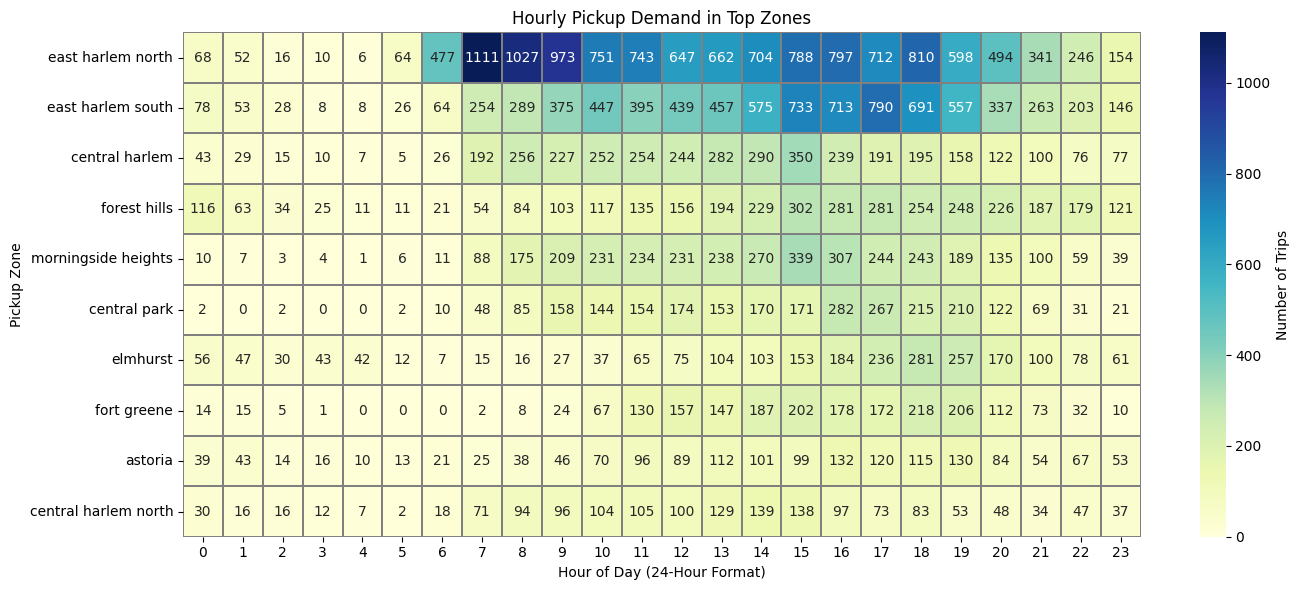

In [216]:
# HEAT MAP OF HOURLY PICKUP DEMAND IN TOP PICKUP ZONES

# Get top 10 pickup zones
top_zones = df['Zone_pickup'].value_counts().head(10).index

# Filter data for only those zones
df_top_zones = df[df['Zone_pickup'].isin(top_zones)].copy()

# Extract hour from datetime
df_top_zones['hour'] = df_top_zones['lpep_pickup_datetime'].dt.hour

# Group by zone and hour
zone_hourly = df_top_zones.groupby(['Zone_pickup', 'hour']).size().reset_index(name='trip_count')

# Pivot to create matrix for heatmap
heatmap_data = zone_hourly.pivot(index='Zone_pickup', columns='hour', values='trip_count').fillna(0)

# Sort zones by total trip count
heatmap_data = heatmap_data.loc[heatmap_data.sum(axis=1).sort_values(ascending=False).index]

# Plot heatmap with annotations and legend label
plt.figure(figsize=(14, 6))
sns.heatmap(
    heatmap_data,
    cmap='YlGnBu',
    linewidths=0.3,
    linecolor='gray',
    annot=True,
    fmt='.0f',  # no decimals
    cbar_kws={'label': 'Number of Trips'}  # legend label
)

plt.title('Hourly Pickup Demand in Top Zones')
plt.xlabel('Hour of Day (24-Hour Format)')
plt.ylabel('Pickup Zone')
plt.tight_layout()
plt.show()

####    <u>**Insights into Hourly Pickup Demand in Top Zones**</u>

The heatmap above reveals distinct **temporal demand signatures** across NYC’s most active pickup zones. These patterns reflect not only commuting cycles but also local land use, mobility needs, and neighborhood function. Key observations are summarized below:  
<br>

1. **East Harlem North: Dominant Morning Activity Zone**
    - This zone exhibits the **highest hourly pickup volume across all neighborhoods**, peaking at **1,111 trips at 7:00 AM**.
    - Maintains **above 600 trips/hour from 7:00 AM to 6:00 PM**, showing **strong and sustained commuter-driven demand** throughout the day.
    - Suggests East Harlem North is a **critical origin point for morning travel**, warranting **early-shift fleet concentration** and **high vehicle availability in the early hours**.  
<br>
2. **East Harlem South: Afternoon Surge Zone**
    - Reaches a distinct **afternoon peak of 790 trips at 5:00 PM**, with **above 700 trips/hour consistently from 3:00 PM to 5:00 PM**.
    - Activity ramps up mid-morning and holds strong until evening (**10:00 AM–6:00 PM**), suggesting a **late-shift and return-trip hotspot**.
    - Indicates demand linked to **non-traditional commuting**, **personal trips**, or **school/health-related travel**, supporting the need for **afternoon-focused dispatching**.  
<br>
3. **Midday Zones: Central Harlem, Forest Hills, Morningside Heights**  
    These three neighborhoods show **broad and sustained demand centered around mid-afternoon**, differing from conventional work commute patterns:
    - **Central Harlem:** Peaks at **350 trips (3:00 PM)**, stays **above 200/hour from 8:00 AM to 4:00 PM**.
    - **Forest Hills:** Peaks at **302 trips at 3:00 PM**, with **steady flow from 11:00 AM to 6:00 PM**.
    - **Morningside Heights:** Peaks at **339 trips at 3:00 PM**, with **over 200/hour from 9:00 AM to 6:00 PM**.
    - These neighborhoods are **ideal for flexible midday shifts** and could benefit from **dynamic routing** and **short-haul ride coverage** strategies.  
<br>
4. **Secondary Zones with Concentrated Peaks**  
    Zones like **Elmhurst**, **Central Park**, **Fort Greene**, **Astoria**, and **Central Harlem North** show moderate activity with **short, localized surges**:
    - **Elmhurst:** Peaks at **281 trips at 6:00 PM**, reflecting **evening-focused travel**, possibly related to shopping or dining.
    - **Central Park:** Peaks at **282 trips at 4:00 PM**, driven likely by **tourism, recreation, and local attractions**.
    - **Fort Greene:** Peaks at **218 trips at 6:00 PM**, the lowest among top zones but shows **consistency from noon onward**.
    - **Astoria** and **Central Harlem North** reach **132 and 139 trips/hour**, respectively, with demand centered between **1:00 PM and 6:00 PM**.
    - These areas warrant **targeted late-shift coverage**, but do not require the same vehicle density as core zones.  
<br>
5. **Low Overnight Demand Across All Zones**
    - Between **12:00 AM and 5:00 AM**, hourly pickups remain **below 100 trips/hour** across all 10 top zones.
    - **Demand rises sharply after 6:00 AM**, marking the beginning of the **urban mobility cycle**.
    - Suggests **minimal overnight deployment is sufficient**, but **pre-dawn vehicle positioning is critical** in preparation for the morning surge.  

<br>


####    <u>**Strategic Recommendations**</u>

The **strategic recommendations** below are informed by the **analysis of hourly pickup demand across the top-performing zones** conducted earlier. The main recommendations are summarized as follows:  
<br>

1. **Prioritize East Harlem North for Early-Morning Deployment**  
    - East Harlem North reaches the highest citywide peak (**1,111 pickups at 7:00 AM**) and sustains **over 600 trips per hour through 6:00 PM**.  
    - Start shifts early and ensure **high vehicle availability during the morning hours** to serve strong commuter-driven demand.  
<br>
2. **Expand Afternoon Fleet Coverage in East Harlem South**  
    - With a sharp afternoon peak (**790 pickups at 5:00 PM**) and steady demand from **10:00 AM to 6:00 PM**, East Harlem South is a key late-shift zone.  
    - It is well-suited for **afternoon-focused dispatching**, particularly to serve **return trips, school-related travel, and non-traditional commuting**.  
<br>
3. **Deploy Flexible Midday Shifts in Central Harlem, Forest Hills, and Morningside Heights**  
    - These zones show broad mid-afternoon demand (**peaking around 3:00 PM**) and sustained volume from **late morning to early evening**.  
    - They are ideal for **midday shifts and mobile fleet coverage**, using **dynamic repositioning and short-trip optimization strategies**.  
<br>
4. **Use Secondary Zones to Balance and Smooth Coverage**  
    - Moderate-demand areas like **Elmhurst, Central Park, Fort Greene, Astoria**, and **Central Harlem North** exhibit **localized but time-specific surges**, mostly between **4:00 PM and 6:00 PM**.  
    - These areas are best used for **overflow coverage and strategic fleet rotation**, without requiring the same vehicle density as primary hotspots.  
<br>
5. **Limit Overnight Operations and Focus on Pre-Dawn Positioning**  
    - With low demand across all zones from **12:00 AM to 5:00 AM**, late-night operations offer limited returns. However, **demand begins rising sharply after 6:00 AM**, especially in East Harlem North.  
    - **Minimize overnight fleet presence**, but ensure **vehicles are positioned in key morning-demand zones before 6:00 AM** to capture the early surge.  
<br>
6. **Adjust Fleet Schedules to Zone-Level Patterns**  
    - Avoid uniform citywide scheduling. Instead, **adjust dispatching windows based on each zone’s hourly demand profile** to maximize efficiency, reduce idle time, and better align vehicle availability with local trip patterns.  

<br>

---


#### **c. Weekday vs. Weekend Demand in Top Zones**

This analysis uses a **grouped bar chart** to compare **pickup demand in the top 10 zones** between **weekdays and weekends**. For each zone, two bars represent the number of trips on weekdays versus weekends. This visualization helps highlight how trip activity shifts across different parts of the city depending on the day type. Understanding these patterns is valuable for **adapting fleet availability**, **tailoring services to rider behavior**, and **optimizing operations based on time-sensitive demand**.

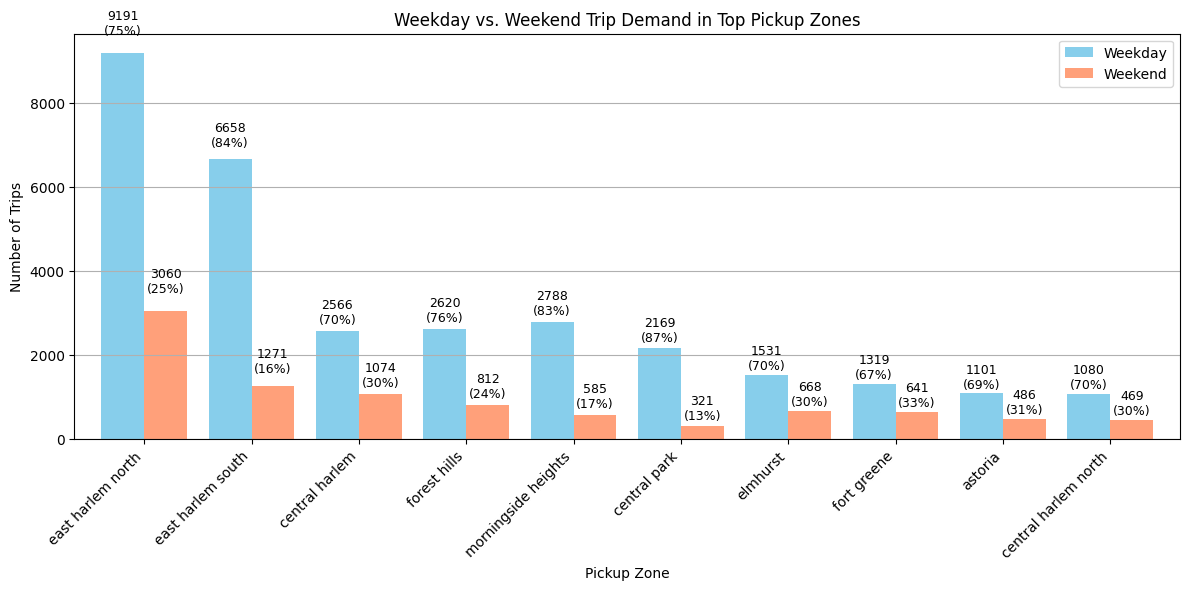

In [217]:
# BAR CHART OF WEEKDAY VS WEEKEND DEMAND IN TOP PICKUP ZONES

# Create 'week_part' column
df['week_part'] = np.where(df['lpep_pickup_datetime'].dt.dayofweek < 5, 'Weekday', 'Weekend')

# Get top 10 pickup zones overall
top_zones = df['Zone_pickup'].value_counts().head(10).index

# Filter only top zones
df_top_zones = df[df['Zone_pickup'].isin(top_zones)].copy()

# Group by zone and week_part
zone_weekpart = df_top_zones.groupby(['Zone_pickup', 'week_part']).size().reset_index(name='trip_count')

# Pivot for plotting
pivot_data = zone_weekpart.pivot(index='Zone_pickup', columns='week_part', values='trip_count').fillna(0)
pivot_data = pivot_data.reindex(top_zones)

# Plot with wider bars
bar_width = 0.8
ax = pivot_data.plot(
    kind='bar',
    figsize=(12, 6),
    width=bar_width,
    color=['skyblue', 'lightsalmon'],
    legend=False
)

# Add values and percentages above bars
n_bars = len(['Weekday', 'Weekend'])
bar_spacing = bar_width / n_bars

for i, zone in enumerate(pivot_data.index):
    total = pivot_data.loc[zone].sum()
    for j, part in enumerate(['Weekday', 'Weekend']):
        count = pivot_data.loc[zone, part]
        percent = count / total * 100 if total != 0 else 0

        # Compute x position for each individual bar within the group
        x = i - bar_width/2 + j * bar_spacing + bar_spacing/2

        ax.text(
            x,
            count + total * 0.03,
            f"{int(count)}\n({percent:.0f}%)",
            ha='center',
            va='bottom',
            fontsize=9
        )

plt.title('Weekday vs. Weekend Trip Demand in Top Pickup Zones')
plt.xlabel('Pickup Zone')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.legend(['Weekday', 'Weekend'])
plt.tight_layout()
plt.show()

####    <u>**Insights on Weekday vs. Weekend Demand in Top Zones**</u>

The bar chart illustrates how trip demand differs between **weekdays and weekends across the top 10 green taxi pickup zones in NYC**. Below is a summary of insights and analysis:  
<br>
1. **Weekday demand consistently surpasses weekend demand across all top zones**

    - This pattern reflects the structured nature of **weekday urban life**, where **commuting, work, school**, and **appointments** drive transportation needs.
    - Green taxis likely serve as an alternative or supplement to public transportation, particularly for **short-to-medium distance trips** or **during peak hours**, when subways or buses may be overcrowded, delayed, or less convenient.
    - The uniform weekday dominance suggests that green taxis play a key role in supporting **essential weekday mobility**, especially for riders who may not have access to private vehicles or who require **more flexible and time-efficient travel options** than mass transit provides.
    - In contrast, **weekend demand is lower** as commuting-related needs decline and residents may engage in more **localized, leisurely, or planned travel**, often with greater flexibility in mode and timing, reducing the urgency or necessity of taking taxis. Additionally, weekend travelers may prefer alternatives such as **walking, biking, or using personal vehicles**, especially for group or recreational outings.  
<br>
2. **East Harlem North and South are the busiest pickup zones overall**

    - **East Harlem North** recorded the highest number of trips (**12,251**), with **75%** occurring on weekdays.
    - **East Harlem South** followed closely, with **7,929 trips** and **84%** of trips on weekdays, indicating a strong weekday preference.
    - These neighborhoods are known to be **dense and primarily residential**, with a large population relying on public transit and other accessible modes of transportation. East Harlem has a high proportion of apartment buildings, public housing, and working-class residents. 
    - The strong weekday demand suggests that local residents depend on green taxis for **routine weekday mobility needs**, such as commuting to work, accessing medical services, or transporting children to school, particularly in areas where **direct transit options may be limited or indirect**.  
<br>
3. **Central Park and Morningside Heights show the strongest weekday concentration**

    - **Central Park** recorded the highest weekday share among all top pickup zones, with **87% of trips** occurring on weekdays.
    - **Morningside Heights** followed closely with **83%** of trips on weekdays, a pattern strongly influenced by the presence of **Columbia University**, along with other nearby institutions such as **Barnard College** and **Teachers College**.
    - The high weekday demand suggests that green taxis are frequently used by **students, faculty, staff**, and **visitors** commuting to classes, meetings, or academic events, activities that predominantly take place during the week.
    - The steep decline in weekend trips may reflect the **reduced campus activity**, along with limited administrative operations and **fewer visitors during weekends.**
    - In the case of **Central Park**, despite its recreational nature, the high weekday taxi demand could stem from **tourists, local workers, or service personnel** traveling to nearby midtown offices, cultural sites, and hospitality venues concentrated around the park’s southern end.  
<br>
4. **Fort Greene and Astoria show the most balanced weekday-weekend demand**

    - **Fort Greene (67% weekday)** and **Astoria (69% weekday)** show the smallest gap between weekday and weekend trips among the top pickup zones.
    - These neighborhoods are known for their **vibrant residential communities** and **active social scenes**, which likely lead to more **mixed-purpose travel**.
    - **Fort Greene, located in Brooklyn**, is home to the **Brooklyn Academy of Music (BAM)**, numerous restaurants, and cultural venues, making it a hotspot for both weekday errands and **weekend entertainment**.
    - **Astoria, in Queens**, is similarly known for its **restaurants, nightlife on Steinway Street**, and attractions like the **Museum of the Moving Image** and **Astoria Park**, which host **community events and leisure activities**.
    - The relatively balanced distribution suggests that green taxis in these areas are used not only for **weekday commuting**, but also for **leisure, social, and family-related weekend outings**, reflecting a broader, more flexible pattern of use.  
<br>
5. **Forest Hills, Central Harlem, and Elmhurst show moderate weekday preference**

    - These zones show weekday shares between **70% and 76%**, indicating a clear weekday skew, but less extreme than Central Park or East Harlem South.
    - **Forest Hills** and **Elmhurst**, located in Queens, serve as **transit-connected residential hubs**.
    - **Central Harlem’s** weekday trips may be tied to **jobs, services**, and **local institutions**, while weekend demand may reflect **shopping or community-based travel**.
    - These patterns suggest a **blend of weekday commuting with moderate weekend activity**.  

<br>

<small>***Sources:***  
    [NYU Furman Center: East Harlem Profile](https://furmancenter.org/neighborhoods/view/east-harlem)



####    <u>**Strategic Recommendations**</u>

Based on the analysis of weekday vs. weekend trip demand across the top green taxi pickup zones, the following recommendations are proposed to improve fleet efficiency, customer service, and revenue performance:

1. **Increase weekday fleet presence in high-demand commuter zones**
    - Prioritize fleet allocation in zones like **East Harlem**, **Central Park**, and **Morningside Heights**, where weekday demand is the highest.
    - Focus especially during **morning and evening peak hours** when commuters, students, and workers rely on green taxis.
    - Ensure consistent availability to meet essential mobility needs and reduce wait times.  
<br>
2. **Ensure weekend taxi availability in mixed-use neighborhoods**
    - Maintain or slightly increase weekend coverage in zones like **Astoria** and **Fort Greene**, where weekend demand is relatively strong due to **leisure, nightlife, and local events**.
    - Encourage drivers to operate in these neighborhoods during **Friday evenings through Sundays**, when leisure activity peaks.  
<br>
3. **Support transit-limited residential zones with reliable weekday service**
    - Maintain strong weekday service in areas such as **East Harlem**, **Forest Hills**, and **Elmhurst**, which may have limited or indirect subway connections.
    - These neighborhoods contain **working-class and transit-dependent populations** who rely on green taxis for **daily activities like commuting, medical visits, and school transportation**.

<br>

---



###    <u>**Summary of Trip Demand by Location Analysis**</u>

This section presents a **summary** of key findings from the **analysis of taxi trip demand** across different boroughs and zones in New York City, highlighting **spatial patterns** and operational implications.  
<br>

1. **Manhattan as the Taxi Core**  
    **Manhattan** dominates green taxi pickups, accounting for **over 60% of all trips**. This reflects its **dense population**, **tourist attractions**, and **limited parking**, making it the **backbone of NYC’s taxi network**. **6 of the top 10 pickup zones** are also in Manhattan, showing **deep and consistent demand** beyond downtown.  
<br>
2. **East Harlem Leads in Zone-Level Demand**  
    **East Harlem North and South** together contribute **over one-third of all trips**, with **strong weekday activity** and **distinct morning and afternoon peaks**. These zones require **sustained fleet presence** and **time-specific dispatch strategies**.  
<br>
3. **Queens and Brooklyn Show Strategic Growth Areas**  
    **Queens** ranks second by borough due to **airport proximity** and **mixed land use**. Zones like **Forest Hills** and **Elmhurst** show **strong midday demand**, ideal for **rotation-based scheduling**. **Brooklyn**, led by **Fort Greene**, offers **localized demand pockets** suited for **dynamic, event-aware deployment**.  
<br>
4. **Bronx and Staten Island Have Minimal Demand**  
    Both boroughs contribute **less than 2% of total trips**, suggesting major **service gaps** due to **low demand**, **driver avoidance**, or **physical isolation**. These areas are **not primary targets** for taxi operations.  
<br>
5. **Temporal Trends Guide Scheduling**  
    **Peak demand** across zones typically falls between **7:00 AM and 6:00 PM**, with **East Harlem North peaking at 7:00 AM** and **East Harlem South at 5:00 PM**. Other zones like **Morningside Heights** and **Forest Hills** show **strong midday patterns**, while all zones exhibit **low overnight demand**.  
<br>
6. **Weekdays Dominate Across All Zones**  
    **Trip volume is consistently higher on weekdays**, with zones like **Central Park** and **Morningside Heights** showing **over 80% of trips during the week**. This reflects **commuting**, **school**, and **institutional travel patterns**. In contrast, **Fort Greene** and **Astoria** show more **balanced demand**, driven by both **weekday routines** and **weekend leisure activities**.  


<br>


###    <u>**Strategic Recommendation Summary of Trip Demand by Location Analysis**</u>

This section outlines **strategic recommendations** informed by the **analysis of trip demand patterns by pickup location**, highlighting key areas for targeted operational improvements.  
<br>

1. **Concentrate Operations in Manhattan, Especially East Harlem**
    - Manhattan drives over **60% of trips**, with **East Harlem North/South** alone generating over **one-third of all pickups**.
    - Implement **hyperlocal saturation**, **micro-hub models**, and **peak-hour targeting** in **Harlem**, **Central Park**, and other high-density zones.
    - Tailor planning to **zone-level demand**, not just borough-wide aggregates.  
<br>
2. **Design Time-Sensitive Deployment by Zone**
    - **East Harlem North**: Prioritize **early-morning shifts** to capture the city’s highest 7:00 AM demand.
    - **East Harlem South**: Expand **late-afternoon coverage**, focusing on **school and return trips**.
    - **Morningside Heights, Forest Hills, Central Harlem**: Implement **flexible midday shifts** with **short-trip optimization**.
    - Use **predictive scheduling** to match fleet availability with each zone's **hourly demand profile**.  
<br>
3. **Adopt a Tiered Coverage Model for Borough-Wide Strategy**
    - **Tier 1 (Continuous Coverage)**: East Harlem and other high-density zones.
    - **Tier 2 (Rotational Deployment)**: Forest Hills, Fort Greene, Astoria — zones with steady but not constant demand.
    - **Tier 3 (On-Demand Only)**: The Bronx and Staten Island, contributing less than **2% of trips**.  
<br>
4. **Align Weekday vs. Weekend Operations by Zone Type**
    - **Weekdays**: Maximize coverage in **commuter-heavy zones** like East Harlem and Central Park, especially during peak travel hours.
    - **Weekends**: Focus on **mixed-use and leisure-heavy neighborhoods** like Astoria and Fort Greene with stable weekend traffic.
    - Ensure flexibility to adapt to **event-driven demand surges** and community activity patterns.  
<br>
5. **Target Queens with Airport-Focused and Zone-Specific Rotation**
    - Queens contributes **25% of total pickups**, especially near **Forest Hills, Elmhurst, and Astoria**.
    - Use **airport-ready vehicles**, **midday dispatching**, and **zone rotation strategies** to handle travel corridors and transit gaps effectively.  
<br>
6. **Use Secondary Zones to Balance Fleet Load**
    - Zones like **Elmhurst, Central Park, Fort Greene, Astoria**, and **Central Harlem North** serve well as **overflow areas** during evening demand peaks (4–6 PM).
    - Deploy dynamic routing and **real-time repositioning** rather than maintaining constant fleet presence.  
<br>
7. **Reduce Overnight Operations; Focus on Morning Positioning**
    - Demand between **12:00 AM–5:00 AM** is consistently low across all zones.
    - Limit late-night coverage but ensure **vehicle positioning by 6:00 AM** in early-morning hotspots (e.g., East Harlem North).  

<br>

---

<a id="basic"></a>
### **III.3 Fare-Related Factors Analysis**

**Fare-related factors analysis** focuses on understanding how key variables, specifically **trip distance** and **duration**, influence the **total fare** of a trip. This includes examining the **correlation** between these elements and conducting a **hypothesis test** to assess the **impact of trip distance on fare**. This analysis is valuable for **operators** to optimize pricing and revenue strategies, **drivers** to understand earnings based on trip characteristics, and **policymakers** to ensure fair, transparent and equitable fare regulations.  
<br>

#### **a. Correlation Between Trip Distance, Duration, and Fare**

Understanding the **correlation between trip distance, duration, and fare amount** is essential for uncovering the key drivers of revenue in taxi operations. Since NYC taxi pricing includes both **per-mile and per-minute components**, analyzing how both **distance** and **duration** relate to fare provides a more accurate and comprehensive understanding of fare patterns. This correlation analysis helps determine whether fare amounts are more strongly influenced by how far a passenger travels, how long the trip takes, or a combination of both. The insights gained are valuable for building better **fare prediction models**, improving **operational efficiency**, and guiding **resource allocation** during high-demand periods.

To explore these relationships, a **correlation heatmap** is used to quantify the strength and direction of linear relationships, while **scatterplots** help visualize patterns and assess potential non-linear effects. Together, these tools provide a solid foundation for identifying which variables contribute most to fare outcomes and for supporting data-driven decision-making.

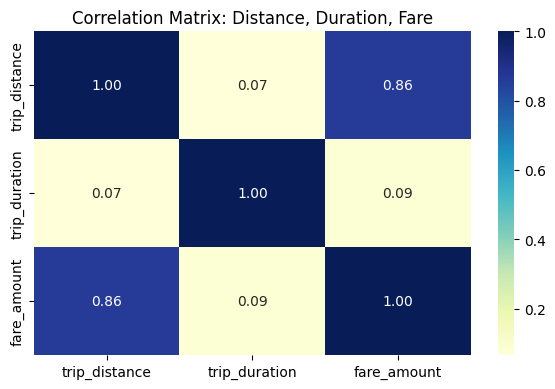

In [218]:
# HEATMAP OF CORRELATIONS BETWEEN TRIP DISTANCE, DURATION, AND FARE

# Create trip duration in minutes
df['trip_duration'] = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).dt.total_seconds() / 60

# Select relevant columns
cols = ['trip_distance', 'trip_duration', 'fare_amount']

# Correlation matrix
corr_matrix = df[cols].corr()

# Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Correlation Matrix: Distance, Duration, Fare')
plt.tight_layout()
plt.show()


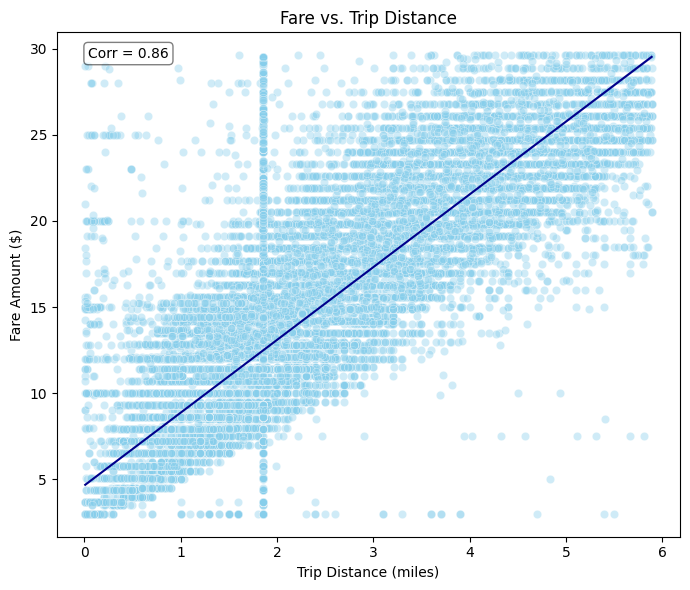

In [219]:
# SCATTER PLOT BETWEEN TRIP DISTANCE AND FARE

# Plot Distance vs Fare
plt.figure(figsize=(7, 6))
sns.scatterplot(data=df, x='trip_distance', y='fare_amount', alpha=0.4, color='skyblue')
sns.regplot(data=df, x='trip_distance', y='fare_amount', scatter=False, color='darkblue', line_kws={"linewidth":1.5})
plt.title('Fare vs. Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')

# Show correlation
corr1 = df[['trip_distance', 'fare_amount']].corr().iloc[0, 1]
plt.text(0.05, 0.95, f"Corr = {corr1:.2f}", transform=plt.gca().transAxes, fontsize=10, bbox=dict(boxstyle="round", facecolor="white", alpha=0.5))

plt.tight_layout()
plt.show()

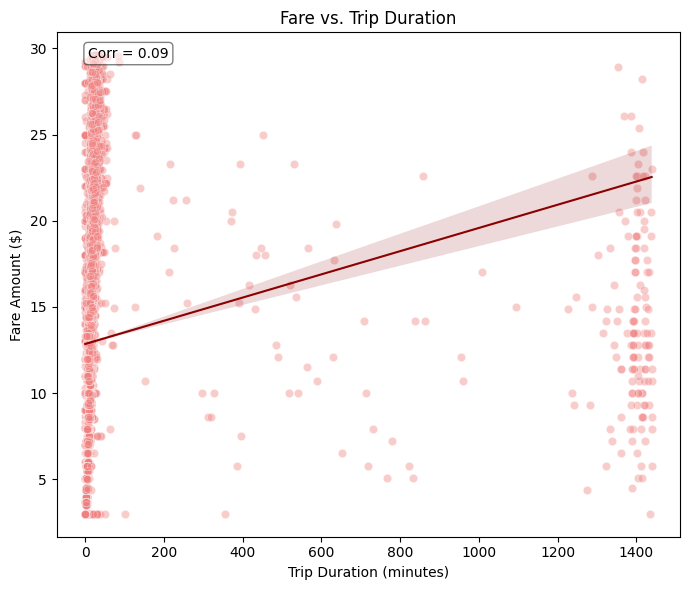

In [220]:
# SCATTER PLOT BETWEEN TRIP DURATION AND FARE

# Plot Duration vs Fare
plt.figure(figsize=(7, 6))
sns.scatterplot(data=df, x='trip_duration', y='fare_amount', alpha=0.4, color='lightcoral')
sns.regplot(data=df, x='trip_duration', y='fare_amount', scatter=False, color='darkred', line_kws={"linewidth":1.5})
plt.title('Fare vs. Trip Duration')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')

# Show correlation
corr2 = df[['trip_duration', 'fare_amount']].corr().iloc[0, 1]
plt.text(0.05, 0.95, f"Corr = {corr2:.2f}", transform=plt.gca().transAxes, fontsize=10, bbox=dict(boxstyle="round", facecolor="white", alpha=0.5))

plt.tight_layout()
plt.show()

####    <u>**Insights on the Correlation Between Trip Distance, Duration, and Fare**</u>

This analysis explores how trip distance and trip duration influence the fare amount in NYC green taxi trips. The insights are supported by a correlation heatmap and scatter plots with regression lines to illustrate the relationships.  
<br>
1. **Strong Positive Correlation Between Trip Distance and Fare (Corr = 0.86)**

    - The correlation coefficient of **0.86** between `trip_distance` and `fare_amount` indicates a **very strong positive linear relationship**. This means that as the trip distance increases, the fare amount increases in a **highly consistent and predictable way**.

    - The scatter plot confirms this relationship with a **clear upward trend**, where most data points are tightly clustered around the regression line. This reflects a **reliable pricing structure**, where longer trips consistently result in higher fares.

    - This pattern aligns closely with the **NYC TLC official fare structure**, where **distance is the primary driver** of fare calculation. The pricing model includes:
        - **$3.00** initial charge  
        - **$0.70 per 1/5 mile** when traveling above 12 mph 
        - or **$0.70 per 60 seconds** only when the vehicle is stopped or moving slowly in traffic   
   
    - The **distance-based charge applies consistently and universally** throughout the trip, as most taxi journeys involve continuous forward movement. In contrast, time-based charges are **conditional**, triggered only during periods of idling or heavy traffic congestion. This structural emphasis ensures that **trip distance contributes more reliably and significantly** to the total fare than duration does.

    - While time-based fees are part of the fare structure, they occur only under specific circumstances. On the other hand, **distance-based billing is applied uniformly across most trips**, regardless of traffic or delays. As a result, `trip_distance` emerges as a **more stable, predictable, and dominant variable** than `trip_duration`, which is subject to fluctuation. The strong correlation between distance and fare is therefore not just intuitive, but a **direct reflection of the TLC's policy design**.  
<br>
2. **Very Weak Correlation Between Trip Duration and Fare (Corr = 0.09)**

    - The correlation between `trip_duration` and `fare_amount` is extremely weak, with a coefficient of **just 0.09**. This indicates that longer trip durations do **not consistently result in higher fares**.

    - The scatter plot reinforces this conclusion, with **data points appearing widely scattered** and showing **no clear trend or directional pattern**. There is **no strong linear relationship** between how long a trip takes and how much it costs.

    - This weak association stems directly from the **NYC TLC fare structure**, which charges primarily based on **distance traveled**, not time. Duration-based charges are only applied **in limited cases**, specifically when the taxi is traveling **below 12 mph**, idling, or stuck in traffic, and even then at a rate of **$0.70 per 60 seconds**.

    - In contrast, for most of the trip, especially when the vehicle is in motion, **no time-based charges apply**, meaning the total fare remains **largely unaffected** by how long the ride takes. For example, a 10-minute trip in flowing traffic and a 20-minute trip stuck in congestion over the same distance may yield similar fares.

    - As a result, **trip duration is not a reliable predictor of fare**. The pricing structure does not account for delays, stoplights, or heavy congestion in a way that significantly impacts total fare unless idling is excessive.

    - The **weak relationship** between **trip duration** and **fare** has several **operational and strategic consequences**. From a **fare modeling and forecasting** perspective, incorporating `trip_duration` adds **unnecessary variability** and **reduces predictive accuracy**, making `trip_distance` the more **reliable feature**. For **drivers**, **extended periods in traffic** do not result in **proportionally higher fares**, which can reduce both **efficiency** and **earnings**, especially during **congested hours**. This imbalance suggests an opportunity for **policy-makers** to **re-evaluate the fare structure**, particularly if the goal is to **fairly compensate idle time** or **incentivize drivers** operating in **high-traffic zones** during **peak periods**.  
<br>
3. **Minimal Correlation Between Trip Distance and Duration (Corr = 0.07)**

    - The correlation between `trip_distance` and `trip_duration` is **extremely low (0.07)**, indicating **almost no linear relationship** between how far a trip goes and how long it takes. In other words, **a longer trip does not reliably mean a longer duration**, and vice versa.

    - This seemingly counterintuitive result makes **perfect sense** within the context of NYC’s traffic environment. The city is known for **frequent congestion, stop-and-go traffic, one-way streets, traffic signals, and pedestrian activity**, all of which can significantly slow down vehicle movement even over short distances. A 1-mile trip can sometimes take longer than a 5-mile trip taken on a highway or during off-peak hours.  

<br>


#### <u>**Strategic Recommendations**</u>

Based on the correlation insights between **trip distance, duration, and fare**, the following strategic recommendations are proposed to enhance operational efficiency, pricing strategies, and driver performance:  
<br>
 1. **Prioritize Distance-Based Metrics in Fare Forecasting Models**
    - Since `trip_distance` has a **strong and stable relationship** with fare (Corr = 0.86), fare estimation models should **weight distance as the primary input**.
    - Avoid using `trip_duration` as a predictor for fare modeling due to its **weak correlation** (Corr = 0.09), which introduces noise and reduces accuracy.
    - Integrate this insight into **real-time fare prediction systems** or customer-facing fare estimate tools to improve transparency and trust.  
<br>
2. **Invest in Traffic-Aware Dispatch and Routing Systems**
    - The **low correlation (0.07)** between trip distance and duration suggests that **routing based on distance alone is insufficient** in NYC.
    - Implement **real-time traffic and congestion-aware navigation tools** to optimize route choices and reduce unproductive time.
    - Such systems can prioritize routes that minimize **duration inefficiency**, improving both driver earnings and customer satisfaction.

<br>

---


#### **b. Hypothesis Testing: Impact of Trip Distance on Fare**

To move beyond visual observations and correlation metrics, this section presents a **hypothesis test** to determine whether **longer trip distances lead to significantly higher fares**. While correlation provides insight into the strength and direction of relationships, it does not confirm whether the observed differences are **statistically meaningful** or simply due to **random variation**. Therefore, hypothesis testing offers a more **reliable approach** to validate assumptions and detect meaningful patterns in the data.

In this analysis, fare amounts are compared between two groups: **short trips** (with trip distance less than the median) and **long trips** (with trip distance greater than or equal to the median). The objective is to evaluate whether **fares for long trips are statistically greater** than those for short trips, using a **one-tailed hypothesis test** defined as follows:

- This test is structured using the **P.I.C.O.T. framework**:  
    - **P (Population):** NYC Green Taxi trips  
    - **I (Intervention):** Long-distance trips (distance ≥ median)  
    - **C (Comparison):** Short-distance trips (distance < median)  
    - **O (Outcome):** Average total fare  
    - **T (Time):** Per individual trip in January 2023

- **Hypotheses:**  
    - **Null Hypothesis (H₀):** The average fare for long trips of NYC Green Taxi is less than or equal to that of short trips.  
    - **Alternative Hypothesis (H₁):** The average fare for long trips of NYC Green Taxi is greater than that of short trips.  

To conduct this hypothesis test, the analysis will follow these steps:  
1. **Divide the data** into two groups based on the median trip distance (short vs. long trips).
2. **Test for normality** within each group to determine the appropriate statistical test.
3. Based on the distribution results, **select a suitable test**: if data is not normally distributed, use the Mann-Whitney U test as a non-parametric alternative.
4. **Perform the one-tailed hypothesis test** to assess whether long trip fares are significantly higher.
5. **Calculate the effect size** to understand the magnitude of the difference.
6. **Interpret the results** to determine whether the observed difference is both statistically and practically significant.

This approach enables us to validate whether the **fare increase associated with longer trips** is genuine or potentially due to **chance**. If longer trips consistently yield higher fares, the company can **prioritize or optimize long-distance services**, **adjust pricing structures** to align with distance-based value, and **enhance revenue prediction models**. Ultimately, hypothesis testing adds **analytical clarity** to decision-making, transforming **raw data into strategically actionable insights** grounded in **statistical confidence** rather than **assumptions or visual trends**.


In [221]:
# DIVIDE TRIP DISTANCE INTO SHORT AND LONG TRIPS

# Calculate median trip distance
median_distance = df['trip_distance'].median()

# Create two groups
short_fare = df[df['trip_distance'] < median_distance]['fare_amount']
long_fare = df[df['trip_distance'] >= median_distance]['fare_amount']

# Check fare count for short and long trips
print("Number of short trips:", short_fare.shape[0])
print("Number of long trips:", long_fare.shape[0])

Number of short trips: 28142
Number of long trips: 28351


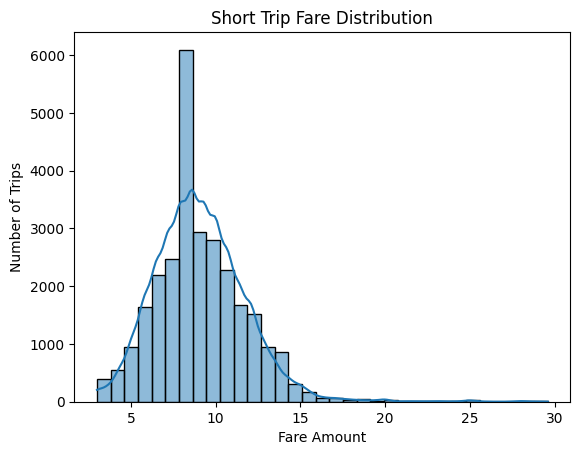

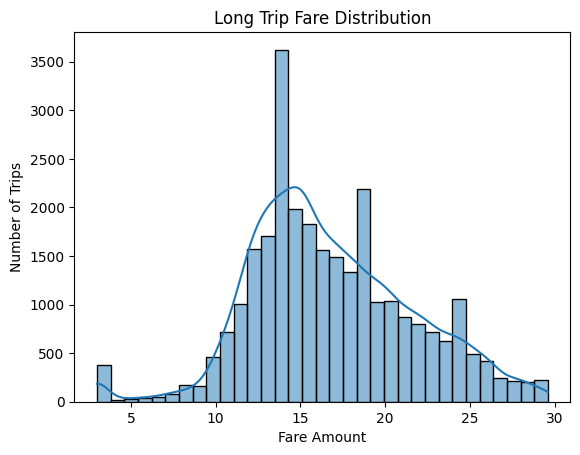

In [222]:
# NORMAL DISTRIBUTION TEST (HISTOGRAM)

# Histogram for short fares
sns.histplot(short_fare, kde=True, binwidth=0.8)
plt.title("Short Trip Fare Distribution")
plt.ylabel("Number of Trips")
plt.xlabel("Fare Amount")
plt.show()

# Histogram for long fares
sns.histplot(long_fare, kde=True, binwidth=0.8)
plt.title("Long Trip Fare Distribution")
plt.ylabel("Number of Trips")
plt.xlabel("Fare Amount")
plt.show()


In [223]:
# NORMAL DISTRIBUTION TEST (KOLOMOGOROV SMIRNOV TEST)

# Normalize each group (z-score standardization)
z_short = (short_fare - short_fare.mean()) / short_fare.std()
z_long = (long_fare - long_fare.mean()) / long_fare.std()

# Apply K-S test
ks_short = kstest(z_short, 'norm')
ks_long = kstest(z_long, 'norm')

# Print results with interpretation
print("Normal Distribution Test (Kolmogorov Smirnov)")
alpha = 0.05
print("\nSignificance Level (α):", alpha)

print("\nK-S Test (Short Trips):")
if ks_short.pvalue > alpha:
    print(f"Short trip fares are normally distributed (p-value: {ks_short.pvalue})")
else:
    print(f"Short trip fares are NOT normally distributed (p-value: {ks_short.pvalue})")

print("\nK-S Test (Long Trips):")
if ks_long.pvalue > alpha:
    print(f"Long trip fares are normally distributed (p-value: {ks_long.pvalue})")
else:
    print(f"Long trip fares are NOT normally distributed (p-value: {ks_long.pvalue})")

Normal Distribution Test (Kolmogorov Smirnov)

Significance Level (α): 0.05

K-S Test (Short Trips):
Short trip fares are NOT normally distributed (p-value: 2.310095396970289e-159)

K-S Test (Long Trips):
Long trip fares are NOT normally distributed (p-value: 9.637812563761736e-174)


In [224]:
# HYPOTHESIS TESTING (MANN-WHITNEY U TEST)
# "Do long trips have higher average fares than short trips?"

# Perform one-tailed Mann-Whitney U Test
u_stat, p_value = mannwhitneyu(long_fare, short_fare, alternative='greater')

print("Hypothesis Testing (Mann-Whitney U Test)")
print(f"U-statistic: {u_stat}")
print(f"p-value: {p_value}")

# Interpretation
alpha = 0.05
print("\nSignificance Level (α):", alpha)

if p_value > alpha:
    print("Conclusion: Fail to reject H₀")
    print("Interpretation: Not statistically significant — We cannot conclude that long trips have higher fares.")
else:
    print("Conclusion: Reject H₀")
    print("Interpretation: Statistically significant — Long trips tend to have higher fares than short trips.")

Hypothesis Testing (Mann-Whitney U Test)
U-statistic: 745544270.0
p-value: 0.0

Significance Level (α): 0.05
Conclusion: Reject H₀
Interpretation: Statistically significant — Long trips tend to have higher fares than short trips.


In [225]:
# EFFECT SIZE TEST (Impact of Fare Differences Between Long and Short Trips)

n1 = len(long_fare)
n2 = len(short_fare)
effect_size = u_stat / (n1 * n2)
print(f"Effect size (U / n1*n2): {effect_size:.4f}")

# Interpretation
if effect_size < 0.3:
    interpretation = "Small effect — The difference in fares is statistically significant but may not be practically meaningful."
elif 0.3 <= effect_size < 0.5:
    interpretation = "Medium effect — The difference in fares is moderately meaningful."
else:
    interpretation = "Large effect — The difference in fares is strong and practically significant."

print("Effect Size Interpretation:", interpretation)


Effect size (U / n1*n2): 0.9344
Effect Size Interpretation: Large effect — The difference in fares is strong and practically significant.


#### <u>**Insights from Hypothesis Testing: Impact of Trip Distance on Fare**</u>

To investigate whether **longer taxi trips in NYC lead to higher fares**, the dataset was divided into two groups using the **median trip distance** as a threshold: **short trips** (distance below the median) and **long trips** (distance equal to or above the median). Although earlier visualizations suggested a **positive relationship between distance and fare**, hypothesis testing provides a more **rigorous and statistically grounded method** to validate this pattern.  
<br>
1. **Justification for Non-Parametric Testing**  
   Before comparing the two groups, the distribution of fare amounts was assessed using the **Kolmogorov–Smirnov (K-S) test**. The results indicated that both short and long trip fare distributions **significantly deviate from normality**, with **extremely low p-values** (**<< 0.05**). These findings confirm that the data are **not normally distributed** and justify the use of a **non-parametric method** for hypothesis testing.  
<br>
2. **Statistical Evidence: Mann–Whitney U Test Results**  
   A **one-tailed Mann–Whitney U test** was conducted to test the hypothesis that **fares for long trips are statistically higher** than those for short trips. The test returned a **U-statistic of 745,544,270.0** and a **p-value close to zero**, leading to the **rejection of the null hypothesis** at the **0.05 significance level**. This result provides **strong statistical evidence** that fare amounts for long trips are **not only different** from those of short trips but **significantly higher**.  
<br>
3. **Practical Significance: Effect Size**  
   Beyond statistical significance, the **effect size was calculated as 0.9344**, which falls into the "**large effect**" category. This indicates that the difference between short and long trip fares is **not only detectable** through statistical testing but also **substantial in practice**. Such a high effect size suggests a **meaningful impact on fare outcomes**, making the result **highly relevant for business operations and strategy**.  
<br>
4. **Longer Trips, Higher Base Fare Revenue**  
    The observed fare increase for long trips aligns with the **core NYC taxi fare structure**, which includes a **base fare**, plus **per-mile** and **per-minute charges**. Even when **excluding surcharges**, longer trips naturally accumulate **higher fares** due to the additive nature of distance and duration pricing.

    Because each mile and minute contributes incrementally, **longer trips consistently generate more revenue**, validating the statistical findings. These trips often represent **purposeful travel behavior** (e.g., commuting, cross-borough travel), making **trip distance a strong and reliable predictor of fare**.

    This finding has clear business value for:
    - **Revenue forecasting** using distance-based models  
    - **Driver strategy optimization** to prioritize longer trips  
    - **Operational planning** around high-yield routes  

    Even under a simplified fare model, **distance alone justifies fare differences**, supporting data-driven decision-making.

<br>

#### <u>**Strategic Recommendations**</u>

The hypothesis testing confirms a **statistically significant** and **practically meaningful** relationship between **trip distance** and **base fare revenue**, even when excluding surcharges. Based on the findings, the following strategic recommendations are proposed:

1. **Inform Dynamic Pricing and Incentive Design**  
   If applying dynamic pricing or driver incentive programs, align them with trip distance insights:  
   - **Promote longer trips during low-demand periods** to increase revenue per ride.  
   - **Design bonuses or rewards** for drivers who complete longer trips to align driver behavior with revenue goals.  
<br>
2. **Strengthen Driver Strategy and Communication**  
   Educate drivers about how **longer trips naturally generate higher fares**, even under a base fare model. Reinforcing this through transparent earnings insights can help drivers make **more strategic route decisions** and improve driver satisfaction.  
<br>
3. **Support Data-Driven Expansion and Marketing**  
   Use the distance-fare relationship to guide **service expansion, marketing campaigns, or promotional targeting**. Focus on corridors or customer segments associated with longer trips (e.g., **airport transfers**, **cross-borough commutes**) to improve **return on investment** and attract **high-value riders**.  

<br>

---

###    <u>**Summary of Fare-Related Factors Analysis**</u>

The following is a **summary of key findings** from the **analysis of fare-related factors**, including how trip distance and duration influence fare amounts in NYC green taxi trips.  
<br>

1. **Trip Distance is the Strongest Predictor of Fare**
    - A **very strong positive correlation (0.86)** exists between trip distance and fare amount, confirming that **longer trips consistently generate higher fares**.
    - This pattern is a direct result of the **NYC TLC fare structure**, which emphasizes **per-mile billing** as the primary pricing mechanism.
    - Visualizations (scatter plot with regression line) support this relationship, showing a tight upward trend and a high level of predictability.  
<br>
2. **Fare Differences Between Short and Long Trips are Statistically and Practically Significant**
    - Hypothesis testing using the **Mann–Whitney U test** confirms that **longer trips have significantly higher fares** than shorter ones (p-value ≈ 0).
    - The **effect size (0.93)** indicates a **substantial and meaningful difference**, validating the strength and business relevance of this relationship.
    - These findings support strategic applications such as **distance-based revenue forecasting** and **driver prioritization of long trips**.  
<br>
3. **Trip Duration Has Minimal Impact on Fare**
    - The correlation between trip duration and fare amount is **very weak (0.09)**, suggesting that **trip length in time does not significantly affect fare**.
    - This is due to time-based charges applying only in **low-speed or idle situations**, unlike distance-based charges which apply **universally and continuously**.
    - As such, **trip duration introduces variability** into fare predictions and is **less reliable** for modeling or operational decision-making.  
<br>
4. **Trip Duration and Distance are Largely Unrelated**
    - The correlation between trip duration and trip distance is **extremely low (0.07)**.
    - In NYC's high-congestion environment, **short trips can take longer** than longer ones due to traffic, signals, and stop-and-go conditions.
    - This highlights the **non-linear and unpredictable nature of duration**, further reinforcing why **distance is a more stable operational metric**.  

<br>


###    <u>**Strategic Recommendation Summary of Fare-Related Factors Analysis**</u>

These are the **strategic recommendations** derived from the **analysis of fare-related factors**, focusing on how trip distance and duration influence fare amounts. The insights aim to support more accurate fare modeling, operational efficiency, and data-driven business strategies.  
<br>

1. **Make Distance the Core Driver in Fare Forecasting Models**  
   - Prioritize trip distance in predictive models due to its **strong correlation with fare (Corr = 0.86)**.  
   - Avoid using trip duration, which has a **weak and unreliable relationship (Corr = 0.09)** with fare.  
   - Enhance **real-time fare estimates and pricing tools** by emphasizing distance for more accurate, transparent pricing.  
<br>
2. **Use Distance Insights to Guide Dynamic Pricing and Driver Incentives**  
   - Design **incentives that reward longer trips**, especially during low-demand hours.  
   - Align dynamic pricing policies with **distance-based revenue potential** to maximize earnings and operational yield.  
<br>
3. **Implement Traffic-Aware Routing for Operational Efficiency**  
   - Due to the **low correlation between distance and duration (Corr = 0.07)**, optimize dispatching with **real-time congestion data**.  
   - Focus on **duration-efficient routing**, not just distance, to improve driver productivity and reduce idle time.  
<br>
4. **Educate Drivers on Fare Mechanics to Boost Strategy and Satisfaction**  
   - Communicate how longer trips **consistently generate higher fares**, even under standard base fare structures.  
   - Empower drivers to make **data-informed decisions** around trip acceptance and route planning.  
<br>
5. **Leverage Insights for High-Value Market Targeting**  
   - Use fare-distance patterns to identify **valuable routes** like **airport runs** or **cross-borough trips**.  
   - Inform **expansion, promotions, and customer acquisition** strategies to target **high-revenue segments**.  

<br>

---

<a id="basic"></a>
### **III.4 Passenger Behavior Analysis**

**Passenger behavior analysis** involves studying how passengers interact with transportation services, including **how many people travel together and how they prefer to pay**. Understanding these patterns helps uncover **why passengers travel the way they do**, revealing both practical needs and behavioral tendencies. 
This section analyzes two core aspects of passenger behavior: **Passenger Count Distribution** and **Payment Method Preferences**. Together, these provide a foundation for understanding usage patterns and designing a more efficient, inclusive, and user-aligned taxi system.

#### **a. Passenger Count Distribution**

This analysis examines **how many passengers typically ride per taxi trip** by evaluating the distribution of passenger counts. A **horizontal bar chart** is used to visualize the number of trips for each passenger count category, ranging from **1 to 6 passengers**. These categories reflect the standardized range recorded in the dataset, as most green taxi trips fall within this range due to vehicle capacity limits and reporting norms.

Limiting the analysis to **1–6 passengers** ensures a focus on valid and operationally relevant trips, excluding any outliers or data entry errors. Understanding how trips are distributed across these categories provides insights into **travel patterns, vehicle utilization, and potential demand for ride-sharing or group services**.


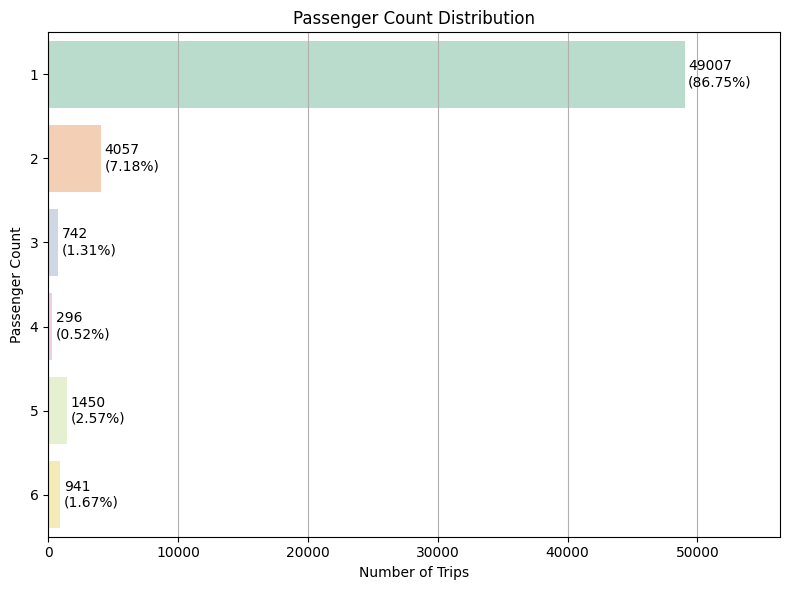

In [226]:
# HORIZONTAL BAR CHART OF PASSENGER COUNT DISTRIBUTION

# Count trips by passenger count
passenger_counts = df['passenger_count'].value_counts().sort_index()
total_passenger_trips = passenger_counts.sum()

# Plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=passenger_counts.values, y=passenger_counts.index.astype(str), palette='Pastel2')

# Annotate bars with count and percentage on two lines
for i, (count, name) in enumerate(zip(passenger_counts.values, passenger_counts.index)):
    percentage = (count / total_passenger_trips) * 100
    label = f'{count}\n({percentage:.2f}%)'
    ax.text(count + total_passenger_trips * 0.005, i, label, va='center', fontsize=10)

plt.xlim(0, passenger_counts.max() * 1.15)
plt.title('Passenger Count Distribution')
plt.xlabel('Number of Trips')
plt.ylabel('Passenger Count')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

####    <u>**Insights into Passenger Count Distribution**</u>

The bar chart above presents the number of trips segmented by the **number of passengers per trip**. Here are the key observations and their implications:  
<br>

1. **Solo Riders Dominate the Market (86.75%)**
    - A striking **86.75%** of all green taxi trips are made by **solo passengers**, signaling a strong behavioral trend in NYC's urban travel. This likely reflects fast, purpose-driven trips, such as commutes or errands, where speed, flexibility, and privacy are prioritized over cost-sharing or social travel.

    - This solo dominance implies that most riders seek **personal control and efficiency**, possibly influenced by time-sensitive routines and the convenience of direct travel. It highlights a preference for private mobility, even in a highly connected city.

    - While individual fares may be lower, the **high trip volume sustains strong revenue**. However, solo riders may be more price-sensitive, requiring careful management of dynamic pricing to avoid deterring frequent users.

    - The data reveals an opportunity to promote **shared rides** through targeted incentives. Even a small shift could contribute to reducing congestion and aligning with green transport goals, making solo travel not just a dominant behavior, but a key lever for system-wide improvements.  
<br>
2. **Low Proportion of Shared Trips**
    - Only **7.18%** of trips include 2 passengers, with even lower rates for 3–6 passengers. This highlights that **multi-passenger or shared trips are uncommon**, despite vehicles being equipped for group travel.

    - The likely reasons are rooted in **urban rider preferences**, where people prioritize speed, privacy, and convenience over cost-sharing. Green taxis may also lack strong ride-pooling incentives or app-based coordination features compared to private mobility apps.

    - This behavior suggests that most taxi use is **functional and individual**, not social or group-oriented. As a result, **larger vehicles are often underutilized**, making a strong case for **smaller, fuel-efficient fleet deployment**.

    - Yet, this also represents an opportunity: with better pricing strategies or pooling features, some solo demand could shift to shared rides, supporting **traffic reduction and sustainability goals**. Shared capacity exists, but rider behavior and system design limit its use.  
<br>
3. **Large Group Trips (5–6 Passengers)**

    - A noticeable number of trips for **5 (2.57%)** and **6 (1.67%)** passengers suggests niche group travel needs:
      - Possibly pre-booked services from hotels, events, or large families
      - These could inform **targeted marketing or service design** for group-friendly transport
  
    - Though uncommon, trips with **5 (2.57%)** and **6 (1.67%)** passengers form a noticeable outlier, especially given the significant drop in trips with 3–4 riders. This suggests a **specific, niche demand for group travel**, likely tied to **pre-planned activities** such as airport transfers, hotel shuttles, event transport, or family outings.

    - These group trips likely involve **longer distances or higher fare potential**, making them strategically important despite their low frequency. They also imply coordination, possibly through **pre-booked services**, scheduled dispatch, or third-party platforms.

<br>


#### <u>**Strategic Recommendations**</u>

Based on the **analysis of passenger count distribution** conducted earlier, the following **strategic recommendations** are summarized as follows:  
<br>

1. **Right-Size the Fleet for Dominant Solo Demand**  
    - With nearly **87% of trips involving solo riders**, the core fleet should prioritize **small, fuel-efficient vehicles** such as hybrids or electric sedans. This enhances cost-efficiency, increases trip turnover, and reduces emissions. 
    - Meanwhile, larger vehicles should be **strategically allocated** to:
        - Tourist zones, airports, and event hubs  
        - Peak times like weekends or holidays  
        - Pre-scheduled services that expect group travel  
    - This segmentation ensures capacity matches real usage patterns without wasting resources.  
<br>
2. **Unlock Ride-Sharing Potential Through Smart Incentives**  
    Despite the dominance of solo trips, the low share of shared rides suggests **untapped potential** for promoting multi-passenger options, particularly during rush hours or in dense zones. Operators could experiment with:
    - **App-based ride-matching algorithms** to group compatible passengers in real time
    - **Discounted pooled fares** or loyalty points to encourage behavioral change
    - **Awareness campaigns** to encourage cultural openness to shared, eco-friendly transport. Even a small shift in this direction could ease congestion and contribute to sustainability goals.  
<br>
3. **Capitalize on Niche Demand for High-Passenger Trips**  
    - Although trips with **5–6 passengers** are rare, they represent a valuable niche, likely tied to hotels, family travel, or airport shuttles. These outliers tend to have **higher fare value per trip**, often covering longer distances.

    - To serve this segment effectively, operators should maintain a **dedicated subset of large-capacity vehicles** (e.g., SUVs, minivans), and design tailored offerings like:
      - Flat-rate group packages
      - Pre-bookable group services via app or concierge channels
      - Partnerships with hotels, venues, or travel services

    - For operational efficiency, the booking platform should prompt passengers to **select their group size in advance**, allowing the system to **automatically match the passenger count with the appropriate vehicle type**. This minimizes vehicle mismatch, reduces wait times, and ensures better fleet utilization.

<br>

---

#### **b. Payment Method Preferences**

This analysis examines how passengers pay for taxi trips using a **bar chart** to show the distribution across six standardized categories:

- **Credit Card**: Digital or app-based payments.
- **Cash**: Physical payments, typically for street-hail trips or users without digital access.
- **No Charge**: Rides provided without fare, possibly due to cancellations or promotions.
- **Dispute**: Trips where the fare was challenged or refunded.
- **Unknown**: Unrecorded or system-missing payment data.
- **Voided Trip**: Trips invalidated or canceled before payment.

Understanding this distribution helps reveal patterns in **digital adoption and passenger preferences**.


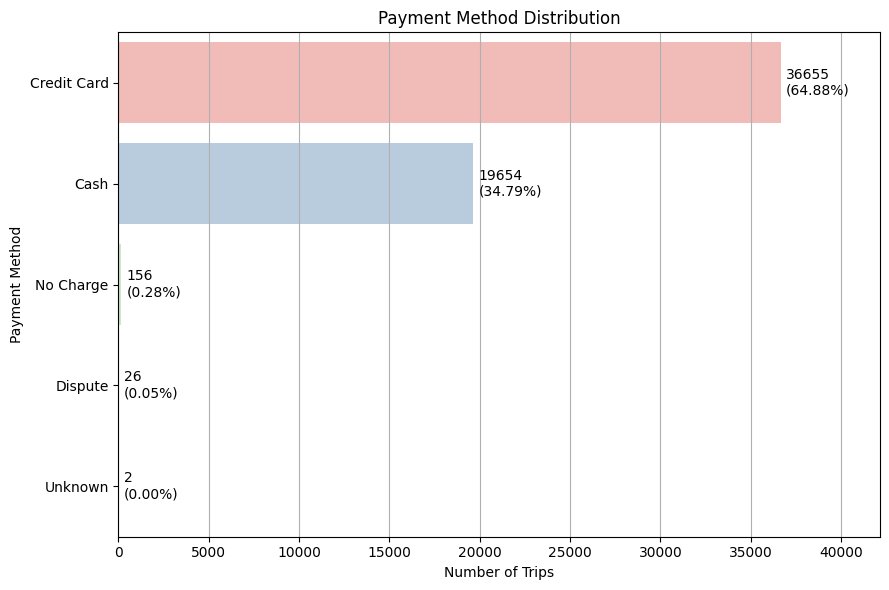

In [227]:
# HORIZONTAL BAR CHART OF PAYMENT METHOD DISTRIBUTION

# Map payment type codes to labels
payment_map = {
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided Trip'
}

df['payment_label'] = df['payment_type'].map(payment_map)

# Count and calculate percentages
payment_counts = df['payment_label'].value_counts()
total_payments = payment_counts.sum()

# Plot
plt.figure(figsize=(9, 6))
ax = sns.barplot(x=payment_counts.values, y=payment_counts.index, palette='Pastel1')

# Annotate bars with count and percentage
for i, (count, label) in enumerate(zip(payment_counts.values, payment_counts.index)):
    percentage = (count / total_payments) * 100
    annotation = f"{count}\n({percentage:.2f}%)"
    ax.text(count + total_payments * 0.005, i, annotation, va='center', fontsize=10)

plt.xlim(0, payment_counts.max() * 1.15)
plt.title('Payment Method Distribution')
plt.xlabel('Number of Trips')
plt.ylabel('Payment Method')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

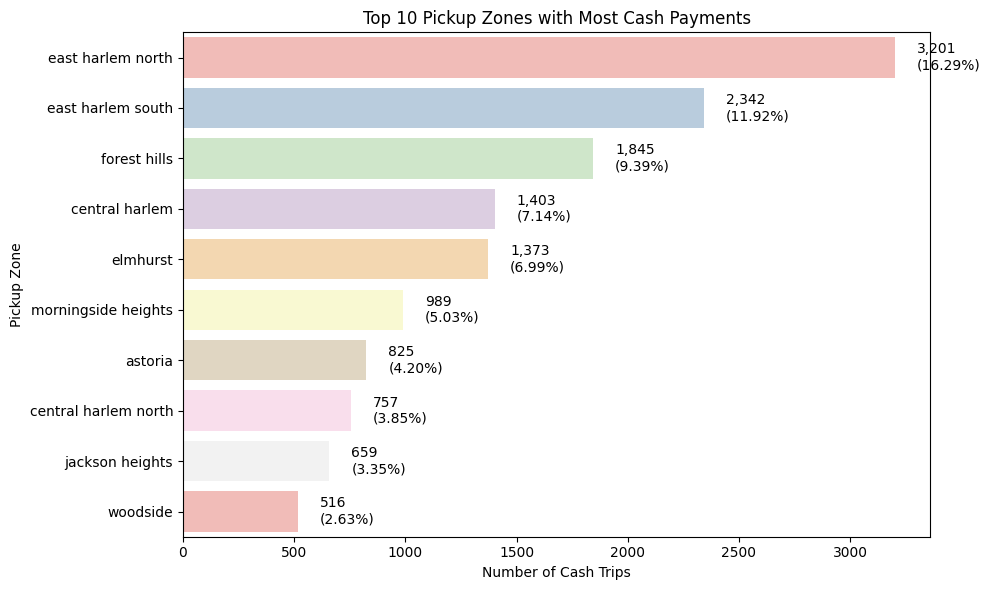

In [228]:
# 10 TOP PICKUP ZONES WITH HIGHEST CASH TRIP VOLUME

# Filter for cash payment (payment_type == 2)
cash_trips = df[df['payment_type'] == 2]

# Group by pickup zone and count
zone_cash_counts = (
    cash_trips.groupby('Zone_pickup')
    .size()
    .reset_index(name='cash_trip_count')
)

# Total cash trips (for percentage)
total_cash_trips = zone_cash_counts['cash_trip_count'].sum()

# Get top 5 zones by cash trip count
top_cash_zones = (
    zone_cash_counts
    .sort_values(by='cash_trip_count', ascending=False)
    .head(10)
    .reset_index(drop=True)
)

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=top_cash_zones,
    x='cash_trip_count',
    y='Zone_pickup',
    palette='Pastel1'
)

# Annotate bars with count and percentage
for i, row in top_cash_zones.iterrows():
    count = row['cash_trip_count']
    percentage = (count / total_cash_trips) * 100
    annotation = f"{count:,}\n({percentage:.2f}%)"
    ax.text(count + total_cash_trips * 0.005, i, annotation, va='center', fontsize=10)

plt.title('Top 10 Pickup Zones with Most Cash Payments')
plt.xlabel('Number of Cash Trips')
plt.ylabel('Pickup Zone')
plt.tight_layout()
plt.show()

####    <u>**Insights into Payment Method Preferences**</u>

The bar chart shows a **clear dominance of card-based payments**, with **64.88%** of trips paid via **credit card**, while **cash payments** account for **34.79%**. Other categories like **No Charge**, **Dispute**, and **Unknown** together make up less than **0.4%**, indicating they are operational exceptions rather than standard behaviors.

1. **Dominance of Credit Card Payments (64.88%)**

    - The overwhelming use of **credit cards** suggests a **digitally engaged rider base** and aligns with trends in **urban mobility tech adoption**.
    - It reflects increased trust in digital transactions, ease of in-app payments, and possibly integrations with e-hail services.
    - For fleet operators, digital payments offer **greater transparency**, **reduced handling risks**, and **faster processing**, benefiting both dispatch and driver revenue tracking.
    - This also aligns with post-pandemic consumer behavior, where **contactless payments** have become the norm for hygiene and convenience reasons.  
<br>
2. **Persistence of Cash Payments (34.79%)**

    - Despite the dominance of digital payments, **cash still accounts for over one-third of all trips**, revealing a **significant segment of passengers** who **don’t use cards or banking apps regularly**, or who simply **prefer to pay with physical cash**.
    - Common among **tourists, older passengers**, or **non-app users**, cash transactions reflect a **continued reliance on traditional street-hail practices**, especially in areas with limited tech adoption. This highlights the importance of maintaining **inclusive payment systems** to avoid excluding key customer groups.
    - **However, cash payments also present operational challenges:**
        - They introduce **greater security risks** (e.g., theft, fraud) for drivers.
        - There's **no digital trail**, which limits trip-level analytics and complicates **driver performance tracking**, **customer service**, and **dispute resolution**.
        - Cash handling adds **logistical burdens**, including reconciliation delays, deposit errors, and potential for underreporting or revenue leakage.
        - Cash fares typically **exclude tips from the data**, which skews fare analysis and affects financial forecasting or driver incentive assessments.
    - Thus, while cash remains essential for accessibility, its **inherent inefficiencies and risks** make it a strong candidate for **gradual digital transition strategies**, such as offering app discounts, faster e-receipts, or loyalty benefits to cash users who switch.

<br>


#### <u>**Strategic Recommendations**</u>

Based on the **analysis of payment method preferences** carried out earlier, the **strategic recommendations** are summarized below:  
<br>

1. **Maximize Benefits of Digital Dominance**  

    The **strong preference for credit card payments (64.88%)** highlights a tech-savvy rider base and the maturity of digital infrastructure in NYC taxi services. To build on this:
    - **Leverage digital payment data** to enhance customer analytics, personalize services, and optimize driver performance evaluations.
    - Invest in **app-based loyalty programs**, enabling passengers to earn points, get discounts, or access premium features through consistent card usage.
    - Use digital payments as a foundation for **streamlined dispatching, fraud reduction**, and **real-time financial reporting**.
    - Closely monitor the small percentage of “Dispute,” “No Charge,” and “Unknown” categories to detect service failures, minimize revenue leakage, and improve accountability.  
<br>
2. **Encourage Digital Shift Without Excluding Cash Users**  

    Despite modern trends, **cash remains relevant (34.79%)**, particularly for street-hail customers, tourists, or older passengers. A dual approach is recommended:
    - **Retain cash acceptance** to ensure inclusivity, especially in areas with lower smartphone or banking access.
    - Introduce **gentle digital nudges**, such as:
        - **Fare discounts** for app-based payments.
        - **Reward points or perks** for switching to cards.
        - **Faster receipts and better service tracking** with digital payment options.  
    - Offer **clear communication at pickup** (via signage or driver prompts) explaining the benefits of digital payments to cash users.

<br>

---



###    <u>**Summary of Passenger Behaviour Analysis**</u>

The following is a **summary of passenger behavior patterns** based on **passenger count distribution** and **payment method preferences**. These insights reveal key trends in rider habits, service usage, and operational opportunities for optimizing fleet, pricing, and payment systems.  
<br>

1. **Solo Trips Dominate Taxi Usage (86.75%)**
    - The vast majority of trips involve **a single passenger**, reflecting a strong urban preference for **private, fast, and flexible travel**.
    - This behavioral pattern supports a **small-vehicle fleet strategy**, and reveals an opportunity to **promote ride-sharing** with pricing or service incentives.
    - From a revenue standpoint, while solo rides yield lower per-trip fares, **high volume sustains profitability**. However, these riders may be **more price-sensitive**, requiring careful pricing strategies.  
<br>
2. **Low Adoption of Shared Rides**
    - Only **7.18%** of trips involve two passengers, with even fewer for 3–6. This suggests that **multi-passenger travel is rare**, likely due to convenience and privacy preferences.
    - It also points to **underutilization of larger vehicles**, suggesting that **fleet optimization** could prioritize **smaller, fuel-efficient cars**.
    - There's potential to **nudge demand toward shared rides** through product features (e.g., pooling apps), promotions, or sustainability messaging.  
<br>
3. **Niche Demand for Large-Group Trips**
    - A modest share of trips with **5–6 passengers** indicates **specific group-use cases**, such as airport shuttles, family travel, or event bookings.
    - These trips may generate **higher fares per ride**, making them important for **targeted service development** and **marketing strategies**, even if infrequent.  
<br>
4. **Card Payments are the Norm (64.88%)**
    - Credit cards are the **most common payment method**, driven by **urban tech adoption**, contactless convenience, and app integration.
    - Digital transactions improve **data accuracy**, **driver tracking**, and **customer satisfaction**, while also reducing **security and handling risks**.  
<br>
5. **Significant Share of Cash Transactions (34.79%)**
    - A large portion of riders still pay with **cash**, particularly **tourists, older adults, or street-hail users** without access to apps or banking.
    - Cash remains important for **inclusivity**, but presents challenges: **limited data visibility**, **higher risk**, **manual reconciliation**, and **missing tip data**.
    - These limitations suggest a need for **gradual digital transition strategies**, such as:
        - Discounts for app-based payments  
        - Loyalty programs for digital users  
        - Simplified onboarding for cash-preferred customers  


<br>

###    <u>**Strategic Recommendation Summary of Passenger Behaviour Analysis**</u>

This **summary** synthesizes key **strategic recommendations** derived from analyzing **passenger count distribution** and **payment method preferences.**  
<br>

1. **Optimize Fleet Composition Around Solo Rider Dominance**
    - With **nearly 87% of trips involving solo riders**, prioritize **compact, fuel-efficient vehicles** (e.g., hybrids or EVs) to increase turnover and reduce emissions.
    - Deploy **larger vehicles strategically**:
        - In **tourist areas, airports, and event zones**
        - During **weekends, holidays, or scheduled group bookings**
    - This ensures right-sizing of vehicles to actual demand, improving both operational efficiency and rider satisfaction.  
<br>
2. **Promote Ride-Sharing Through Smart Incentive Programs**
    - The **low rate of shared rides** reveals a latent opportunity to promote pooling, especially in high-density zones or during rush hours.  
    - Consider implementing:
        - **App-based ride-matching algorithms**
        - **Discounted fares or loyalty rewards for pooled trips**
        - **Awareness campaigns** promoting sustainable and community-oriented travel
    - A modest increase in ride-sharing adoption could **ease congestion** and support **city-wide sustainability** goals.  
<br>
3. **Support High-Passenger Group Needs with Dedicated Services**
    - While rare, **5–6 passenger trips represent a high-value niche** (e.g., airport transfers, hotel pickups).
    - Maintain a **small, dedicated fleet of large-capacity vehicles** (SUVs, vans) and offer:
        - Flat-rate packages
        - App-based or concierge pre-booking options
        - Partnerships with hotels and venues
    - Enable **pre-trip passenger count input** to improve vehicle-passenger matching and reduce mismatches.  
<br>
4. **Leverage Digital Payments for Operational and Strategic Gains**
    - The **dominance of credit card payments (64.88%)** presents opportunities to:
        - Enhance **customer segmentation and analytics**
        - Drive **loyalty programs and app engagement**
        - Improve **driver performance tracking**, **fraud prevention**, and **financial reporting**
    - Closely monitor “No Charge,” “Dispute,” and “Unknown” categories to maintain transparency and service quality.  
<br>
5. **Encourage Digital Transition While Respecting Cash**
    - With **34.79% of rides still paid in cash**, maintain a **dual payment model** to ensure inclusivity.
    - Promote gradual digital adoption by offering:
        - **Discounts or perks** for card/app payments
        - **Faster e-receipts and improved support** for digital users
    - Educate riders at pickup with **clear signage or driver prompts** about digital benefits.  

<br>


---
<a id="numerical"></a>

## **Chapter IV &nbsp;&nbsp;|&nbsp;&nbsp; CONCLUSION AND RECOMMENDATIONS**

---

<a id="basic"></a>
### **IV.1 Conclusion**

The following conclusions address the project’s objectives, drawing on insights from all analyses conducted throughout this study, including **Trip Demand Over Time**, **Trip Demand by Location**, **Fare-Related Factors**, and **Passenger Behavior**. These findings collectively help answer the key business questions and summarize the main insights gained from the data.  
<br>

1. **Time-Based Demand Patterns**  

   - Demand follows a **highly structured weekday rhythm**, with **Tuesdays consistently showing the highest trip volume**. Peaks on Tuesday occur at **8 AM, 4 PM, and 5 PM**, making it the **top priority day** for maximizing fleet impact.  
   - All weekdays show **clear commuting peaks** during **7–9 AM** and **3–6 PM**, driven by work, school, and after-work activities. Fleet scheduling should be optimized to fully cover these **high-yield windows**, ideally with **incentives or shift concentration**.  
   - **6 PM stands out as the single busiest hour of the day** across all weekdays, requiring **full vehicle availability** and **limited breaks** to capture peak evening demand.  
   - **Overnight hours (12–5 AM)** show minimal activity, with the lowest around **5 AM**, making this window ideal for **vehicle maintenance, driver rest, and repositioning for morning deployment**.  
   - On weekends, demand is **flattened and leisure-driven**, with **soft peaks around 3 PM** and **lower total volume**, especially on **Sundays**, the **lowest-demand day of the week**. Weekend operations should focus on **broad but lower-density coverage**, particularly in **shopping and tourist-heavy areas**.   
<br>
2. **Spatial Demand Concentration**  
   - **Manhattan is the operational backbone**, driving **over 60% of all green taxi pickups**, with especially high volume in **East Harlem North and South**, which together contribute **over one-third of total trips**. These zones require **continuous fleet coverage** and **time-targeted dispatching**, particularly around **7 AM and 5 PM peaks**.  
   - **Queens and Brooklyn are strategic growth corridors**. Queens benefits from **airport access** and **midday residential demand**, while Brooklyn offers **localized hotspots** like **Fort Greene**, ideal for **event-aware, dynamic deployment**.  
   - **Bronx and Staten Island have minimal demand (under 2%)** and can be served using **on-demand or limited fleet models**, as they are **low-priority zones** with **sparse, inconsistent trip volume**.  
<br>
3. **Fare Structure Insights**  
   - **Trip distance is the most reliable predictor of fare amount**, with a **strong correlation of 0.86**, reflecting the NYC TLC’s **distance-based fare model**. This makes it highly effective for **revenue forecasting, pricing strategies, and incentivizing longer trips**.  
   - **Trip duration has minimal influence on fare** (correlation: 0.09), due to charges applying only in **low-speed or idle conditions**. Its variability makes it **unreliable for fare modeling or operational planning**.  
   - **Trip distance and duration are not strongly related** (correlation: 0.07), highlighting the **unpredictable nature of NYC traffic** and reinforcing the focus on **distance-based optimization strategies**.  
<br>
4. **Passenger Behavior Patterns**  
   - A significant **86.75% of trips are solo rides**, indicating a strong preference for **private and flexible travel**. This supports a **small, fuel-efficient fleet model**, while highlighting opportunities to **promote ride-sharing** through **pooling apps, incentives, or sustainability messaging**.  
   - **Multi-passenger trips are rare**, with only **7.18% involving two passengers**, and even fewer for 3–6. This suggests **underutilization of large vehicles**, making them better suited for **targeted deployment** (e.g., airport runs, events).  
   - **Card payments dominate (64.88%)**, offering advantages in **data quality, customer experience, and operational security**. This trend enables **loyalty programs** and **better demand insights**.  
   - A substantial **34.79% of trips are still paid in cash**, especially among **tourists, older adults, or non-app users**. While essential for **service inclusivity**, cash creates **data gaps** and **manual processing challenges**. A **gradual transition to digital payments** is recommended, using **discounts, loyalty rewards, or onboarding support**, balancing modernization with respect for diverse passenger needs.  

<br>

---


<a id="basic"></a>
### **IV.2 Recommendations**

Drawing on insights from the analyses of **Trip Demand Over Time**, **Trip Demand by Location**, **Fare-Related Factors**, and **Passenger Behavior**, the following recommendations aim to address practical challenges in Green Taxi operations. These strategies are intended to support more efficient service planning and day-to-day decision-making.  
<br>

1. **Time-Based Demand Optimization**

   - **Maximize coverage during weekday commuter peaks**, especially **Tuesdays**, and **6–10 AM** and **3–6 PM** on all weekdays, by deploying the full fleet and minimizing driver downtime during these hours.  
   - **Adjust operations to day-specific trends**, such as shift resources to **Friday evening** to capture social traffic, and maintain **moderate coverage on weekends (10 AM–6 PM)** focused on leisure destinations.  
   - **Scale down operations during low-yield periods**, notably **12–5 AM** daily and **Sundays overall**, to reduce idle time and operating costs.  
   - **Use Sundays for non-revenue activities**, such as vehicle maintenance, driver onboarding, or system updates, to prepare for the weekday cycle.  
   - **Apply targeted pricing and rewards**: implement **surge pricing and driver incentives during high-demand windows** (e.g., 5–6 PM), and offer **discounts or loyalty perks during off-peak times** to smooth demand and increase utilization.  
<br>
2. **Location-Based Fleet Strategy**  

   - Focus operations in **Manhattan**, especially **East Harlem**, which consistently generates high demand throughout the day. Use **zone-level deployment plans** that account for time-specific needs (e.g., morning focus in East Harlem North, afternoon in East Harlem South).  
   - Implement a **tiered coverage model**:  
      - **Tier 1 – Continuous Coverage**: High-density zones like East Harlem and Central Park, with steady, all-day demand.  
      - **Tier 2 – Rotational Deployment**: Moderate-demand areas such as Forest Hills, Astoria, and Fort Greene, covered in shifts that align with local activity peaks.  
      - **Tier 3 – On-Demand Only**: Low-demand boroughs like the Bronx and Staten Island, served with limited or responsive coverage.  
   - Adjust fleet availability to each zone’s **hourly demand profile**, especially for commuter peaks in high-traffic neighborhoods.  
   - In **Queens**, use **airport-ready vehicles** and **midday rotation strategies** to cover key zones like Elmhurst and Forest Hills, while relieving pressure from Manhattan during high-demand hours.  
   - Reserve **overflow capacity** for secondary zones such as Central Harlem, Morningside Heights, and Astoria, particularly during **late afternoon peaks**.  
<br>
3. **Fare Modeling and Revenue Strategy**  
   - Prioritize **trip distance** as the main input in fare prediction models, given its strong correlation with fare amount, and avoid relying on duration, which adds variability without predictive value.  
   - Develop **driver incentive programs** that encourage longer-distance trips, especially during off-peak hours when demand is lower.
   - Use **real-time traffic data** to support **duration-efficient routing**, helping drivers avoid congestion and improve trip turnover without compromising fare value.  
   - Focus marketing and service planning on **high-revenue segments** such as **airport transfers** and **cross-borough trips**, where distance-based fare potential is greatest.  
<br>
4. **Passenger Behavior and Service Design**  
   - Align fleet composition with passenger behavior by prioritizing **compact, fuel-efficient vehicles**, as nearly **87% of trips are solo rides**.
   - Promote **ride-sharing adoption** in high-density zones and during peak hours through **app-based pooling features**, **discounts**, and **sustainability messaging**.  
   - Maintain a **dedicated set of large-capacity vehicles** for **high-passenger trips**, especially near **airports, hotels, and event venues**, and support pre-booking options to match vehicle size to group needs.  
   - Leverage the **widespread use of digital payments (65%)** to enhance **customer analytics**, enable **loyalty programs**, and support **operational transparency**.  
   - Encourage digital adoption through **gentle incentives** like discounts and faster receipts, while continuing to support **cash transactions** for inclusivity and accessibility.  

<br>

---

<a id="numerical"></a>

## **REFERENCES**

Carroll, R. M., & Hsieh, J. J. K. (n.d.). *Missing data: A statistical analysis and practical approach*.

Little, R. J. A., & Rubin, D. B. (2019). *Statistical analysis with missing data* (3rd ed.). Wiley.

Nature Communications. (2020). *Handling missing data in machine learning: A review*. https://doi.org/10.1038/s41467-019-10957-0

New York City Taxi and Limousine Commission (TLC). (n.d.). *About TLC*. NYC.gov. Retrieved March 31, 2025, from https://www.nyc.gov/site/tlc/about/about-tlc.page

New York City Taxi and Limousine Commission (TLC). (n.d.). *TLC Trip Record Data*. NYC.gov. Retrieved March 31, 2025, from https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

New York City Taxi and Limousine Commission (TLC). (n.d.). *Trip Record User Guide* [PDF]. NYC.gov. Retrieved March 31, 2025, from https://www.nyc.gov/assets/tlc/downloads/pdf/trip_record_user_guide.pdf

New York City Taxi and Limousine Commission (TLC). (n.d.). *Taxi Fare*. NYC.gov. Retrieved April 4, 2025, from https://www.nyc.gov/site/tlc/passengers/taxi-fare.page  

NYU Furman Center. (n.d.). *East Harlem neighborhood profile*. Retrieved April 6, 2025, from https://furmancenter.org/neighborhoods/view/east-harlem

<br>

---